In [94]:
import os, xarray as xr, numpy as np, pandas as pd, dask, random, netCDF4, gc
from datetime import datetime as dt, timedelta
import datetime, time
import seaborn as sn

import pydot, re
import matplotlib.pyplot as plt, cartopy.crs as ccrs
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

dask.config.set({"array.slicing.split_large_chunks": False})


In [95]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm

import scipy

In [96]:
from pylab import *
from matplotlib import pyplot

In [97]:
import sys
sys.path.insert(1, '/home/data/lab_hardik/udf/')

In [98]:
redcolor = '#3b4cc0' #'#ca4842' #'#67001f'
bluecolor = '#b40426' #'#3884bb' #'#053061'


In [99]:
import importlib
import read_data_DSE_Flux_Trees_1980_2022, custom_funcs, grad_funcs, variables

from read_data_DSE_Flux_Trees_1980_2022 import *
from grad_funcs import *
from custom_funcs import *
from variables import *


In [100]:

# importlib.reload(custom_funcs)
# from custom_funcs import *
# help(custom_funcs)


In [101]:
const_linear_terms =  [s for s in df_mlr0.columns if ('_' + u's\u0305') in s and 'clss' not in s]
const_linear_terms + ['adv_recon']

['adv_recon']

In [102]:
# importlib.reload(read_data_DSE_Flux_Trees_1980_2022)
# from read_data_DSE_Flux_Trees_1980_2022 import *

In [103]:
df_mst2.columns

Index(['$u'$$\mathcal{S}'_x$', '$v'$$\mathcal{S}'_y$', '$w'$$\mathcal{S}'_z$',
       '$u'$$\mathcal{S}̅_x$', '$v'$$\mathcal{S}̅_y$', '$w'$$\mathcal{S}̅_z$',
       '${u̅}$$\mathcal{S}'_x$', '${v̅}$$\mathcal{S}'_y$',
       '${w̅}$$\mathcal{S}'_z$', '${u̅}$$\mathcal{S}̅_x$',
       '${v̅}$$\mathcal{S}̅_y$', '${w̅}$$\mathcal{S}̅_z$', 'adv_recon',
       'coready_dse_del1', 'year', 'month', 'day', 't2m_anom', 't2m_anom_Lag1',
       'del_t2m_anom', '$u'$', '${u̅}$', '$v'$', '${v̅}$', 'w_down_anom',
       'w_down_clmt', '$\mathcal{S}'_x$', '$\mathcal{S}̅_x$',
       '$\mathcal{S}'_y$', '$\mathcal{S}̅_y$', '$\mathcal{S}'_z$',
       '$\mathcal{S}̅_z$', 'dse_anom', 'dse_clmt', 'dates_roll_clmt', '$w'$',
       '${w̅}$', 'adv_recon_Lag1', 'dse_anom_Lag1', 'adv_recon_2Dave'],
      dtype='object')

In [104]:
df_mst= df_mst.dropna()

In [105]:
df_t1.Net_Adv.quantile(np.linspace(0,1,11))

0.0   -4403.548514
0.1    -749.551765
0.2    -459.895307
0.3    -248.841056
0.4     -88.245870
0.5      56.465078
0.6     203.472685
0.7     372.442017
0.8     583.428366
0.9     920.466386
1.0    2865.879101
Name: Net_Adv, dtype: float64

In [106]:
cbar_bnds = [-3900, -700, -250, 250, 700, 2200]
cbar_ticks = np.convolve(cbar_bnds, [0.5,0.5], "valid")    


In [107]:
def plot_netadv_nlsum(df = pd.DataFrame()):
    global fig, ax
    fig, ax = plt.subplots()

    # cmap = mpl.colors.ListedColormap(["navy", "crimson", "limegreen", "gold"])
    cmap = plt.get_cmap('coolwarm', 5)

    # norm = mpl.colors.BoundaryNorm([-1500, -1000, 0, 1000, 1500], cmap.N) 
    norm = mpl.colors.BoundaryNorm([-1450, -950, -250, 250, 950, 1450], cmap.N) 

    df_plt = df #.loc[df_t2.dse_anom < -250]

    df_plt.plot.scatter(
        y='NL_sum', x='Net_Adv', c=T_main, 
        ax=ax,
    #   vmin= -1500, vmax=1500, 
        colorbar=False,
        cmap=cmap, norm = norm, 
    #     s=df_plt.dse_anom.abs()/500, 
    #     s=df_plt.dse_anom_dec.astype('int'), 
        s=4, 
        edgecolor ='none'
    )

    # plt.axhline(475, c='dimgray', lw=.5)
    # plt.axhline(-475, c='dimgray', lw=.5)
    plt.axhline(0, c='dimgray', ls='--', lw=.5)

    plt.axvline(0, c='dimgray', ls='--', lw=.5)
    # plt.axvline(525, c='dimgray', lw=.5)
    # plt.axvline(-500, c='dimgray', lw=.5)

    plt.axvline(850, c='dimgray', lw=.5)
    plt.axvline(-850, c='dimgray', lw=.5)
    plt.axline((0,0),slope=1,c='dimgray', lw=.5)
    plt.axline((850,0),slope=1,c='dimgray', lw=.5)
    plt.axline((-850,0),slope=1,c='dimgray', lw=.5)

    # plt.ylabel('NL_sum')
    # plt.xlabel('Net_adv')

    # fig.colorbar(ax.collections[0], ticks= [-1250, -500, 500, 1250])
    fig.colorbar(ax.collections[0], ticks= [-1200, -600, 0, 600, 1200], label='T_main')
#     plt.xlim(-2500,2500)
#     plt.ylim(-1700,1700)
#     plt.show()
    xlow = np.round(df_plt['Net_Adv'].quantile(0.001),3)
    xhi = np.round(df_plt['Net_Adv'].quantile(0.999),3)

    xmin = xlow if np.abs(xlow) > xhi else -1*xhi
    xmax = -1*xmin
    
    plt.xlim(xmin,xmax)

    ylow = np.round(df_plt['NL_sum'].quantile(0),3)
    yhi = np.round(df_plt['NL_sum'].quantile(1),3)

    ymin = ylow if np.abs(ylow) > yhi else -1*yhi
    ymax = -1*ymin
    
    plt.ylim(xmin,xmax)



## QL-NL relationships

In [109]:
# importlib.reload(read_data_DSE_Flux_Trees_1980_2022)
# from read_data_DSE_Flux_Trees_1980_2022 import *

### df_t1 uses df_mst2 which has 2Dave quantities of all RD components

(4383, 17)
date
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
1980-03-03 00:00:00
2022-06-15 00:00:00
Index(['number', 'step', 'dates_roll_clmt', 'uAnom_AdvFlx_x_dseAnom',
       'vAnom_AdvFlx_y_dseAnom', 'wAnom_AdvFlx_z_dseAnom',
       'uAnom_AdvFlx_x_dseClmt', 'vAnom_AdvFlx_y_dseClmt',
       'wAnom_AdvFlx_z_dseClmt', 'uclmt_AdvFlx_x_dseAnom',
       'vclmt_AdvFlx_y_dseAnom', 'wclmt_AdvFlx_z_dseAnom',
       'uclmt_AdvFlx_x_dseClmt', 'vclmt_AdvFlx_y_dseClmt',
       'wclmt_AdvFlx_z_dseClmt', 'adv_recon', 'coready_dse_del1'],
      dtype='object')
(96, 2)
(4383, 20)
96
(4383, 20)
1980-03-03 00:00:00
(4383, 20)
$\mathregular{\mathcal{S}'_{x}}$
["$u'$", "$v'$", "$w'$", "$\\mathcal{S}'_x$", "$\\mathcal{S}'_y$", "$\\mathcal{S}'_z$", '${u̅}$', '${v̅}$', '${w̅}$', '$\\mathcal{S}̅_x$', '$\\mathcal{S}̅_y$', '$\\mathcal{S}̅_z$']
dict_values(["$u'$$\\mathcal{S}'_x$", "$v'$$\\mathcal{S}'_y$", "$w'$$\\mathcal{S}'_z$", "$u'$$\\mathcal{S}̅_x$", "$v'$$\\mathcal{S}̅_y$", "$w'$$\\mathcal{S}̅_

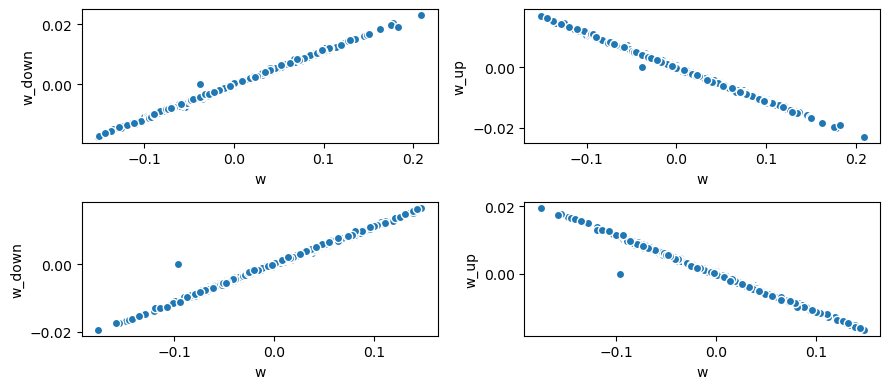

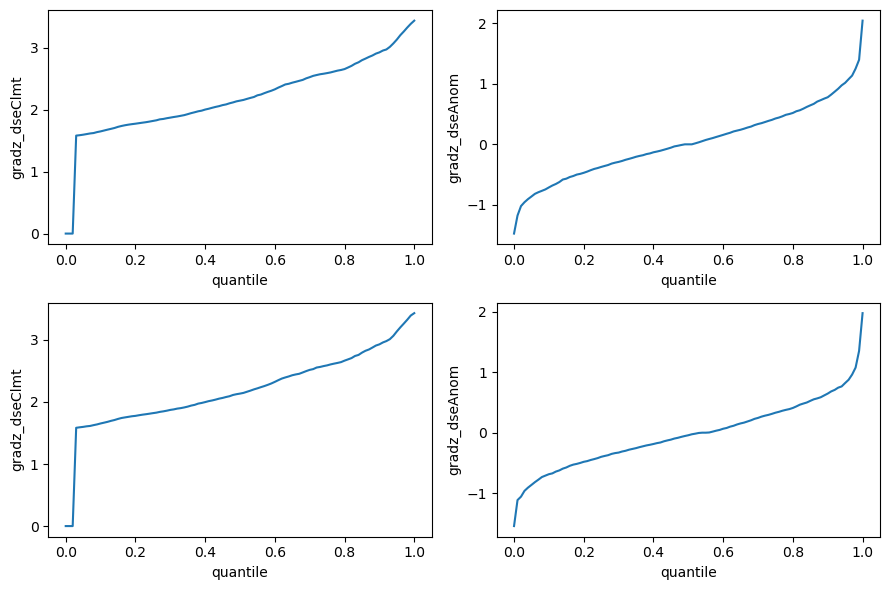

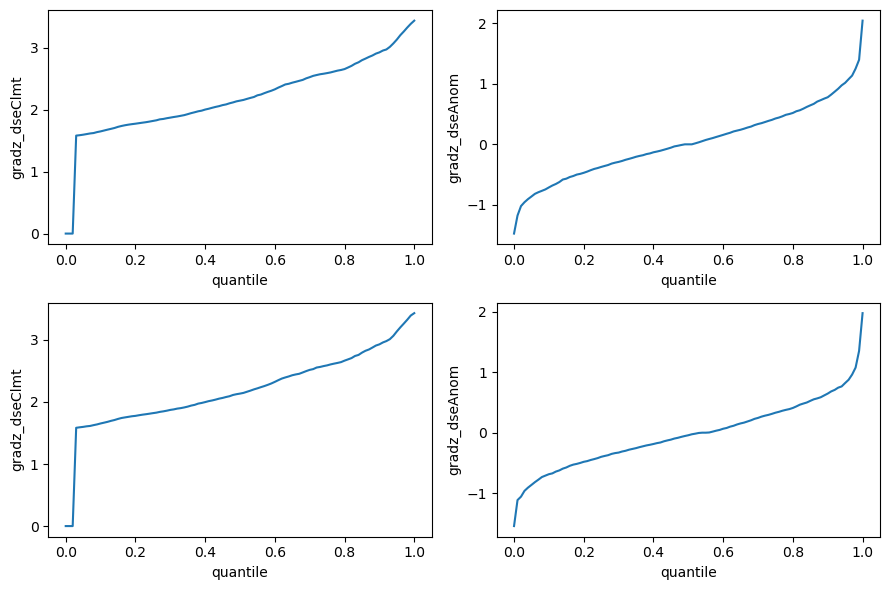

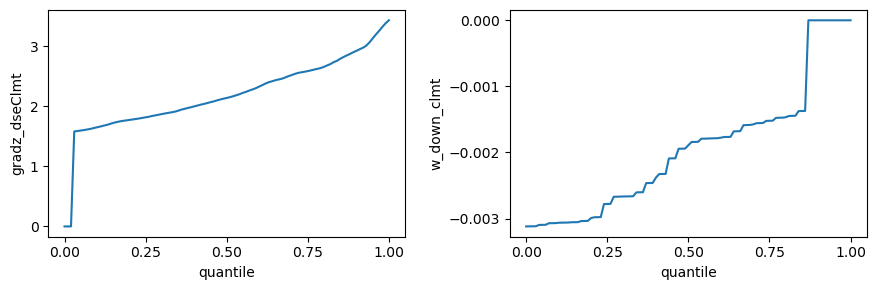

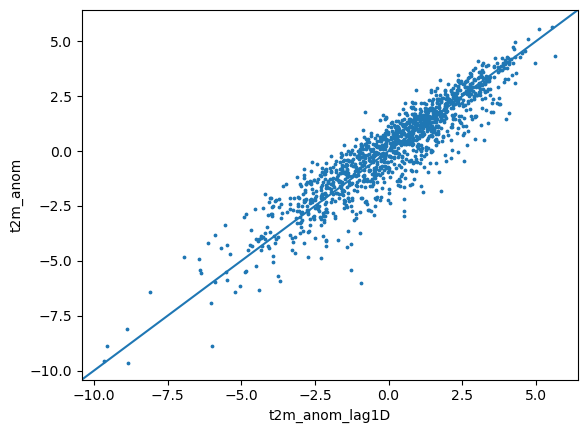

In [110]:
importlib.reload(read_data_DSE_Flux_Trees_1980_2022)
from read_data_DSE_Flux_Trees_1980_2022 import *

In [111]:
df_t1.month.unique()

array([3, 4, 5, 6], dtype=int32)

In [112]:
y_var = 'adv_recon_2Dave'
# y_var = 't2m_anom'
num_classes = 5
df_t2, globals()[f'{y_var}_class_map'] = \
create_classes(df_t1.loc[df_t1.month.isin([4]),:], y_var = y_var, num_classes = num_classes)
labels0 = list(globals()[f'{y_var}_class_map'].values())


[0, 1, 2, 3, 4] [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
adv_recon_2Dave_clss created
adv_recon_2Dave_clss
0    247
1    247
2    246
3    247
4    247
Name: count, dtype: int64
adv_recon_2Dave_class_map created
{0: '(-3877.6,-431.2]', 1: '(-431.2,-85.5]', 2: '(-85.5,169.2]', 3: '(169.2,464.2]', 4: '(464.2,2221.1]'}


In [113]:
[s for s in df_t2 if 'dse' in s]

['coready_dse_del1', 'dse_anom', 'dse_clmt', 'dse_anom_Lag1']

In [114]:
[s for s in df_t2 if 't2m' in s]

['t2m_anom', 't2m_anom_Lag1', 'del_t2m_anom']

In [115]:
# df_intensify['adv_recon_2Dave_clss_Lag1'] = df_intensify['adv_recon_2Dave_clss'].shift(1)

In [116]:
# min_dt_df = df_intensify.groupby([df_intensify.index.year,df_intensify.index.month])['day'].min().to_frame()
# min_dt_df.index.set_names(('year','month'), inplace=True)

# df_intensify = df_intensify\
# .loc[
#     ~df_intensify.index.isin(
#         pd.to_datetime(
#             min_dt_df.reset_index().loc[min_dt_df.reset_index().month==4,['year','month','day']]
#         )
#     )
# ]


In [117]:
# df_intensify = df_intensify.dropna()
# df_intensify['adv_recon_clss_Lag1']

In [118]:
# y_var = 'adv_recon_2Dave'
# # y_var = 't2m_anom'
# num_classes = 5
# df_intensify, globals()[f'{y_var}_class_map'] = \
# create_classes(df_mst.loc[df_mst.month==4,:], y_var = y_var, num_classes = num_classes)
# labels0 = list(globals()[f'{y_var}_class_map'].values())
# 

In [119]:
# df_intensify['adv_recon_clss_Lag1'] = df_intensify['adv_recon_clss'].shift(1)

In [120]:
# min_dt_df = df_intensify.groupby([df_intensify.index.year,df_intensify.index.month])['day'].min().to_frame()
# min_dt_df.index.set_names(('year','month'), inplace=True)

# df_intensify = df_intensify\
# .loc[
#     ~df_intensify.index.isin(
#         pd.to_datetime(
#             min_dt_df.reset_index().loc[min_dt_df.reset_index().month==4,['year','month','day']]
#         )
#     )
# ]


In [121]:
df_t2.shape

(1234, 57)

In [122]:
df_t2.columns

Index(['$u'$$\mathcal{S}'_x$', '$v'$$\mathcal{S}'_y$', '$w'$$\mathcal{S}'_z$',
       '$u'$$\mathcal{S}̅_x$', '$v'$$\mathcal{S}̅_y$', '$w'$$\mathcal{S}̅_z$',
       '${u̅}$$\mathcal{S}'_x$', '${v̅}$$\mathcal{S}'_y$',
       '${w̅}$$\mathcal{S}'_z$', '${u̅}$$\mathcal{S}̅_x$',
       '${v̅}$$\mathcal{S}̅_y$', '${w̅}$$\mathcal{S}̅_z$', 'adv_recon',
       'coready_dse_del1', 'year', 'month', 'day', 't2m_anom', 't2m_anom_Lag1',
       'del_t2m_anom', '$u'$', '${u̅}$', '$v'$', '${v̅}$', 'w_down_anom',
       'w_down_clmt', '$\mathcal{S}'_x$', '$\mathcal{S}̅_x$',
       '$\mathcal{S}'_y$', '$\mathcal{S}̅_y$', '$\mathcal{S}'_z$',
       '$\mathcal{S}̅_z$', 'dse_anom', 'dse_clmt', 'dates_roll_clmt', '$w'$',
       '${w̅}$', 'adv_recon_Lag1', 'dse_anom_Lag1', 'adv_recon_2Dave',
       'Net_Adv', 'T0', 'T_main', 'T2', 'lin_sum', 'NL_sum', 'ed_x_y',
       'ed_y_z', 'ed_x_z', 'adv_recon_2Dave_nonmain', 'adv_recon_2', 'w'',
       'w̅', 'x_contrib_NL', 'y_contrib_NL', 'z_contrib_NL',
       'adv_r

In [123]:
# df_t2.loc[df_t2.index == '2011-4-18', col_set2]
# df_t2.loc[df_t2.index == '1997-4-23', col_set2]
# df_t2.loc[df_t2.index == '1999-4-3', col_set2]
# df_t2.loc[df_t2.index == '2018-4-21', col_set2]


In [124]:
df_t2.t2m_anom.quantile(np.linspace(0,1,11))

0.0   -9.640364
0.1   -2.536209
0.2   -1.491527
0.3   -0.778759
0.4   -0.131036
0.5    0.427499
0.6    0.914366
0.7    1.427558
0.8    1.978125
0.9    2.796809
1.0    5.657810
Name: t2m_anom, dtype: float64

Case 1

In [125]:
df_t2.t2m_anom.quantile(0.5)

0.42749908566474915

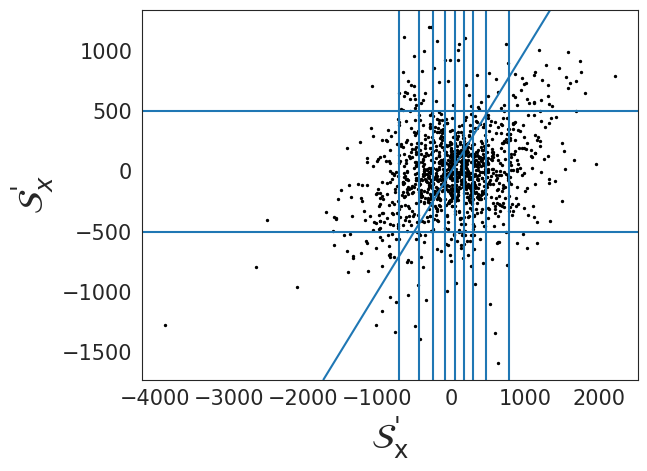

In [126]:
df_t2.plot.scatter(y='NL_sum', x='Net_Adv',s=2,c='k')
plt.axline((0,0), slope=1)
plt.axhline(-500)
plt.axhline(500)
plt.xlabel('$\mathregular{\mathcal{S}}^\'_\mathregular{x}$')
plt.ylabel('$\mathcal{S}^\'_x$')
# plt.ylabel('$\mathrel{+}=2$')

for i in range(1,10):
    plt.axvline(df_t2.Net_Adv.quantile(i/10))

In [127]:
bnds = ((df_t2.Net_Adv.quantile(np.linspace(0,1,10+1))/100).round()*100).values
print(bnds)
[bnds[i] for i in range(len(bnds)) if i in np.arange(6)*(12/6)]

[-3900.  -700.  -400.  -200.  -100.     0.   200.   300.   500.   800.
  2200.]


[-3900.0, -400.0, -100.0, 200.0, 500.0, 2200.0]

In [128]:
def plot_tmain_nlsum(
    df = pd.DataFrame(), cvar = 'Net_Adv', cbar_lab = np.nan, cbar_fntsz=15, 
    figsize=(7,5), ptsize = 4, ncat_col = 5, n_cbarticks = 5
):
    global fig, ax
    fig,ax = plt.subplots(figsize=figsize)
    ax.patch.set_facecolor('white')  # Background color

    # cmap = mpl.colors.ListedColormap(["navy", "crimson", "limegreen", "gold"])
    cmap = plt.get_cmap('coolwarm', ncat_col)

    # want to keep color bands same as unfiltered monthly distribution to relfect the unfiltered tails
#     cbar_bnds = [-3900, -700, -250, 250, 700, 2200]  
    cbar_bnds = ((df_t2.Net_Adv.quantile(np.linspace(0,1,ncat_col+1))/100).round()*100).values
    cbar_ticks = cbar_bnds
#     cbar_ticks = [bnds[i] for i in range(len(bnds)) if i in np.arange(ncat_col/2+1)*2]
#     cbar_ticks = np.convolve(cbar_bnds, [0.5,0.5], "valid")    

    # norm = mpl.colors.BoundaryNorm([-1500, -1000, 0, 1000, 1500], cmap.N) 
    norm = mpl.colors.BoundaryNorm(cbar_bnds, cmap.N) 

    df.plot.scatter(
        x='T_main', y='NL_sum', s=ptsize, c=cvar,  colorbar=False,
        cmap=cmap, norm = norm, ax=ax

    )

    cbar = fig.colorbar(ax.collections[0], label = 'Net_Adv' if cbar_lab != cbar_lab else cbar_lab) # ticks= cbar_ticks, 
    cbar.set_ticks(cbar_ticks)
    cbar.ax.tick_params(labelsize=cbar_fntsz)

    xlow = np.round(df['T_main'].quantile(0)-50,3)
    xhi = np.round(df['T_main'].quantile(1)+50,3)

    xmin = xlow if np.abs(xlow) > xhi else -1*xhi
    xmax = -1*xmin
    
    ax.set_xlim(xmin,xmax)
    xlabs = (np.round(list(np.linspace(int(xmin), int(xmax)+1, 5)/100))*100).astype('int')
    print(len(xlabs))
    ax.set_xticks(ticks = xlabs, labels = xlabs, rotation=90, fontname =fontname)


    ylow = np.round(df['NL_sum'].quantile(0)-50,3)
    yhi = np.round(df['NL_sum'].quantile(1)+50,3)

    ymin = ylow if np.abs(ylow) > yhi else -1*yhi
    ymax = -1*ymin
    
    ax.set_ylim(ymin,ymax)
    ylabs = (np.round(list(np.linspace(int(ymin), int(ymax)+1, 5)/100))*100).astype('int')
    print(len(ylabs))
    ax.set_yticks(ticks = ylabs, labels = ylabs, rotation=0, fontname =fontname)
    
    border_thickness=2
    ax.spines["top"].set_linewidth(border_thickness)
    ax.spines["right"].set_linewidth(border_thickness)
    ax.spines["bottom"].set_linewidth(border_thickness)
    ax.spines["left"].set_linewidth(border_thickness)
    # Optional: Customize border color
    for spine in ax.spines.values():
        spine.set_color("black")


## PosBG mst Phase Plot

In [129]:
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern font
fontname = 'DeJaVu Serif'
params = {
    'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':25, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':25, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': fontname,
}

plt.rcParams.update(params)


5
5


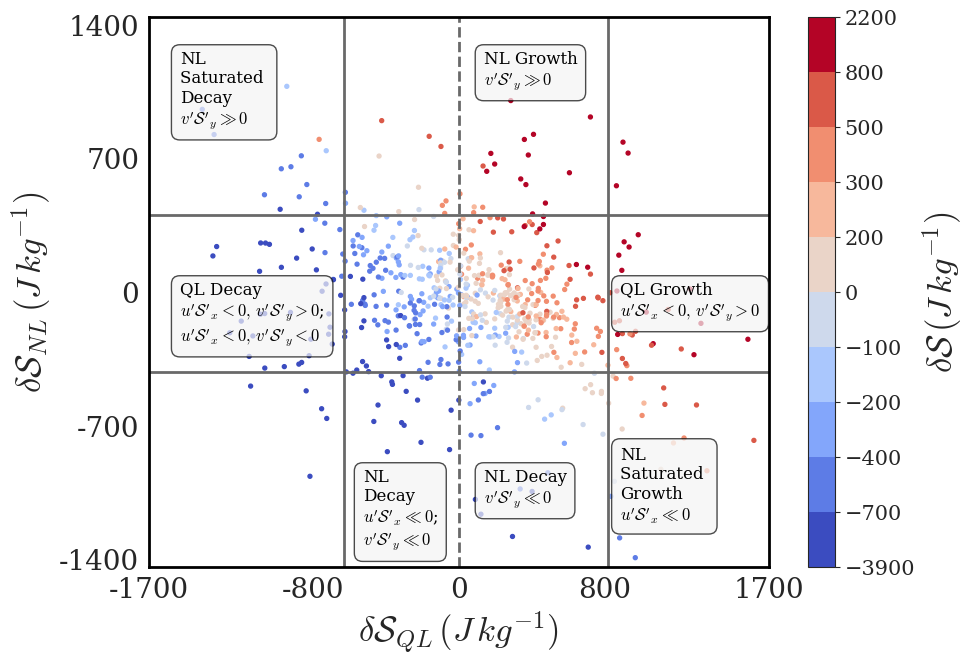

In [316]:

plot_tmain_nlsum(
    df_t2.loc[df_t2.dse_anom_Lag1>0], cbar_lab = '$\delta \mathcal{S}\, (J\,kg^{-1})$',
    figsize=(10,5*10/7), 
    ptsize=8, 
    ncat_col = 10,
    cbar_fntsz=15
)

# plot_tmain_nlsum(df_t2.loc[df_t2.dse_anom_Lag1<0])

# We want the quantile demarcations to be based on complete april distribution
ax.axhline(df_t2.NL_sum.quantile(0.9), lw=2, ls='-',c='dimgray')
ax.axhline(df_t2.NL_sum.quantile(0.1), lw=2, ls='-',c='dimgray')
ax.axvline(df_t2.T_main.quantile(0.9), lw=2, ls='-',c='dimgray')
ax.axvline(df_t2.T_main.quantile(0.1), lw=2, ls='-',c='dimgray')
# ax.axhline(0, lw=1, c='dimgray', ls='--')
ax.axvline(0, lw=2, c='dimgray', ls='--')

ax.set_xlabel('$\delta\mathcal{S}_{QL}\, (J\,kg^{-1})$')
ax.set_ylabel('$\delta\mathcal{S}_{NL}\, (J\,kg^{-1})$')

# ax.arrow(-800, -700, 1500, 0.9*1300, head_width=120, width = 20, fc='dimgray', ec = 'dimgray')
props = dict(boxstyle='round,pad=0.5', facecolor='whitesmoke', alpha=0.7, edgecolor='black')

annot_size = 12
# ax.text(0.03, 0.94, 'NL Saturated \nDecay\n' + '($u\' \mathcal{S}\'_{x}$)', transform=ax.transAxes, 
#         fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.05, 0.52, 'QL Decay\n$u\'\mathcal{S}\'_{x}<0,\,v\'\mathcal{S}\'_{y}>0$;\n$u\'\mathcal{S}\'_{x}<0,\,v\'\mathcal{S}\'_{y}<0$', 
        transform=ax.transAxes, fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.76, 0.52, 'QL Growth\n$u\'\mathcal{S}\'_{x}<0,\,v\'\mathcal{S}\'_{y}>0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.54, 0.94, 'NL Growth\n$v\' \mathcal{S}\'_{y}\gg0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.76, 0.22, 'NL\nSaturated \nGrowth\n$u\'\mathcal{S}\'_{x}\ll0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.54, 0.18, 'NL Decay\n$v\'\mathcal{S}\'_{y}\ll0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.345, 0.18, 'NL\nDecay\n$u\'\mathcal{S}\'_{x}\ll0$;\n$v\'\mathcal{S}\'_{y}\ll0$', 
        transform=ax.transAxes, fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.05, 0.94, 'NL\nSaturated \nDecay\n$v\'\mathcal{S}\'_{y}\gg0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

pdf_path = '/home/data/lab_hardik/Manuscript1/Fig_Apr_regimes_phase_plot.pdf'
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF


5
5
5
5


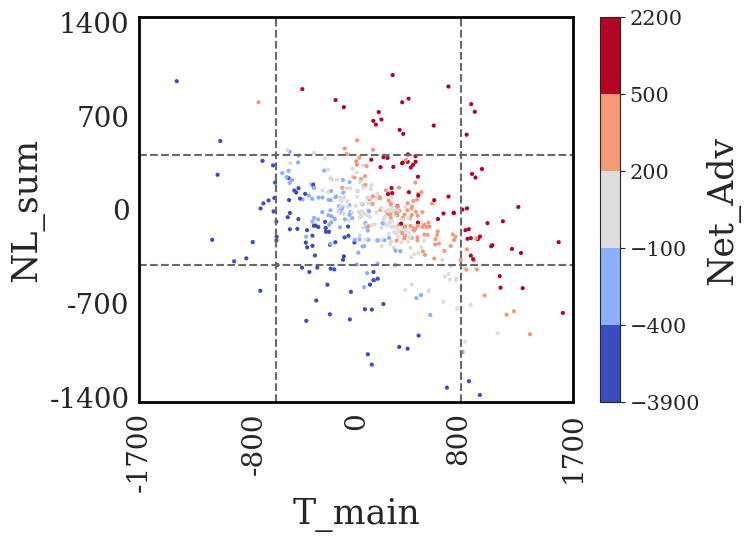

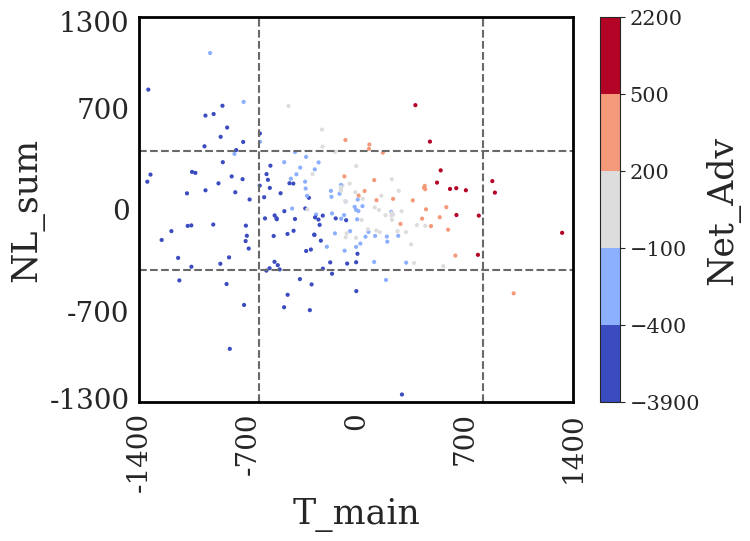

In [131]:
plot_tmain_nlsum(df_t2.loc[(df_t2.dse_anom_Lag1>0) & (df_t2[dy_s_anom]>0)])
plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plot_tmain_nlsum(df_t2.loc[(df_t2.dse_anom_Lag1>0) & (df_t2[dy_s_anom]<0)])
plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')


In [132]:
# plot_tmain_nlsum(df_t2.loc[(df_t2.dse_anom_Lag1<0) & (df_t2[dy_s_anom]<0)])
# plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
# plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

# plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
# plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

# plot_tmain_nlsum(df_t2.loc[(df_t2.dse_anom_Lag1<0) & (df_t2[dy_s_anom]>0)])
# plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
# plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

# plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
# plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')


In [133]:
cmap = pyplot.get_cmap('coolwarm', 4)

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))


#3b4cc0
#aac7fd
#f7b89c
#b40426


In [134]:
df_t2['dse_anom_dec'] = pd.qcut(df_t2.dse_anom.abs(), np.linspace(0,1,11), labels = range(10)).astype('int')


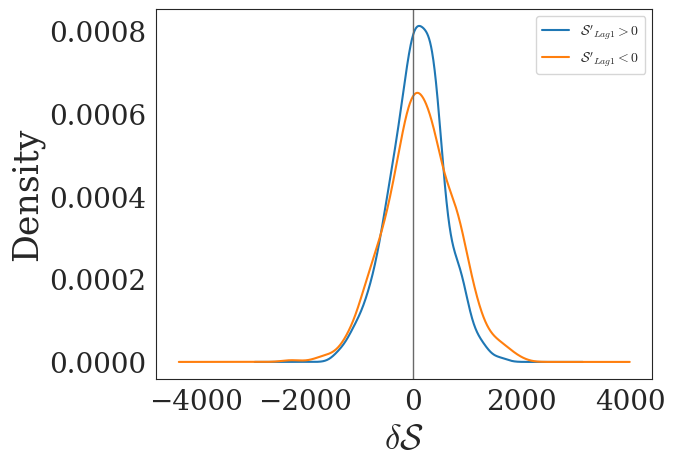

In [135]:
df_t2.loc[df_t2.dse_anom_Lag1>0][T_main].plot.kde()
df_t2.loc[df_t2.dse_anom_Lag1<0][T_main].plot.kde()
plt.axvline(0, c='dimgray', lw=1)
plt.xlabel('$\delta{\mathcal{S}}$')
plt.legend(['$\mathcal{S}\'_{Lag1}>0$', '$\mathcal{S}\'_{Lag1}<0$'], loc='upper right', title='')

pdf_path = '/home/data/lab_hardik/Manuscript1/Suppli_Fig_Apr_flxs_per_bg.pdf'
# plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF


0.7816155823270503


Text(0.5, 0, 'NL_sum_xy')

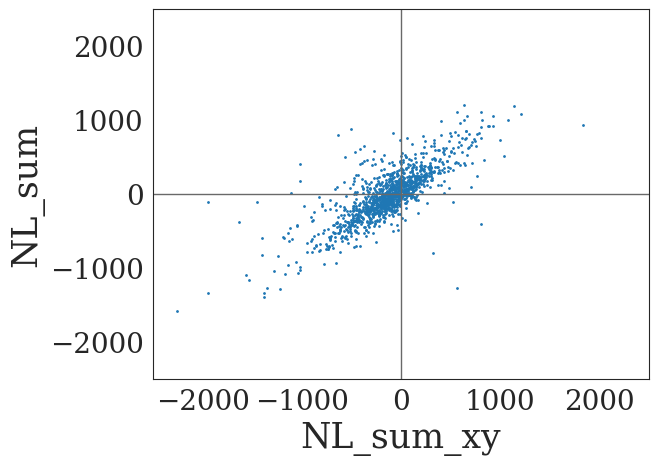

In [136]:
# x = nl_us
x = 'ed_x_y'
print(df_t2['NL_sum'].corr(df_t2[x]))

df_t2.plot.scatter(y='NL_sum', x= x, # 'T_main', 
                   s=1, 
#                    c='T_main', 
#                    vmin=-1200, vmax=1200, 
#                    cmap='coolwarm'
                  )
plt.xlim(-2500,2500)
plt.ylim(-2500,2500)

# plt.axhline(500)
# plt.axhline(-500)
plt.axhline(0, c='dimgray', lw=1)

plt.axvline(0, c='dimgray', lw=1)
# plt.axvline(570)
# plt.axvline(-475)

plt.ylabel('NL_sum')
plt.xlabel('NL_sum_xy')


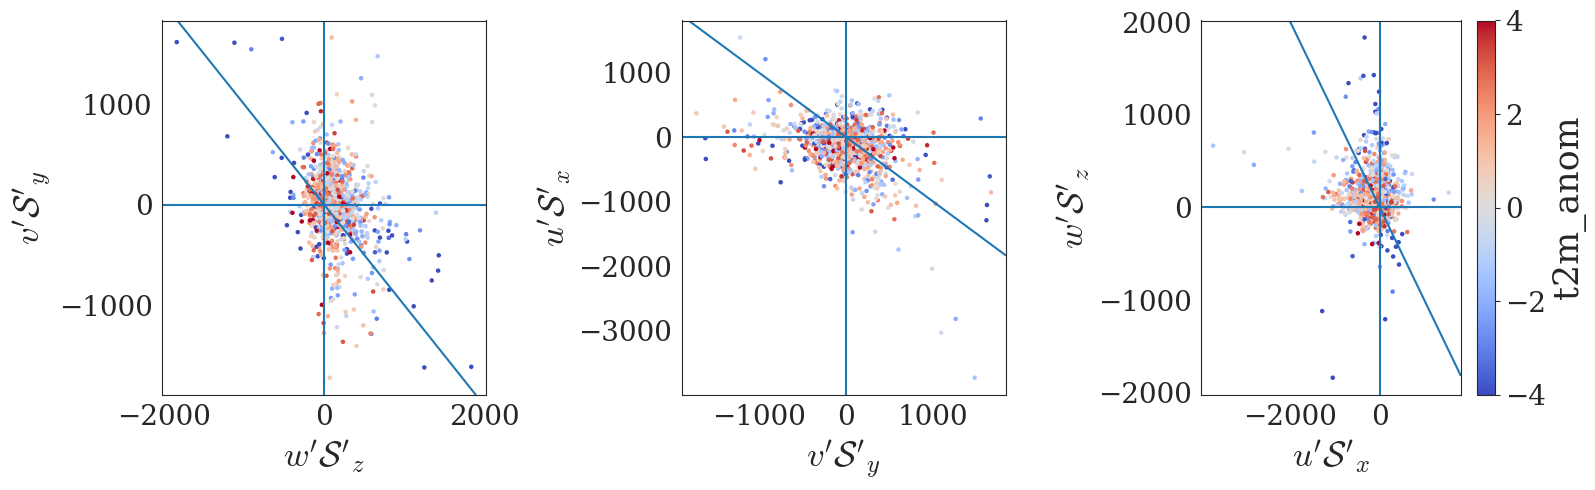

In [137]:
# df_t2.loc[df_t2.adv_recon >= df_t2.adv_recon.quantile(0.9), col_arr].plot.scatter(x=y_main, y = nl_vs)
fig,ax = plt.subplots(1,3,figsize=(16,5), squeeze=False)

# cvar = 'T_main'
cvar = 't2m_anom'

low_qty = np.round(df_t2[cvar].quantile(0.05))
hi_qty = np.round(df_t2[cvar].quantile(0.95))

vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin

df_t2.plot.scatter(x=nl_ws, y = nl_vs, c=cvar,cmap='coolwarm', s=5, ax=ax[0,0], colorbar=False, vmin=vmin,vmax=vmax)
df_t2.plot.scatter(x=nl_vs, y = nl_us, c=cvar,cmap='coolwarm',s=5, ax=ax[0,1], colorbar=False, vmin=vmin,vmax=vmax)
df_t2.plot.scatter(x=nl_us, y = nl_ws, c=cvar,cmap='coolwarm',s=5, ax=ax[0,2], vmin=vmin,vmax=vmax)

for j in range(3):
    ax[0,j].axhline(0)
    ax[0,j].axvline(0)
    ax[0,j].axline((0,0), slope=-1)

plt.tight_layout()

<Axes: xlabel='Net_Adv', ylabel='T_main'>

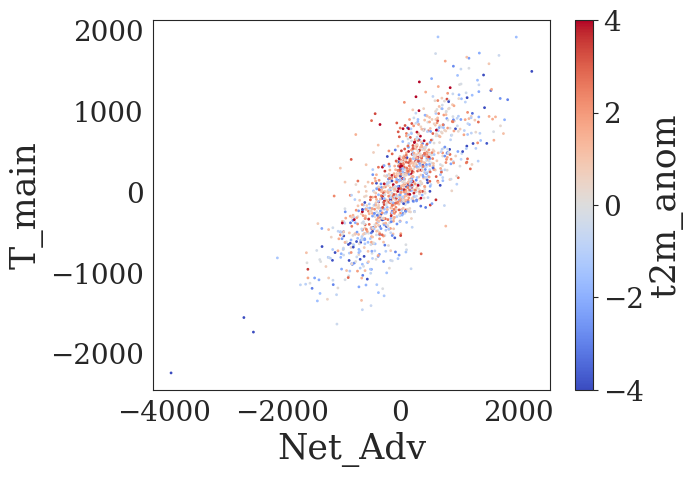

In [138]:
df_t2.plot.scatter(x='Net_Adv',y=T_main,c='t2m_anom', colormap='coolwarm', vmin=-4,vmax=4, s=1)

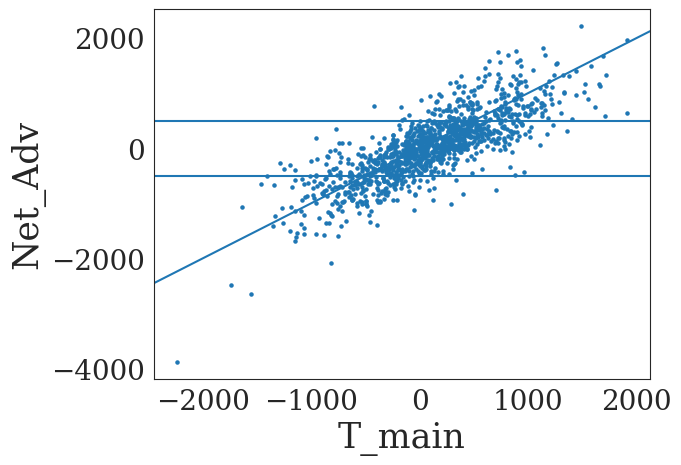

In [139]:
df_t2.plot.scatter(x='T_main', y='Net_Adv',s=5)
plt.axline((0,0), slope=1)
plt.axhline(-500)
plt.axhline(500)


In [140]:
params = {
#     'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':15,
         'ytick.labelsize':15, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
}
plt.rcParams.update(params)

In [141]:
df_t2.columns

Index(['$u'$$\mathcal{S}'_x$', '$v'$$\mathcal{S}'_y$', '$w'$$\mathcal{S}'_z$',
       '$u'$$\mathcal{S}̅_x$', '$v'$$\mathcal{S}̅_y$', '$w'$$\mathcal{S}̅_z$',
       '${u̅}$$\mathcal{S}'_x$', '${v̅}$$\mathcal{S}'_y$',
       '${w̅}$$\mathcal{S}'_z$', '${u̅}$$\mathcal{S}̅_x$',
       '${v̅}$$\mathcal{S}̅_y$', '${w̅}$$\mathcal{S}̅_z$', 'adv_recon',
       'coready_dse_del1', 'year', 'month', 'day', 't2m_anom', 't2m_anom_Lag1',
       'del_t2m_anom', '$u'$', '${u̅}$', '$v'$', '${v̅}$', 'w_down_anom',
       'w_down_clmt', '$\mathcal{S}'_x$', '$\mathcal{S}̅_x$',
       '$\mathcal{S}'_y$', '$\mathcal{S}̅_y$', '$\mathcal{S}'_z$',
       '$\mathcal{S}̅_z$', 'dse_anom', 'dse_clmt', 'dates_roll_clmt', '$w'$',
       '${w̅}$', 'adv_recon_Lag1', 'dse_anom_Lag1', 'adv_recon_2Dave',
       'Net_Adv', 'T0', 'T_main', 'T2', 'lin_sum', 'NL_sum', 'ed_x_y',
       'ed_y_z', 'ed_x_z', 'adv_recon_2Dave_nonmain', 'adv_recon_2', 'w'',
       'w̅', 'x_contrib_NL', 'y_contrib_NL', 'z_contrib_NL',
       'adv_r

/tmp/ipykernel_209525/248747886.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
/tmp/ipykernel_209525/248747886.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


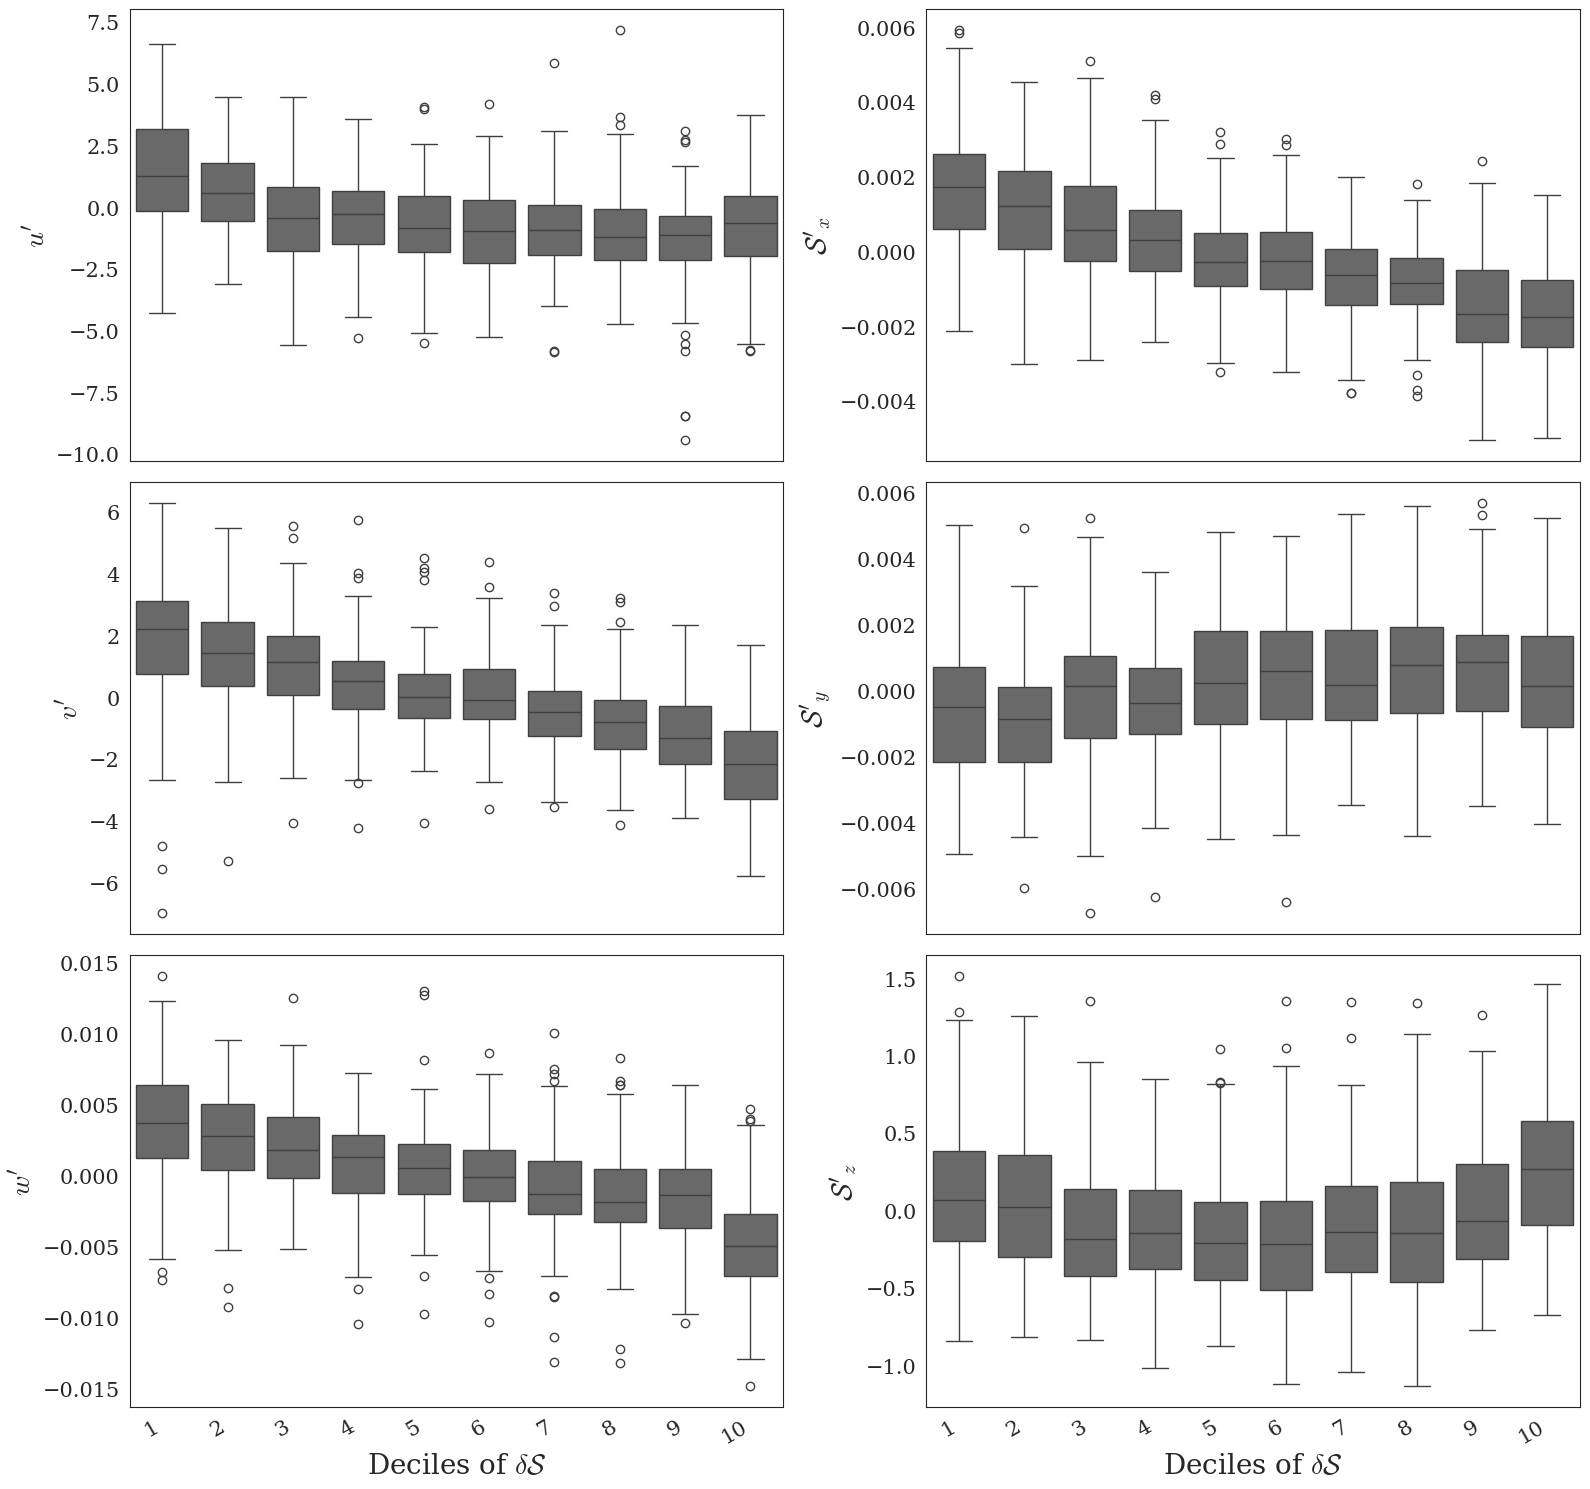

In [142]:
fig, ax = plt.subplots(3,2,figsize=(16,5*3))

# var = 'NL_sum'
var_lst = [uanom, dx_s_anom, vanom, dy_s_anom, wanom, dz_s_anom]
y = 'Net_Adv'
# y = 'T_main'

df_box = df_t2[var_lst + [y]]

df_box2 = df_box.assign(
**{
    '{}_classed'.format(y): pd.qcut(df_box[y], q=10)
    }
)

df_box2['{}_classed'.format(y)] =\
df_box2['{}_classed'.format(y)].apply(lambda x: pd.Interval(left=round(x.left, 2), right=round(x.right,2)))

for k in range(len(var_lst)):
    rnum = bicol_panel_rownum(k)
    cnum = bicol_panel_colnum(k)
    
    globals()[f'g{k}'] = sn.boxplot(
        y = df_box2[var_lst[k]], 
        x = df_box2['{}_classed'.format(y)], 
        ax = ax[rnum,cnum],
        color='dimgray',
        )
    globals()[f'g{k}'].set_xlabel('')
    globals()[f'g{k}'].set_xticklabels('', rotation=30, horizontalalignment='right')


# plt.axhline(500, lw=1.5,ls='--',c='dimgray')
# plt.axhline(-500, lw=1.5,ls='--',c='dimgray')

g4.set_xlabel('Deciles of {}'.format('$\delta\mathcal{S}$'))
g5.set_xlabel('Deciles of {}'.format('$\delta\mathcal{S}$'))

# labels = [g.get_xticklabels()[i].get_text() for i in range(len(g.get_xticklabels()))]
# g.set_xticklabels(labels, rotation=30, horizontalalignment='right')

labels = range(1, 11)
g4.set_xticklabels(labels, rotation=30, horizontalalignment='right') # , ax=ax[2,1]
g5.set_xticklabels(labels, rotation=30, horizontalalignment='right') # , ax=ax[2,1]
plt.tight_layout()
pdf_path = '/home/data/lab_hardik/Manuscript1/Suppli_Fig_Apr_NL_drivers.pdf'
# plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF


In [143]:
# df_t2.loc[df_t2['T_main'].between(800,1000) & (df_t2.T3.abs() < 200)].index.to_series()\
# .to_csv(dir_files_out + 'Dates_Apr_largePosTprim_smallNonLin.csv')

In [144]:
df_t3 = df_t2.copy()
# .rename({'Net_Adv':'DSE_accum', 'NL_sum':'NL_sum'}, axis=1)


In [145]:
df_t2.columns

Index(['$u'$$\mathcal{S}'_x$', '$v'$$\mathcal{S}'_y$', '$w'$$\mathcal{S}'_z$',
       '$u'$$\mathcal{S}̅_x$', '$v'$$\mathcal{S}̅_y$', '$w'$$\mathcal{S}̅_z$',
       '${u̅}$$\mathcal{S}'_x$', '${v̅}$$\mathcal{S}'_y$',
       '${w̅}$$\mathcal{S}'_z$', '${u̅}$$\mathcal{S}̅_x$',
       '${v̅}$$\mathcal{S}̅_y$', '${w̅}$$\mathcal{S}̅_z$', 'adv_recon',
       'coready_dse_del1', 'year', 'month', 'day', 't2m_anom', 't2m_anom_Lag1',
       'del_t2m_anom', '$u'$', '${u̅}$', '$v'$', '${v̅}$', 'w_down_anom',
       'w_down_clmt', '$\mathcal{S}'_x$', '$\mathcal{S}̅_x$',
       '$\mathcal{S}'_y$', '$\mathcal{S}̅_y$', '$\mathcal{S}'_z$',
       '$\mathcal{S}̅_z$', 'dse_anom', 'dse_clmt', 'dates_roll_clmt', '$w'$',
       '${w̅}$', 'adv_recon_Lag1', 'dse_anom_Lag1', 'adv_recon_2Dave',
       'Net_Adv', 'T0', 'T_main', 'T2', 'lin_sum', 'NL_sum', 'ed_x_y',
       'ed_y_z', 'ed_x_z', 'adv_recon_2Dave_nonmain', 'adv_recon_2', 'w'',
       'w̅', 'x_contrib_NL', 'y_contrib_NL', 'z_contrib_NL',
       'adv_r

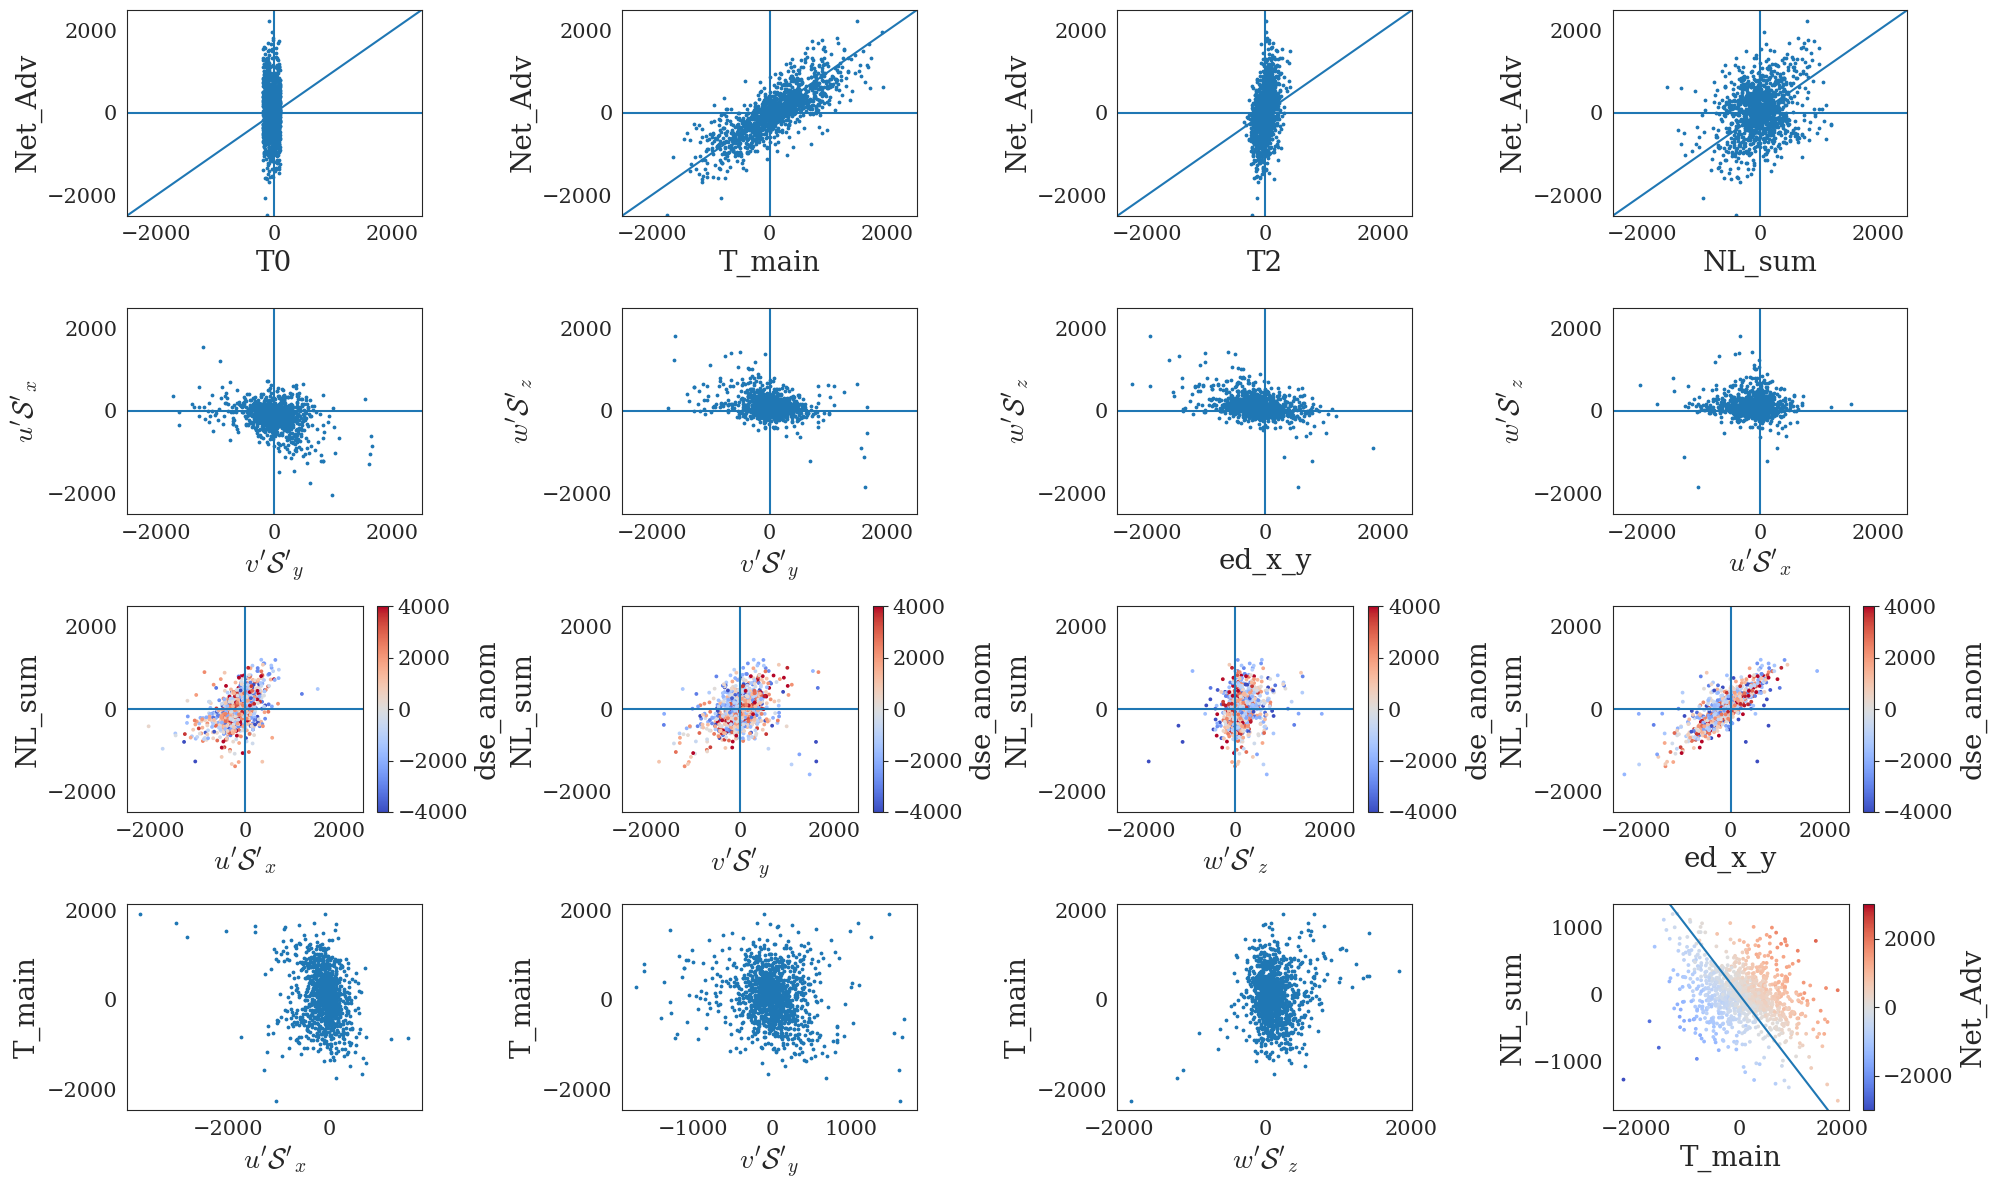

In [146]:
fig,ax = plt.subplots(4,4,figsize=(20,12))

df_t3.plot.scatter(x='T0', y='Net_Adv', s=3,ax=ax[0,0])
df_t3.plot.scatter(x='T_main', y='Net_Adv', s=3,ax=ax[0,1])
df_t3.plot.scatter(x='T2', y='Net_Adv', s=3,ax=ax[0,2])
df_t3.plot.scatter(x='NL_sum', y='Net_Adv', s=3,ax=ax[0,3])

df_t3.plot.scatter(x=nl_vs, y=nl_us, s=3,ax=ax[1,0])
df_t3.plot.scatter(x=nl_vs, y=nl_ws, s=3,ax=ax[1,1])
df_t3.plot.scatter(x='ed_x_y', y=nl_ws, s=3,ax=ax[1,2])
df_t3.plot.scatter(x=nl_us, y=nl_ws, s=3,ax=ax[1,3])

df_t3.plot.scatter(x=nl_us, y='NL_sum', s=3,ax=ax[2,0], c='dse_anom', cmap='coolwarm', vmin=-4000, vmax=4000)
df_t3.plot.scatter(x=nl_vs, y='NL_sum', s=3,ax=ax[2,1], c='dse_anom', cmap='coolwarm', vmin=-4000, vmax=4000)
df_t3.plot.scatter(x=nl_ws, y='NL_sum', s=3,ax=ax[2,2], c='dse_anom', cmap='coolwarm', vmin=-4000, vmax=4000)
df_t3.plot.scatter(x='ed_x_y', y='NL_sum', s=3,ax=ax[2,3], c='dse_anom', cmap='coolwarm', vmin=-4000, vmax=4000)

df_t3.plot.scatter(x=nl_us, y='T_main', s=3,ax=ax[3,0])
df_t3.plot.scatter(x=nl_vs, y='T_main', s=3,ax=ax[3,1])
df_t3.plot.scatter(x=nl_ws, y='T_main', s=3,ax=ax[3,2])
df_t3.plot.scatter(y='NL_sum', x='T_main',c='Net_Adv', cmap='coolwarm',vmin=-3000, vmax=3000, s=3,ax=ax[3,3])
ax[3,3].axline((0,0),slope=-1)

for j in range(4):
    for i in range(3):
        ax[i,j].axhline(0)
        ax[i,j].axvline(0)
        ax[i,j].set_xlim(-2500,2500)
        ax[i,j].set_ylim(-2500,2500)
        if i==0:
            ax[i,j].axline((0,0),slope=1)

    
plt.tight_layout()


In [147]:
y_main = name_dict_final['v\'_' + u's\u0305']
x_main = name_dict_final[u'u\u0305' + '_s\'']
z_main = name_dict_final['w\'_' + u's\u0305']


In [148]:
params = {
#     'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':15,
         'ytick.labelsize':15, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': 'Liberation Serif',
}

plt.rcParams.update(params)



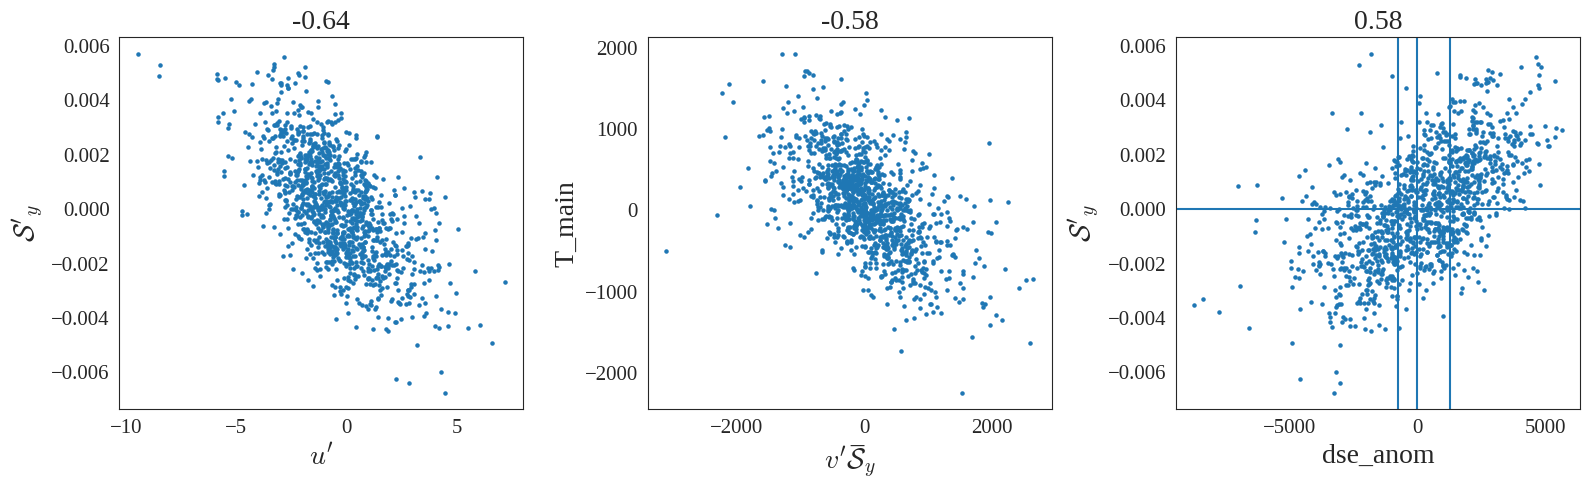

In [149]:
fig,ax = plt.subplots(1,3,figsize=(16,5))
df_t2.plot.scatter(x=uanom, y=dy_s_anom, s=5, ax=ax[0])
ax[0].set_title(df_t2[uanom].corr(df_t2[dy_s_anom]).round(2))

df_t2.plot.scatter(x=y_main, y=T_main, s=5, ax=ax[1])
ax[1].set_title(df_t2[y_main].corr(df_t2[T_main]).round(2))

df_t2.plot.scatter(x='dse_anom', y=dy_s_anom, s=5, ax=ax[2])
ax[2].set_title(df_t2.dse_anom.corr(df_t2[dy_s_anom]).round(2))

plt.axvline(df_t2.dse_anom.quantile(0.34))
plt.axvline(df_t2.dse_anom.quantile(0.67))
plt.axhline(0)
plt.axvline(0)

# print()
# loc[(df_t2.t2m_anom < 0) & (df_t2[dy_s_anom] < 0)]
plt.tight_layout()

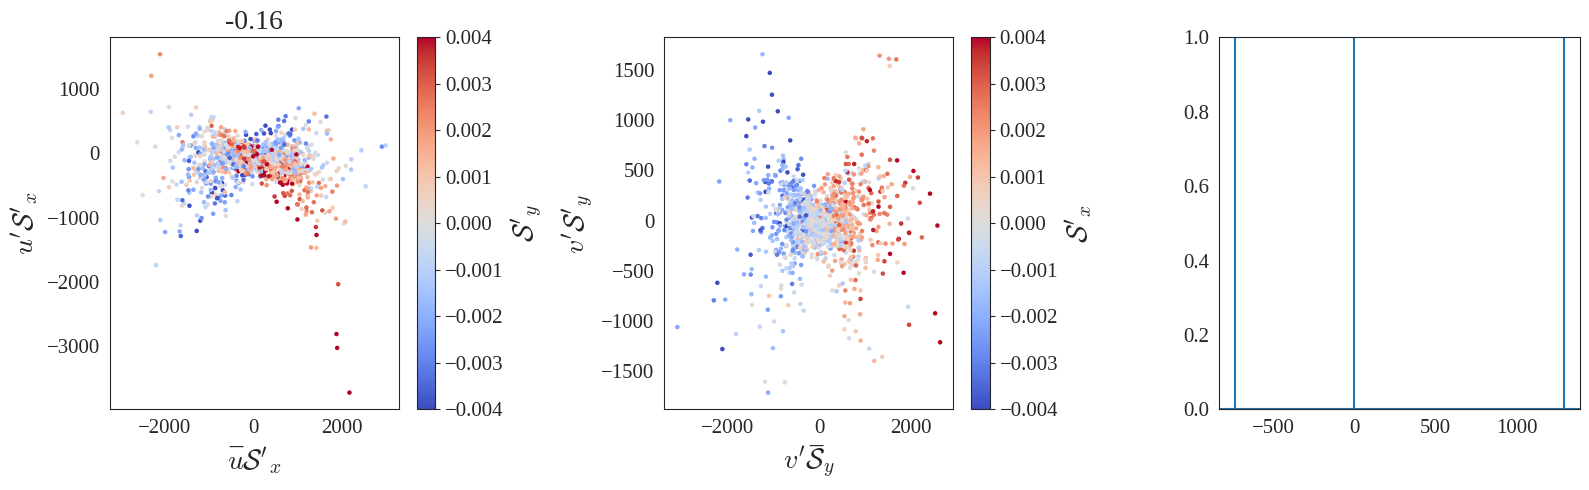

In [150]:
fig,ax = plt.subplots(1,3,figsize=(16,5))
y1 = name_dict_final['u\'_s\'']; x1 = x_main

df_t2.plot.scatter(x=x1, y= y1, s=5, ax=ax[0], c=dy_s_anom, vmin=-0.004, vmax=0.004, cmap='coolwarm')
ax[0].set_title(df_t2[x1].corr(df_t2[y1]).round(2))


y2 = name_dict_final['v\'_s\'']; x2 = y_main
df_t2.plot.scatter(x=x2, y=y2, s=5, ax=ax[1], c=dx_s_anom,  vmin=-0.004, vmax=0.004, cmap='coolwarm')
# ax[1].set_title(df_t2[x2].corr(df_t2[y2]).round(2))

# x3 = 
# df_t2.plot.scatter(x='dse_anom', y=dy_s_anom, s=5, ax=ax[2])
# ax[2].set_title(df_t2.dse_anom.corr(df_t2[dy_s_anom]).round(2))

plt.axvline(df_t2.dse_anom.quantile(0.34))
plt.axvline(df_t2.dse_anom.quantile(0.67))
plt.axhline(0)
plt.axvline(0)

# print()
# loc[(df_t2.t2m_anom < 0) & (df_t2[dy_s_anom] < 0)]
plt.tight_layout()

## Relationships

In [151]:
params = {
#     'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
}
plt.rcParams.update(params)


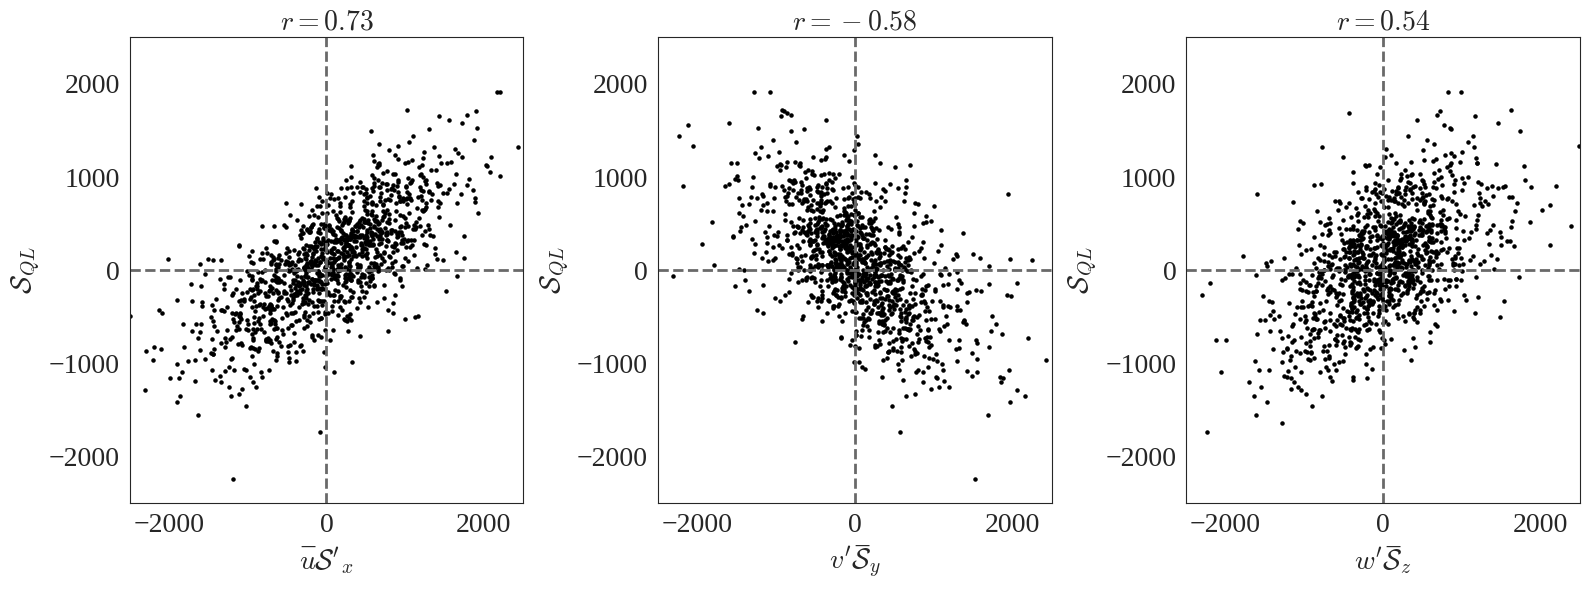

In [152]:
fig,ax = plt.subplots(1,3,figsize=(16,6))
df_t2.plot.scatter(x=x_main, y=T_main, s=5, ax=ax[0], c = 'k')
ax[0].set_title('$r = {}$'.format(df_t2[x_main].corr(df_t2[T_main]).round(2)))

df_t2.plot.scatter(x=y_main, y=T_main, s=5, ax=ax[1], c = 'k')
ax[1].set_title('$r = {}$'.format(df_t2[y_main].corr(df_t2[T_main]).round(2)))

df_t2.plot.scatter(x=z_main, y=T_main, s=5, ax=ax[2], c = 'k')
ax[2].set_title('$r = {}$'.format(df_t2[z_main].corr(df_t2[T_main]).round(2)))

# plt.axvline(df_t2.dse_anom.quantile(0.34))
# plt.axvline(df_t2.dse_anom.quantile(0.67))
for i in range(3):
    ax[i].axhline(0, ls='--', lw=2, c='dimgray')
    ax[i].axvline(0, ls='--', lw=2, c='dimgray')
    ax[i].set_ylabel('$\mathcal{S}_{QL}$')
    ax[i].set_ylim(-2500,2500)
    ax[i].set_xlim(-2500,2500)
    

# print()
# loc[(df_t2.t2m_anom < 0) & (df_t2[dy_s_anom] < 0)]
plt.tight_layout()

pdf_path = '/home/data/lab_hardik/Manuscript1/Suppli_Fig_Apr_SQL_cor_comps.pdf'
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF


## Clearly as below, +ve and -ve dy(s') for dse'>0 distinguishes the location of the disturbance and associated QL-NL relationships

In [153]:
dat_dir = '/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/'


In [154]:
tot_pos = df_t2.loc[(df_t2.dse_anom > 0)].shape[0]
pos_dse_pos_dys = df_t2.loc[(df_t2.dse_anom > 0) & (df_t2[dy_s_anom] > 0)].shape[0]

print(pos_dse_pos_dys/tot_pos)
print((tot_pos-pos_dse_pos_dys)/tot_pos)

tot_neg = df_t2.loc[(df_t2.dse_anom < 0)].shape[0]
neg_dse_neg_dys = df_t2.loc[(df_t2.dse_anom < 0) & (df_t2[dy_s_anom] < 0)].shape[0]

print(neg_dse_neg_dys/tot_neg)
print((tot_neg - neg_dse_neg_dys)/tot_neg)


0.7121879588839941
0.2878120411160059
0.7088607594936709
0.2911392405063291


In [155]:
plt.rcParams['patch.edgecolor'] = 'black' 
# Example for edgecolor 
plt.rcParams['patch.facecolor'] = 'white' 
# Example for facecolor


In [156]:
[s for s in df_t2.columns if 'dse' in s]

['coready_dse_del1', 'dse_anom', 'dse_clmt', 'dse_anom_Lag1', 'dse_anom_dec']

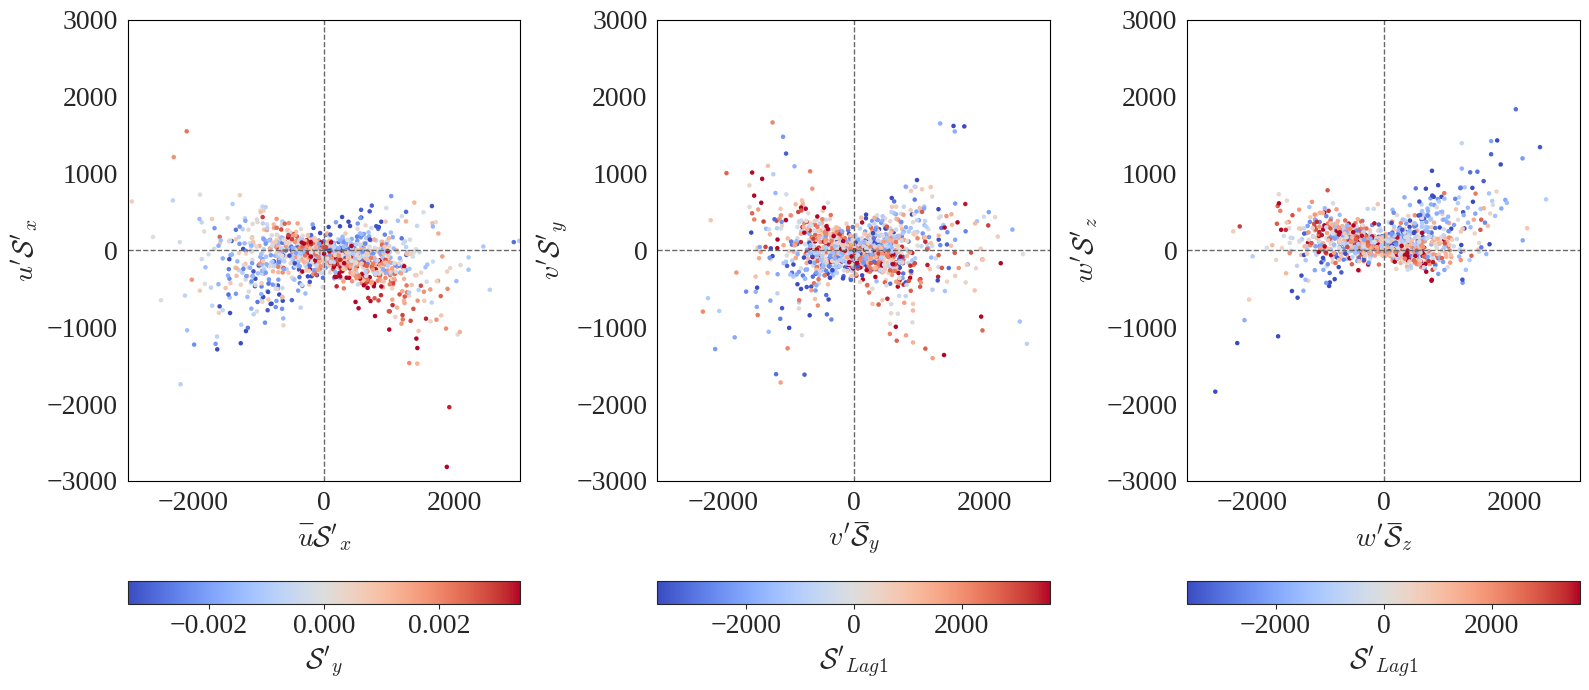

In [157]:
# df_t2.loc[df_t2.adv_recon >= df_t2.adv_recon.quantile(0.9), col_arr].plot.scatter(x=y_main, y = nl_vs)
fig,ax = plt.subplots(1,3,figsize=(16,7), squeeze=False)

# cvar = 'NL_sum'
# cvar = 'adv_recon'
# 
cvar1 = '$\mathregular{T_{QL}}$'
cvar2 = '$\\mathcal{S}\'_{Lag1}$'
df_plt = df_t1.loc[df_t1.month.isin([4])].copy()
df_plt.rename({'T_main':cvar1,'dse_anom_Lag1': cvar2}, axis=1, inplace=True)

cvar = cvar2

low_qty = np.round(df_plt[cvar].quantile(0.05))
hi_qty = np.round(df_plt[cvar].quantile(0.95))

vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin

df_plt.plot.scatter(x=y_main, y = nl_vs, c=cvar, cmap='coolwarm', s=5, ax=ax[0,1], colorbar=False, vmin=vmin, vmax=vmax)
# Create a divider for the existing axes instance 
divider = make_axes_locatable(ax[0,1])
# Append axes to the bottom of ax, with 5% height of ax 
cax = divider.append_axes("bottom", size="5%", pad=1) 
# Add colorbar and set it to the bottom 
cbar = fig.colorbar(ax[0,1].collections[0], cax=cax, orientation='horizontal') 
cbar.set_label(cvar)

df_plt.plot.scatter(x=z_main, y = nl_ws, c=cvar, cmap='coolwarm', s=5, ax=ax[0,2], colorbar=False, vmin=vmin, vmax=vmax)
# Create a divider for the existing axes instance 
divider2 = make_axes_locatable(ax[0,2])
# Append axes to the bottom of ax, with 5% height of ax 
cax2 = divider2.append_axes("bottom", size="5%", pad=1) 
# Add colorbar and set it to the bottom 
cbar2 = fig.colorbar(ax[0,2].collections[0], cax=cax2, orientation='horizontal') 
cbar2.set_label(cvar)

cvar = dy_s_anom
low_qty = df_plt[cvar].quantile(0.05)
hi_qty = df_plt[cvar].quantile(0.95)

vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin
df_plt.plot.scatter(x=x_main, y = nl_us, c=cvar, cmap='coolwarm', s=5, ax=ax[0,0], colorbar=False, vmin=vmin, vmax=vmax)
# Create a divider for the existing axes instance 
divider3 = make_axes_locatable(ax[0,0])
# Append axes to the bottom of ax, with 5% height of ax 
cax3 = divider3.append_axes("bottom", size="5%", pad=1) 
# Add colorbar and set it to the bottom 
cbar3 = fig.colorbar(ax[0,0].collections[0], cax=cax3, orientation='horizontal') 
cbar3.set_label(cvar)

for j in range(3):
    ax[0,j].axhline(0, ls='--', lw=1, c='dimgrey')
    ax[0,j].axvline(0, ls='--', lw=1, c='dimgrey')
    ax[0,j].set_facecolor("white")
    
    ax[0,j].set_xlim(-3000,3000)
    ax[0,j].set_ylim(-3000,3000)

    for spine in ax[0,j].spines.values():
        spine.set_edgecolor('black')


# ax[0,0].set_xlabel('$\mathregular{v\'\\bar{\mathcal{S}}}$')
# ax[0,0].spines.set_color('black')

    
# ax[0,0].grid(None)

plt.tight_layout()

pdf_path = '/home/data/lab_hardik/Manuscript1/Fig_Apr_bgcontxt_NL_QL_ortho_relations.pdf'
# plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF


In [158]:
df_t2.month.unique()

array([4], dtype=int32)

In [159]:
def plot_breakdowns(df_plt, square_boxes = True, netadv_term = 'Net_Adv', tmain_term = tmain_term, nl_term = nl_term):
    cvar = netadv_term
    # cvar = tmain_term
    low_qty = np.round(df_plt[cvar].quantile(0.05),3)
    hi_qty = np.round(df_plt[cvar].quantile(0.95),3)

    vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
    vmax = -1*vmin

    df_plt.plot.scatter(x=y_main, y = nl_vs, c=cvar, s=5, ax=ax[0,0], 
                        cmap='coolwarm', colorbar=False, vmin=vmin, vmax=vmax)
    df_plt.plot.scatter(x=x_main, y = nl_us, c=cvar, ax=ax[0,1], 
                        cmap='coolwarm', s=5, colorbar=False, vmin=vmin, vmax=vmax)
    df_plt.plot.scatter(x=z_main, y = nl_ws, c=cvar, ax=ax[0,2], 
                        cmap='coolwarm', s=5, vmin=vmin, vmax=vmax)


    cvar = tmain_term 
    low_qty = np.round(df_plt[cvar].quantile(0.05),3)
    hi_qty = np.round(df_plt[cvar].quantile(0.95),3)

    vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
    vmax = -1*vmin

    df_plt.plot.scatter(x=y_main, y = nl_vs, c=cvar, s=5, ax=ax[1,0], 
                        cmap='coolwarm', colorbar=False, vmin=vmin, vmax=vmax)
    df_plt.plot.scatter(x=x_main, y = nl_us, c=cvar, ax=ax[1,1], 
                        cmap='coolwarm', s=5, colorbar=False, vmin=vmin, vmax=vmax)
    df_plt.plot.scatter(x=z_main, y = nl_ws, c=cvar, ax=ax[1,2], 
                        cmap='coolwarm', s=5, vmin=vmin, vmax=vmax)


    cvar = nl_term
    low_qty = np.round(df_plt[cvar].quantile(0.05),3)
    hi_qty = np.round(df_plt[cvar].quantile(0.95),3)

    vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
    vmax = -1*vmin

    df_plt.plot.scatter(x=y_main, y = nl_vs, c=cvar, s=5, ax=ax[2,0], 
                        cmap='coolwarm', colorbar=False, vmin=vmin, vmax=vmax)
    df_plt.plot.scatter(x=x_main, y = nl_us, c=cvar, ax=ax[2,1], 
                        cmap='coolwarm', s=5, colorbar=False, vmin=vmin, vmax=vmax)
    df_plt.plot.scatter(x=z_main, y = nl_ws, c=cvar, ax=ax[2,2], 
                        cmap='coolwarm', s=5, vmin=vmin, vmax=vmax)

    # cvar1 = nl_vs
    cvar1 = tmain_term #'Net_Adv'
    low_qty = np.round(df_plt[cvar1].quantile(0.05),3)
    hi_qty = np.round(df_plt[cvar1].quantile(0.95),3)

    vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
    vmax = -1*vmin

#     df_plt.plot.scatter(
#         y=nl_term , x='Net_Adv', s=5, ax=ax[3,0], 
#         c=cvar1, cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
#     )


#     df_plt.plot.scatter(y=nl_vs, x = nl_term, s=5, ax=ax[3,0], 
#     #                     c=cvar2, cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
#                        )
#     ax[3,0].set_title(df_plt[nl_vs].corr(df_plt.NL_sum).round(2))

#     df_plt.plot.scatter(y=nl_us, x = nl_term, s=5, ax=ax[3,1], 
#     #                     c=cvar2, cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
#                        )
#     ax[3,1].set_title(df_plt[nl_us].corr(df_plt.NL_sum).round(2))

#     df_plt.plot.scatter(y=nl_ws, x = nl_term, s=5, ax=ax[3,2], 
#     #                     c=cvar2, cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
#                        )
#     ax[3,2].set_title(df_plt[nl_ws].corr(df_plt.NL_sum).round(2))


#     cvar2 = dy_s_anom 
#     low_qty = np.round(df_plt[cvar2].quantile(0.1),3)
#     hi_qty = np.round(df_plt[cvar2].quantile(0.9),3)
#     vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
#     vmax = -1*vmin

#     df_plt.plot.scatter(
#         y=nl_vs, x = vanom, c=cvar2, s=5, ax=ax[3,0], 
#         cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
#     )

#     cvar2_2 = dx_s_anom 
#     low_qty = np.round(df_plt[cvar2_2].quantile(0.1),3)
#     hi_qty = np.round(df_plt[cvar2_2].quantile(0.9),3)
#     vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
#     vmax = -1*vmin

#     df_plt.plot.scatter(y=nl_us, x = uanom, c=cvar2_2, s=5, ax=ax[3,1], 
#                         cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
#                        )

#     cvar3 = dz_s_anom
#     low_qty = np.round(df_plt[cvar3].quantile(0.1),3)
#     hi_qty = np.round(df_plt[cvar3].quantile(0.9),3)
#     vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
#     vmax = -1*vmin
#     df_plt.plot.scatter(
#         y=nl_ws , x=wanom, c=cvar3, s=5, ax=ax[3,2], 
#         cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
#     )


    for i in range(3):
        for j in range(3):
            ax[i,j].axhline(0, ls='--', lw=1, c='dimgray')
            ax[i,j].axvline(0, ls='--', lw=1, c='dimgray')
            ax[i,j].set_facecolor("white")

            if square_boxes == True:
                if i!=3:
                    ax[i,j].set_xlim(-2000,2000)
                    ax[i,j].set_xticks(np.linspace(-2000, 2000, 5))
                    ax[i,j].set_ylim(-2000,2000)
                    ax[i,j].set_yticks(np.linspace(-2000, 2000, 5))
                    
#             if i==1:
#                 ax[i,j].set_ylim(-1600, 2200)
            if i==3:
                ax[i,j].set_ylim(-2000,2000)
            
            
            for spine in ax[i,j].spines.values():
                spine.set_edgecolor('black')
        

    #         if i==2 and j==0:
    #             ax[i,j].axhline(500)
    #             ax[i,j].axhline(-500)
    #             ax[i,j].set_ylim(-1500, 1500)


    plt.tight_layout()


(467, 58)


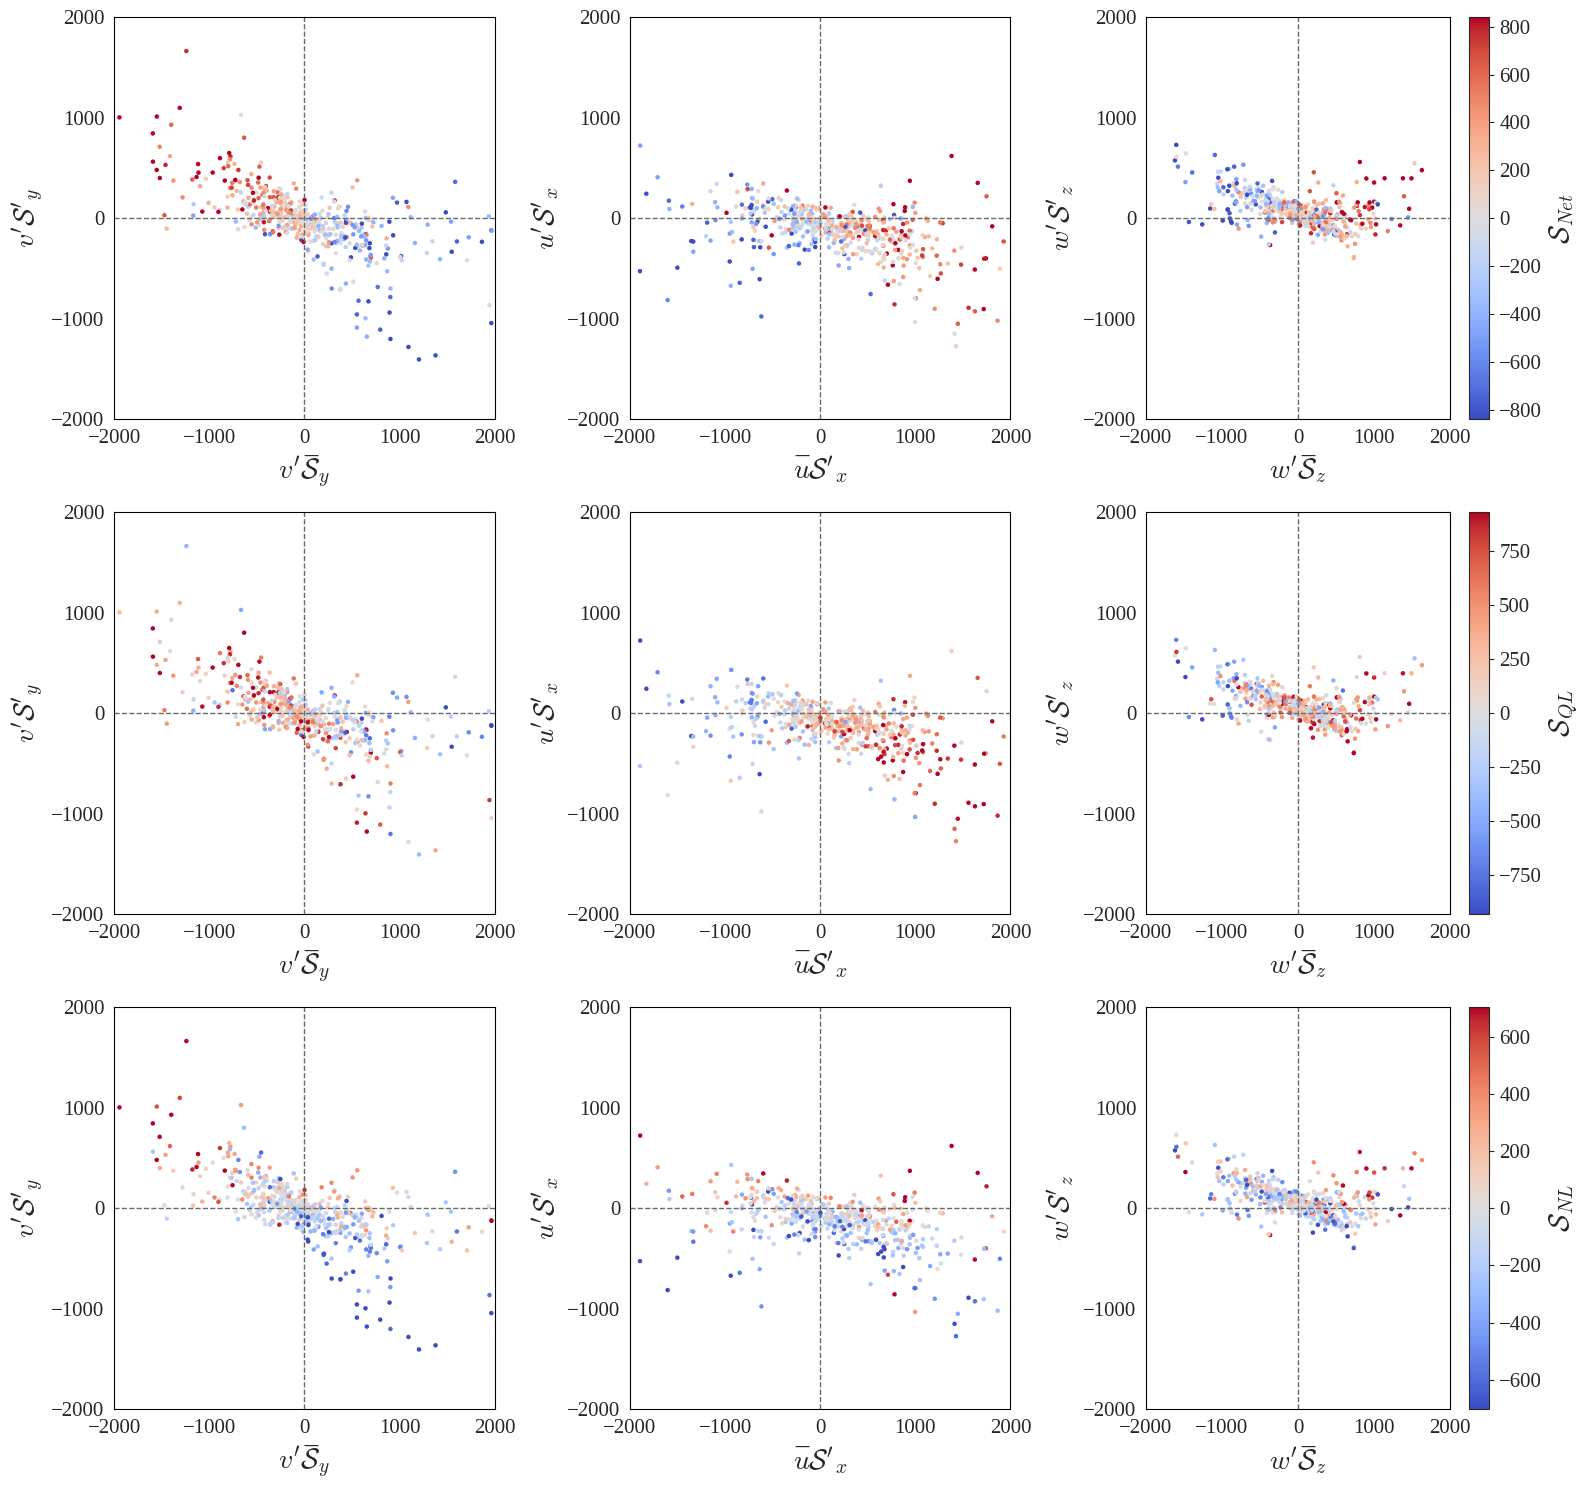

In [160]:
params = {
#     'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':15,
         'ytick.labelsize':15, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
}
plt.rcParams.update(params)

fig,ax = plt.subplots(3,3,figsize=(16,15), squeeze=False)

tmain_term = '$\mathcal{S}_{QL}$'
nl_term = '$\mathcal{S}_{NL}$'
netadv_term = '$\mathcal{S}_{Net}$'

# df_plt = df_t2.copy()
df_plt = df_t2.loc[(df_t2.dse_anom_Lag1 > 0) & (df_t2[dy_s_anom] > 0)].copy()
df_plt.rename({'T_main':tmain_term,'NL_sum': nl_term, 'Net_Adv':netadv_term}, axis=1, inplace=True)
print(df_plt.shape)
plot_breakdowns(df_plt, square_boxes=True, tmain_term=tmain_term, nl_term=nl_term, netadv_term=netadv_term)

pdf_path = '/home/data/lab_hardik/Manuscript1/Fig_posBG1_phase_interactions.pdf'
# plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF



## Z' vs S'y

In [161]:
ds_1980_1994 = xr.open_dataset('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/advection_breakdowns_1980_1994_rolling.nc')
ds_1995_2009 = xr.open_dataset('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/advection_breakdowns_1995_2009_rolling.nc')
ds_2010_2022 = xr.open_dataset('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/advection_breakdowns_2010_2022_rolling.nc')


In [162]:
ds_mst0 = ds_1980_1994[['z','z_anom']]
ds_mst1 = ds_1995_2009[['z','z_anom']]
ds_mst2 = ds_2010_2022[['z','z_anom']]

In [163]:
ds_mst = xr.concat([ds_mst0, ds_mst1, ds_mst2], dim='date', coords='minimal')

ds_mst = ds_mst.sel(date = ds_mst.date.dt.month.isin([3,4]))\
.sortby('date')

ds_mst['date'] = ds_mst.date.astype('datetime64[ns]')

In [164]:
ds_mst

<xarray.Dataset>
Dimensions:          (date: 2623)
Coordinates:
  * date             (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30
    number           int64 0
    step             timedelta64[ns] 00:00:00
    strftime         (date) object '01-Mar' '02-Mar' ... '29-Apr' '30-Apr'
    dates_roll_clmt  (date) datetime64[ns] 1904-03-01 1904-03-02 ... 1904-04-30
Data variables:
    z                (date) float64 2.687e+04 2.688e+04 ... 2.739e+04 2.719e+04
    z_anom           (date) float64 -255.6 -246.9 -121.9 ... 232.2 141.4 -56.37

In [165]:
df_plt = pd.merge(
ds_mst.z_anom.to_pandas().rename('z_anom'),
    df_t2[dy_s_anom], left_index=True, right_index=True
)
df_plt

z_anom  $\mathcal{S}'_y$
date                                    
1980-04-01  246.802640          0.001740
1980-04-02   81.891942          0.001246
1980-04-03    5.661669         -0.000203
1980-04-04  122.460012         -0.000472
1980-04-05  270.681172          0.001367
...                ...               ...
2022-04-26  147.448859          0.001792
2022-04-27  170.426200          0.002874
2022-04-28  232.181067          0.003769
2022-04-29  141.409323          0.003585
2022-04-30  -56.368856          0.003197

[1234 rows x 2 columns]

0.3928072850364138


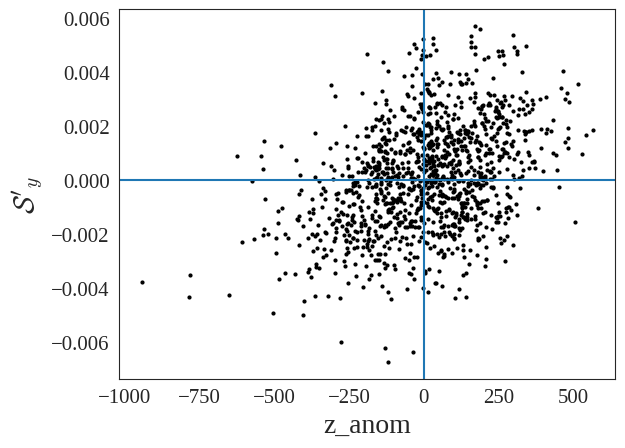

In [166]:
fig,ax = plt.subplots()
# plt.plot(kind='scatter',x = df_plt['z_anom'], y=df_plt[dy_s_anom], ax=ax)
df_plt.plot.scatter(x='z_anom',y=dy_s_anom, ax=ax, c='k',s=4)
print(df_plt['z_anom'].corr(df_plt[dy_s_anom]))
plt.axhline(0)
plt.axvline(0)


# Regimes

In [167]:
base_conds_posbg = (df_t2.dse_anom_Lag1 > 0)
base_conds_posbg1 = (base_conds_posbg & (df_t2[dy_s_anom] > 0))
base_conds_posbg2 = (base_conds_posbg & (df_t2[dy_s_anom] < 0))

base_conds_negbg = (df_t2.dse_anom_Lag1 < 0)
base_conds_negbg1 = (base_conds_negbg & (df_t2[dy_s_anom] < 0))
base_conds_negbg2 = (base_conds_negbg & (df_t2[dy_s_anom] > 0))

In [168]:
tmain_term = '$\delta \mathcal{S}_{QL}$'
nl_term = '$\delta\mathcal{S}_{NL}$'
netadv_term = '$\delta\mathcal{S}$'

(331, 58)


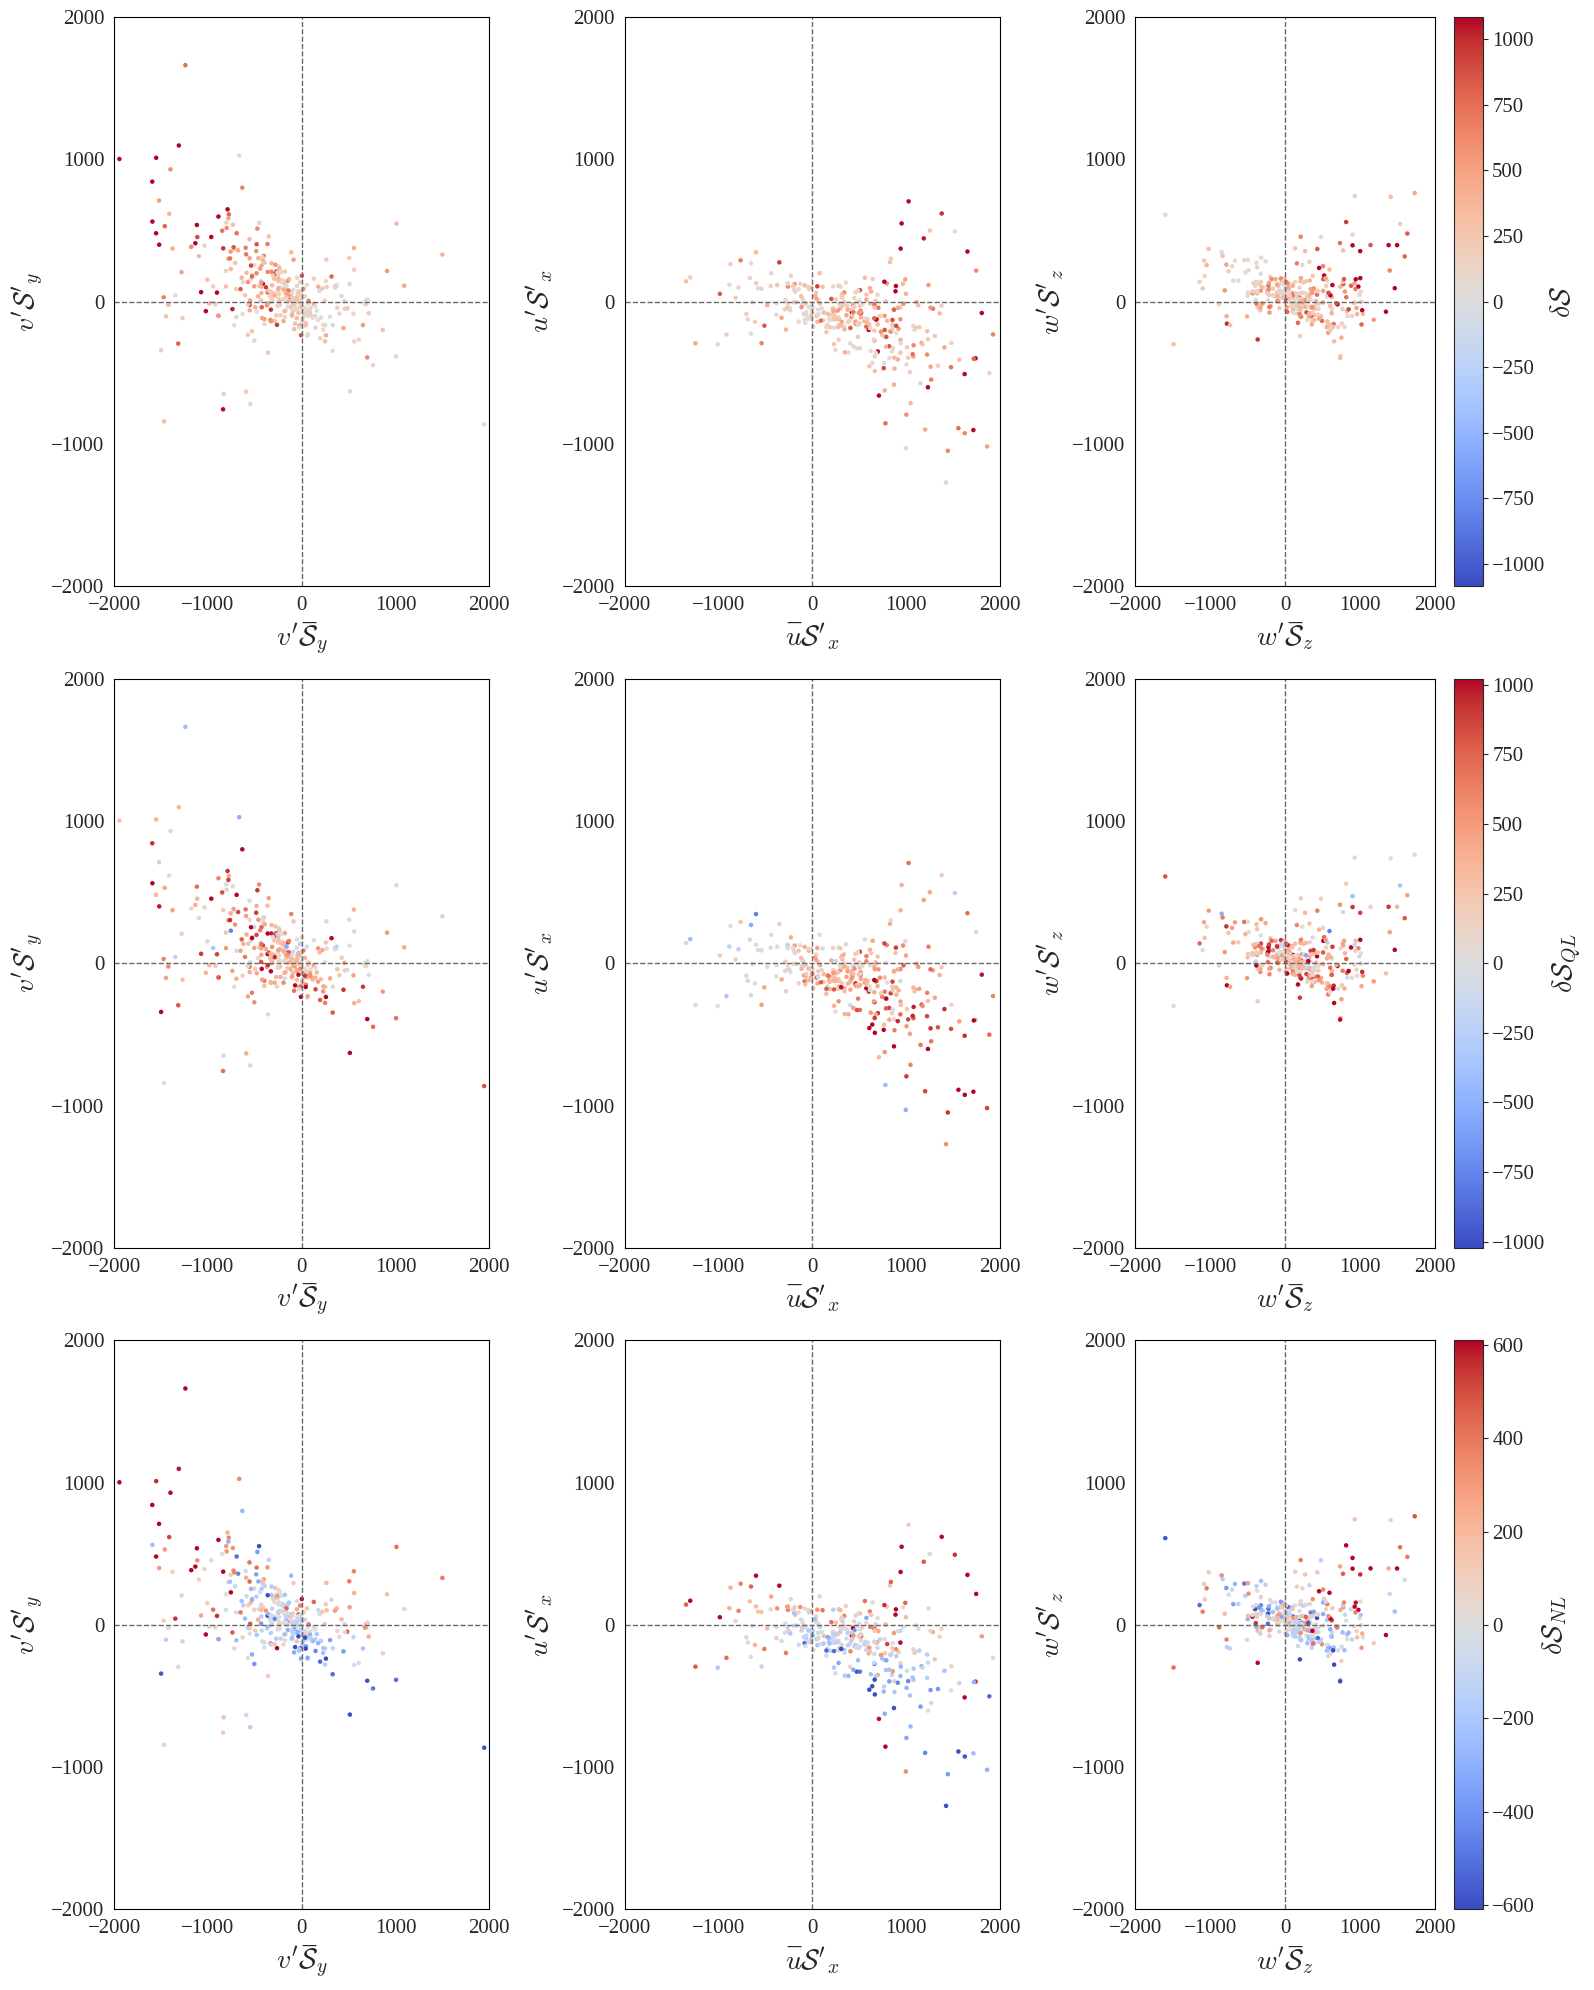

In [169]:
fig,ax = plt.subplots(3,3,figsize=(16,20), squeeze=False)

# df_plt = df_t2.copy()
df_plt = df_t2.loc[base_conds_posbg & (df_t2.Net_Adv>0)].copy()
df_plt.rename({'T_main':tmain_term,'NL_sum': nl_term, 'Net_Adv':netadv_term}, axis=1, inplace=True)
print(df_plt.shape)
plot_breakdowns(df_plt, square_boxes=True, tmain_term=tmain_term, nl_term=nl_term, netadv_term=netadv_term)

# df_plt = df_t2.loc[base_conds_posbg2].copy()
# print(df_plt.shape)

# plot_breakdowns(df_plt, netadv_term=)

(347, 58)


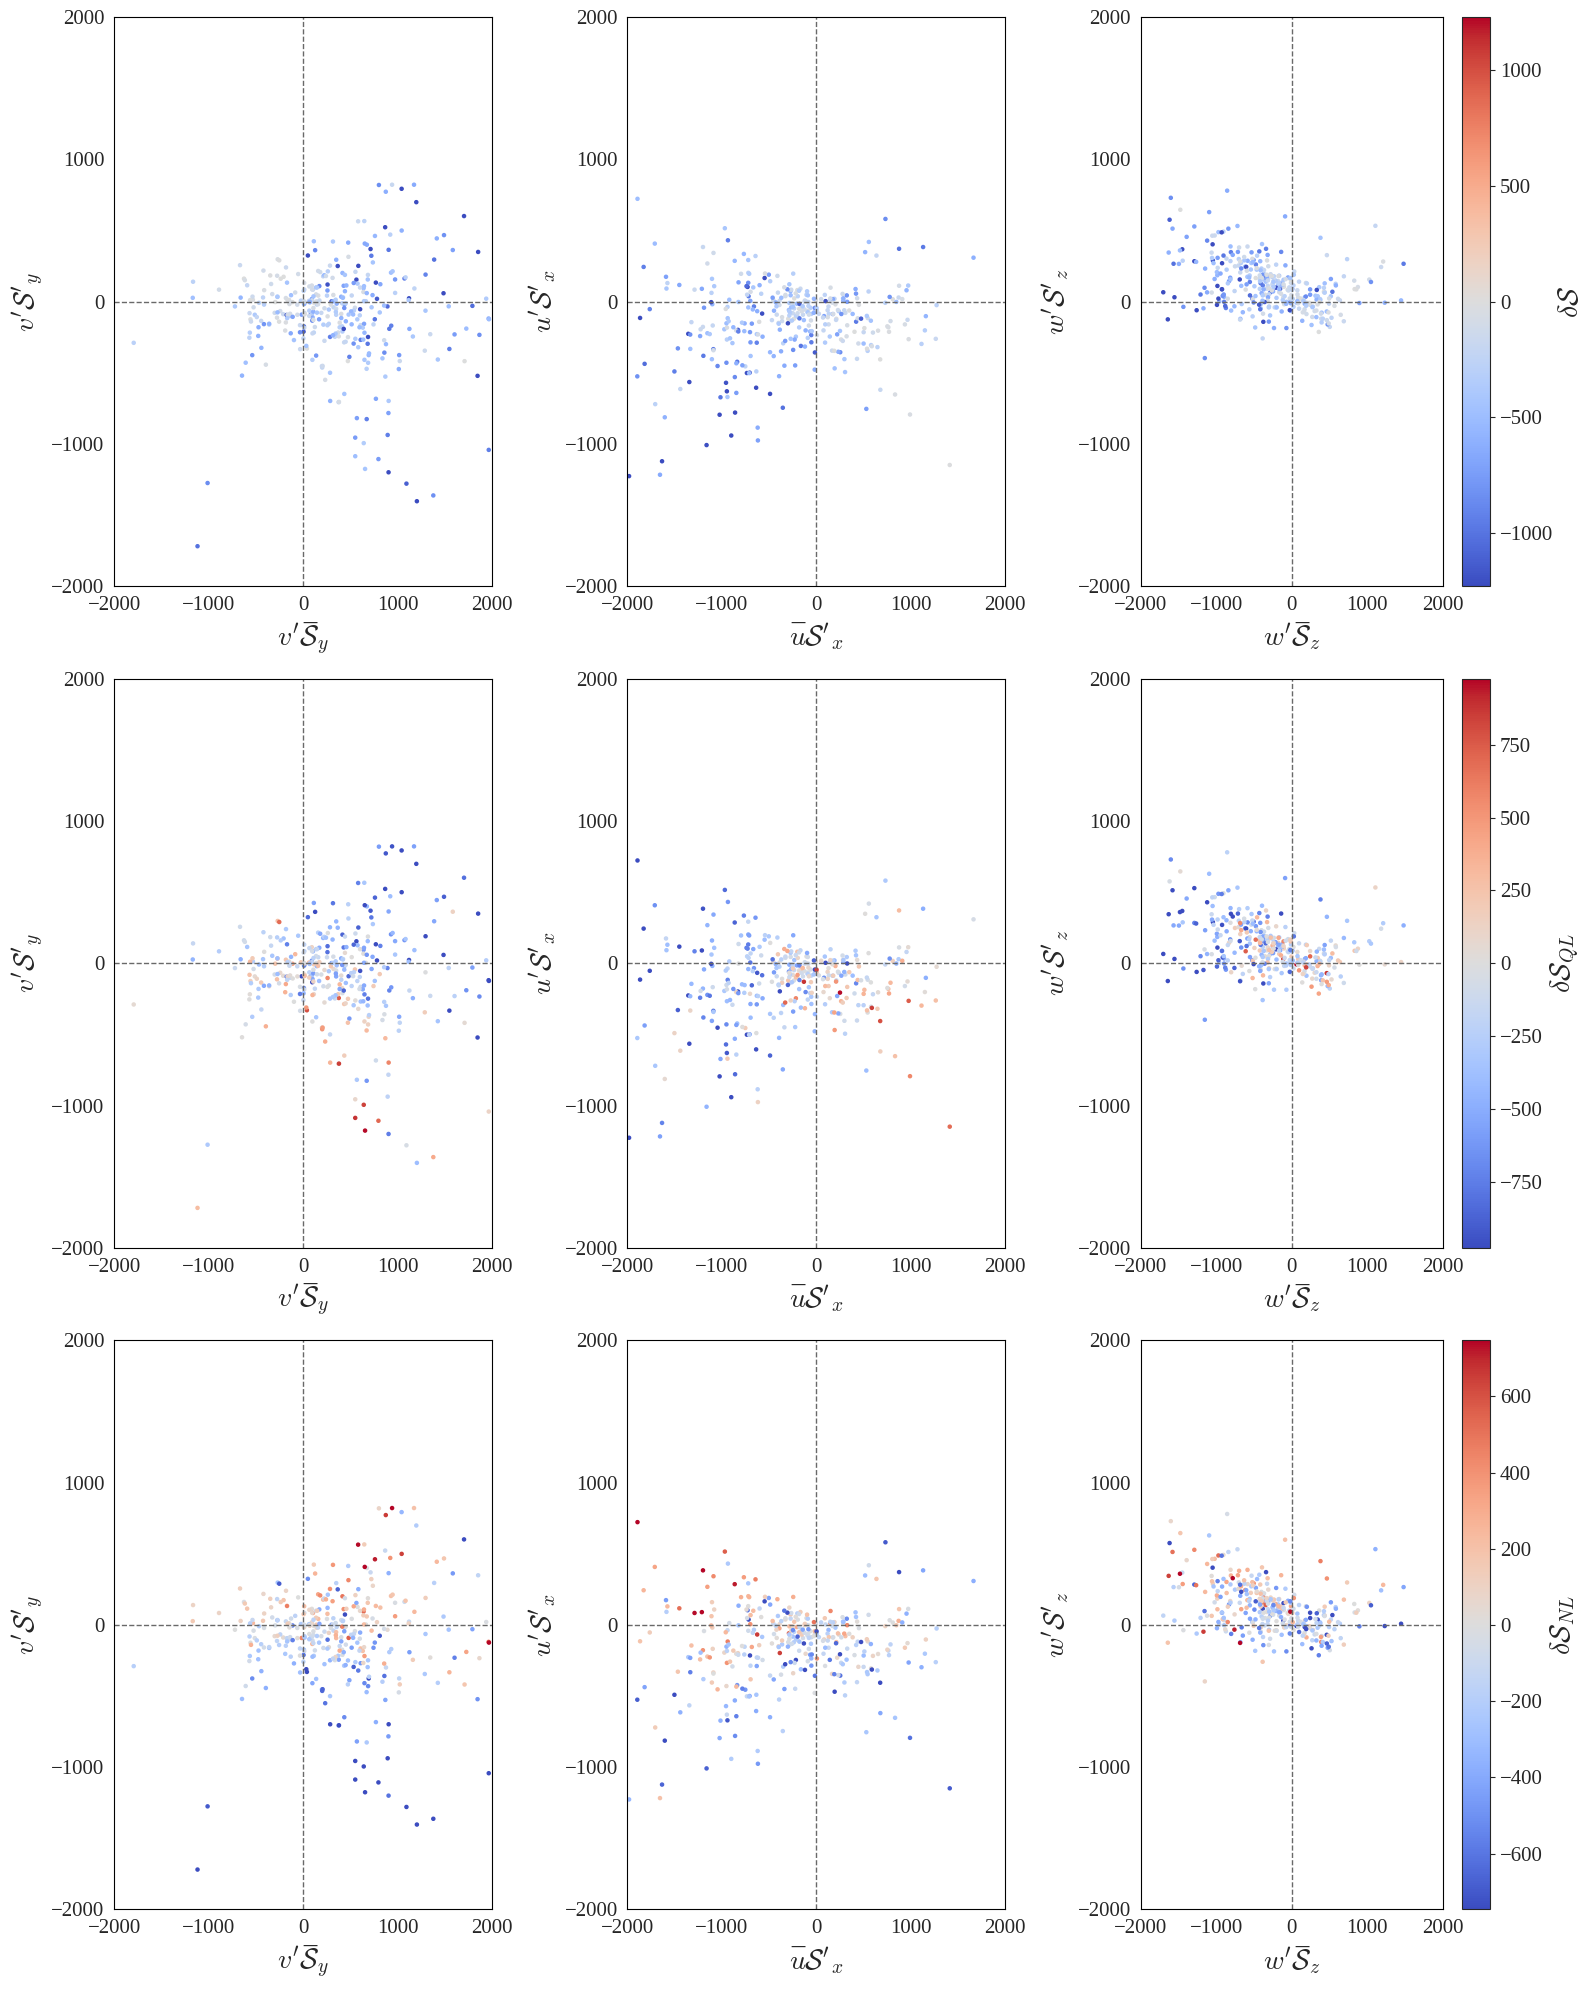

In [170]:
fig,ax = plt.subplots(3,3,figsize=(16,20), squeeze=False)

# df_plt = df_t2.copy()
df_plt = df_t2.loc[base_conds_posbg & (df_t2.Net_Adv<0)].copy()
df_plt.rename({'T_main':tmain_term,'NL_sum': nl_term, 'Net_Adv':netadv_term}, axis=1, inplace=True)
print(df_plt.shape)
plot_breakdowns(df_plt, square_boxes=True, tmain_term=tmain_term, nl_term=nl_term, netadv_term=netadv_term)

# df_plt = df_t2.loc[base_conds_posbg2].copy()
# print(df_plt.shape)

# plot_breakdowns(df_plt, netadv_term=)

- v's' driving del S_NL > 0: might be causing saturation for very few points, 
- u's' driving del S_NL < 0: NL amplif: amplifies neative QL sum, which might not be of great magnitude
- v's' driving del S_NL < 0: NL amplif.: reverses the sign of positive QL sum, to cause decay (4th quad, [2,0] + [1,0])


## positive BG conditions, both tails of net flux

In [171]:
df_t2.NL_sum.quantile(np.linspace(0,1,11))

0.0   -1588.047050
0.1    -418.490069
0.2    -250.814083
0.3    -160.038467
0.4     -90.286215
0.5     -24.472154
0.6      51.181964
0.7     127.829478
0.8     234.129095
0.9     403.145184
1.0    1199.551816
Name: NL_sum, dtype: float64

# Detailed NL-QL interaction breakdowns

# +ve BG'

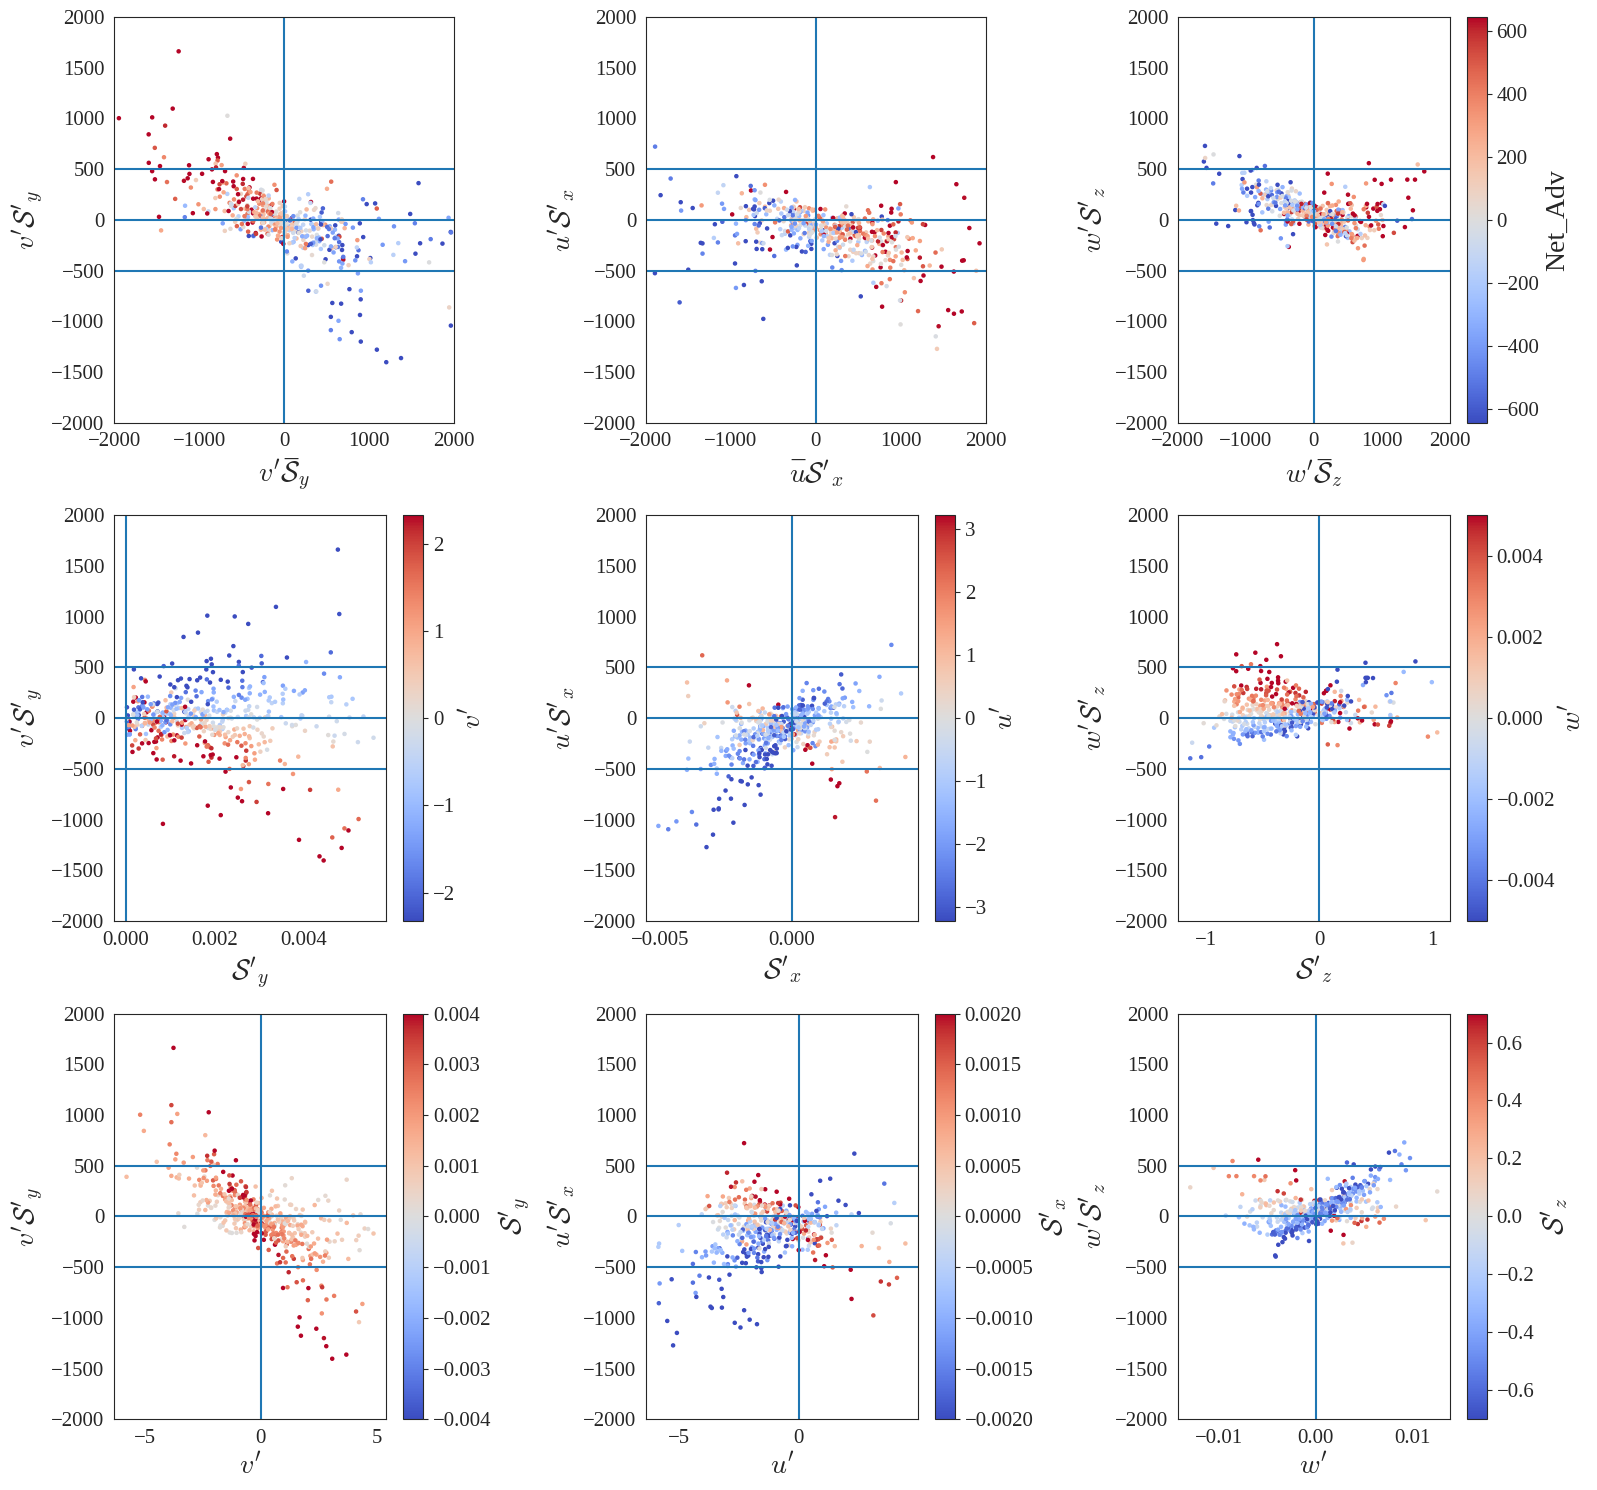

In [172]:
# df_plt.loc[df_plt.Net_Adv >= df_plt.Net_Adv.quantile(0.9), col_arr].plot.scatter(x=y_main, y = nl_vs)
fig,ax = plt.subplots(3,3,figsize=(16,15), squeeze=False)

# cvar = 'T_main'
# cvar = 't2m_anom'
cvar = 'dse_anom'

# cvar = dy_s_anom 
cvar = 'Net_Adv' 

df_plt = df_t2.loc[base_conds_posbg1].copy() # negative BG conditions
# & (df_t2[dy_s_anom] < -0.0005)

# df_plt = df_t2.loc[(df_t2.dse_anom > 2000) & (df_t2[dy_s_anom] > 0.001)].copy() # positive BG conditions
# df_plt = df_t2.loc[df_t2.dse_anom > 3000].copy()
# df_plt = df_t2.loc[df_t2.dse_anom < -2500].copy()
# df_plt = df_t2.loc[df_t2.t2m_anom < -2.2].copy()

low_qty = np.round(df_plt[cvar].quantile(0.1),3)
hi_qty = np.round(df_plt[cvar].quantile(0.9),3)

vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin

df_plt.plot.scatter(x=y_main, y = nl_vs, c=cvar, s=5, ax=ax[0,0], 
                    cmap='coolwarm', colorbar=False, vmin=vmin, vmax=vmax)
df_plt.plot.scatter(x=x_main, y = nl_us, c=cvar, ax=ax[0,1], 
                    cmap='coolwarm', s=5, colorbar=False, vmin=vmin, vmax=vmax)
df_plt.plot.scatter(x=z_main, y = nl_ws, c=cvar, ax=ax[0,2], 
                    cmap='coolwarm', s=5, vmin=vmin, vmax=vmax)

# cvar1 = T_main
# low_qty = np.round(df_plt[cvar1].quantile(0.1),3)
# hi_qty = np.round(df_plt[cvar1].quantile(0.9),3)

# vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
# vmax = -1*vmin
# df_plt.plot.scatter(
#     y='NL_sum' , x='Net_Adv', s=5, ax=ax[2,0], 
#     c=cvar1, cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
# )

cvar2 = vanom
low_qty = np.round(df_plt[cvar2].quantile(0.1),3)
hi_qty = np.round(df_plt[cvar2].quantile(0.9),3)
vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin

df_plt.plot.scatter(y=nl_vs, x = dy_s_anom, c=cvar2, s=5, ax=ax[1,0], 
                    cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
                   )

cvar2_2 = uanom
low_qty = np.round(df_plt[cvar2_2].quantile(0.1),3)
hi_qty = np.round(df_plt[cvar2_2].quantile(0.9),3)
vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin

df_plt.plot.scatter(y=nl_us, x = dx_s_anom, c=cvar2_2, s=5, ax=ax[1,1], 
                    cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
                   )

cvar3 = wanom
low_qty = np.round(df_plt[cvar3].quantile(0.1),3)
hi_qty = np.round(df_plt[cvar3].quantile(0.9),3)
vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin
df_plt.plot.scatter(
    y=nl_ws, x=dz_s_anom, c=cvar3, s=5, ax=ax[1,2], 
    cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
)

cvar2 = dy_s_anom
low_qty = np.round(df_plt[cvar2].quantile(0.1),3)
hi_qty = np.round(df_plt[cvar2].quantile(0.9),3)
vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin

df_plt.plot.scatter(y=nl_vs, x = vanom, c=cvar2, s=5, ax=ax[2,0], 
                    cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
                   )

cvar2_2 = dx_s_anom
low_qty = np.round(df_plt[cvar2_2].quantile(0.1),3)
hi_qty = np.round(df_plt[cvar2_2].quantile(0.9),3)
vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin

df_plt.plot.scatter(y=nl_us, x = uanom, c=cvar2_2, s=5, ax=ax[2,1], 
                    cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
                   )

cvar3 = dz_s_anom
low_qty = np.round(df_plt[cvar3].quantile(0.1),3)
hi_qty = np.round(df_plt[cvar3].quantile(0.9),3)
vmin = low_qty if np.abs(low_qty) > hi_qty else -1*hi_qty
vmax = -1*vmin
df_plt.plot.scatter(
    y=nl_ws, x=wanom, c=cvar3, s=5, ax=ax[2,2], 
    cmap='coolwarm', colorbar=True, vmin=vmin, vmax=vmax
)


for i in range(3):
    for j in range(3):
        ax[i,j].axhline(0)
        ax[i,j].axvline(0)
        
        if i==0:
            ax[i,j].set_xlim(-2000,2000)
            ax[i,j].set_ylim(-2000,2000)
#         if i in [1,2]:
#             ax[i,j].set_ylim(-1600, 2200)
#         if i==2:
#             ax[i,j].set_ylim(-1600, 2200)            
#         if i==2 and j==0:
        ax[i,j].set_ylim(-2000,2000)
        ax[i,j].axhline(500)
        ax[i,j].axhline(-500)
#             ax[i,j].set_ylim(-1500, 1500)

plt.tight_layout()

In [173]:
df_t2.Net_Adv.quantile(0.9)

778.0395797230265

In [174]:
df_t2.month.unique()

array([4], dtype=int32)

5
5


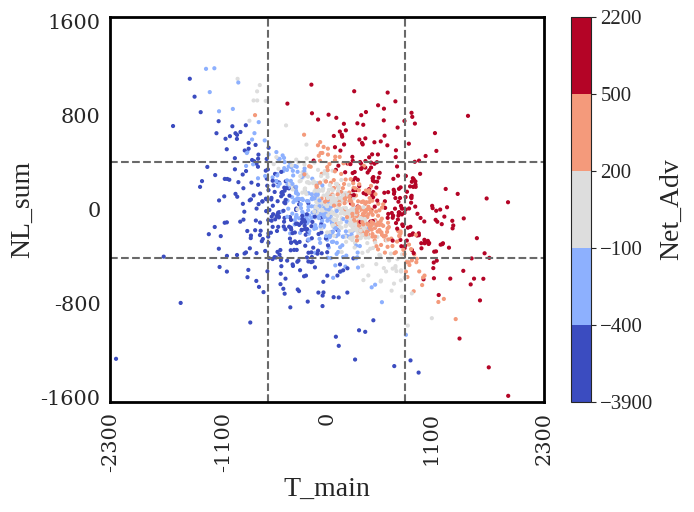

In [175]:
plot_tmain_nlsum(df = df_t2)
plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

5
5


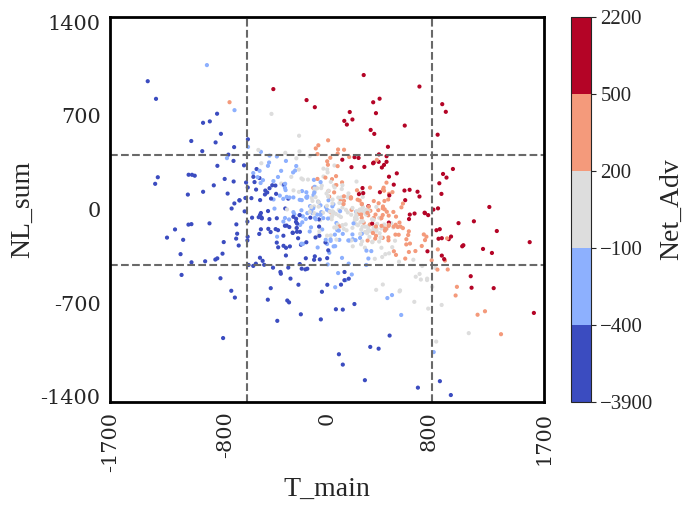

In [176]:
plot_tmain_nlsum(df = df_t2.loc[df_t2.dse_anom_Lag1 > 0])
plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

In [177]:
df_t2.NL_sum.quantile(np.linspace(0,1,11))

0.0   -1588.047050
0.1    -418.490069
0.2    -250.814083
0.3    -160.038467
0.4     -90.286215
0.5     -24.472154
0.6      51.181964
0.7     127.829478
0.8     234.129095
0.9     403.145184
1.0    1199.551816
Name: NL_sum, dtype: float64

In [178]:
df_t2.T_main.quantile(np.linspace(0,1,11))

0.0   -2239.024243
0.1    -628.430534
0.2    -359.517894
0.3    -164.474068
0.4     -31.111462
0.5      94.699169
0.6     239.748057
0.7     372.425235
0.8     521.173668
0.9     819.147914
1.0    1917.682272
Name: T_main, dtype: float64

## Define prim_cls

In [179]:
df_t2['quadrant'] = np.where((df_t2[y_main]>0) & (df_t2[x_main]>0), 1, 
                              np.where((df_t2[y_main]<0) & (df_t2[x_main]>0), 2, 
                                       np.where((df_t2[y_main]<0) & (df_t2[x_main]<0), 3, 4)
            )
)

# df_t2['prim_cls'] = \
# np.where(df_t2['quadrant'].isin([1,3]), df_t2['quadrant'], 
#          np.where(
#              (df_t2[x_main] < -0.1*df_t2[x_main].std()) & (df_t2[z_main] > -0.1*df_t2[z_main].std()), 4.1, 
#                   np.where(
#                       (df_t2[x_main] < -0.1*df_t2[x_main].std()) & (df_t2[z_main] < -0.1*df_t2[z_main].std()), 4.2,
#                            np.where(
#                                (df_t2[x_main] > -0.1*df_t2[x_main].std()) & (df_t2[z_main] > 0.1*df_t2[z_main].std()), 2.2, 
#                                     np.where(
#                                         (df_t2[x_main] > -0.1*df_t2[x_main].std()) & (df_t2[z_main] < 0.1*df_t2[z_main].std()), 2.1, np.nan)
#                                    )
#                           )
#                  )        
#         )

df_t2['prim_cls'] = \
np.where(df_t2['quadrant'].isin([1,3]), df_t2['quadrant'], 
         np.where(
             (df_t2[x_main] < -0.09*df_t2[x_main].std() + df_t2[x_main].mean()) & 
             (df_t2[z_main] > -0.075*df_t2[z_main].std() + df_t2[z_main].mean()), 4.1, 
                  np.where(
                      (df_t2[x_main] < -0.09*df_t2[x_main].std() + df_t2[x_main].mean()) & 
                      (df_t2[z_main] < -0.075*df_t2[z_main].std() + df_t2[z_main].mean()), 4.2,
                           np.where(
                               (df_t2[x_main] > -0.09*df_t2[x_main].std() + df_t2[x_main].mean()) & 
                               (df_t2[z_main] > 0.075*df_t2[z_main].std() + df_t2[z_main].mean()), 2.2, 
                                    np.where(
                                        (df_t2[x_main] > -0.09*df_t2[x_main].std() + df_t2[x_main].mean()) & 
                                        (df_t2[z_main] < 0.075*df_t2[z_main].std() + df_t2[z_main].mean()), 2.1, np.nan
                                    )
                           )
                  )
         )
        )


5
5
5
5


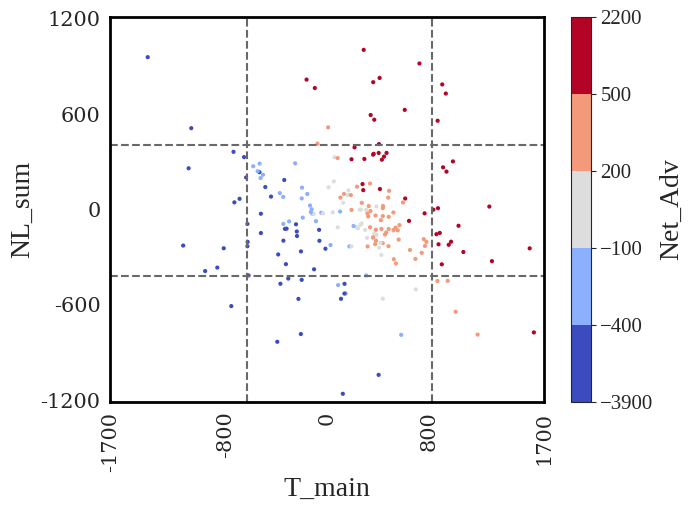

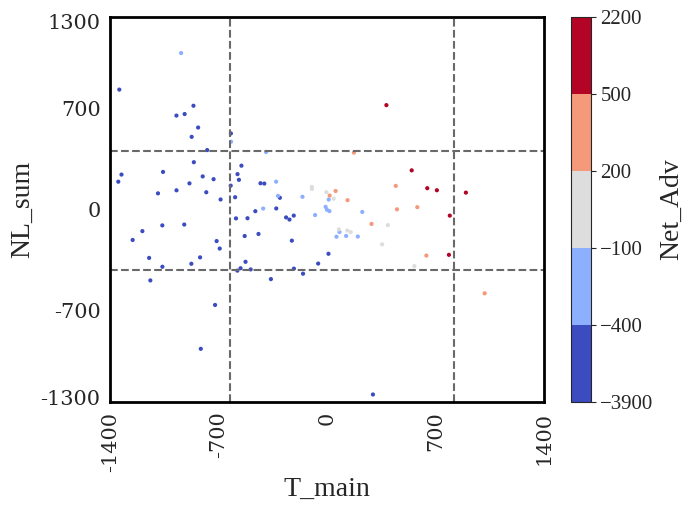

In [180]:
plot_tmain_nlsum(df = df_t2.loc[base_conds_posbg1 & (df_t2.prim_cls.isin([4.2, 2.2]))]) #  
plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')


plot_tmain_nlsum(df = df_t2.loc[base_conds_posbg2 & (df_t2.prim_cls.isin([4.2, 2.2]))] ) #  & (df_t2.prim_cls.isin([4.2, 2.2]))
plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

In [181]:
var_lst_fund_gradh = [s for s in var_lst_fund if 'd' in s and 'z' not in s]
var_lst_fund_velh = [s for s in var_lst_fund if 'd' not in s and 'w' not in s]

<Axes: >

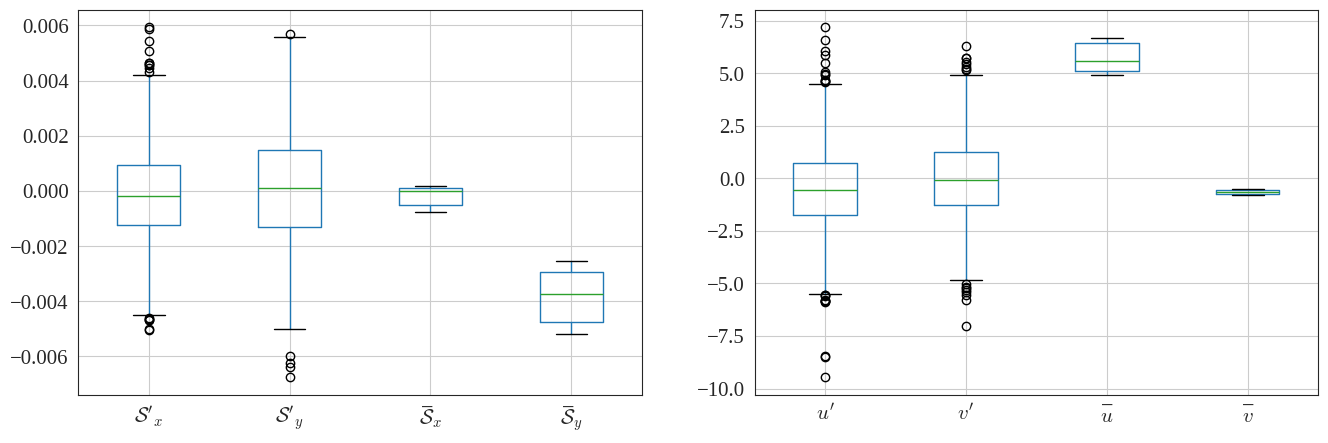

In [182]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_t2[[dx_s_anom, dy_s_anom, dx_sbar, dy_sbar]].boxplot(ax=ax[0])
df_t2[[uanom, vanom, ubar, vbar]].boxplot(ax=ax[1])


# Defining df_t2 class variables

In [183]:
importlib.reload(variables)
from variables import *

$\mathregular{\mathcal{S}'_{x}}$
["$u'$", "$v'$", "$w'$", "$\\mathcal{S}'_x$", "$\\mathcal{S}'_y$", "$\\mathcal{S}'_z$", '${u̅}$', '${v̅}$', '${w̅}$', '$\\mathcal{S}̅_x$', '$\\mathcal{S}̅_y$', '$\\mathcal{S}̅_z$']
dict_values(["$u'$$\\mathcal{S}'_x$", "$v'$$\\mathcal{S}'_y$", "$w'$$\\mathcal{S}'_z$", "$u'$$\\mathcal{S}̅_x$", "$v'$$\\mathcal{S}̅_y$", "$w'$$\\mathcal{S}̅_z$", "${u̅}$$\\mathcal{S}'_x$", "${v̅}$$\\mathcal{S}'_y$", "${w̅}$$\\mathcal{S}'_z$", '${u̅}$$\\mathcal{S}̅_x$', '${v̅}$$\\mathcal{S}̅_y$', '${w̅}$$\\mathcal{S}̅_z$'])
["$v'$$\\mathcal{S}̅_y$", "$w'$$\\mathcal{S}̅_z$", "${u̅}$$\\mathcal{S}'_x$"]
["$u'$$\\mathcal{S}'_x$", "$v'$$\\mathcal{S}'_y$", "$w'$$\\mathcal{S}'_z$"]
['${u̅}$$\\mathcal{S}̅_x$', '${v̅}$$\\mathcal{S}̅_y$', '${w̅}$$\\mathcal{S}̅_z$']
["$u'$$\\mathcal{S}̅_x$", "${v̅}$$\\mathcal{S}'_y$", "${w̅}$$\\mathcal{S}'_z$"]


In [185]:
df_t2['bg_cls'] = np.where((df_t2.dse_anom_Lag1 > 0) & (df_t2[dy_s_anom] > 0), 'pos1', 
                           np.where((df_t2.dse_anom_Lag1 > 0) & (df_t2[dy_s_anom] < 0), 'pos2', 
                                   np.where((df_t2.dse_anom_Lag1 < 0) & (df_t2[dy_s_anom] < 0), 'neg1', 'neg2')))


In [186]:
df_t2.groupby('bg_cls')['bg_cls'].count()

bg_cls
neg1    377
neg2    179
pos1    467
pos2    211
Name: bg_cls, dtype: int64

In [187]:
df_t2['bg_cls_main'] = df_t2['bg_cls'].str[:3].copy()

In [188]:
col_set = eddy_eddy + set_main + \
[T_main, 'NL_sum', 'x_contrib_NL', 'y_contrib_NL', 'z_contrib_NL', 'Net_Adv', dy_s_anom, 'dse_anom', 'dse_anom_Lag1']

col_set2 = col_set + [s for s in var_lst_fund if s not in col_set]


def conds2_z_dom(df, dom_fact=1):
    return ((df.z_contrib_NL > dom_fact*df.x_contrib_NL) 
    & (df.z_contrib_NL > df.y_contrib_NL))

def conds2_y_dom(df, dom_fact=1):
    return ((df.y_contrib_NL > dom_fact*df.x_contrib_NL) 
    & (df.y_contrib_NL > df.z_contrib_NL))

def conds2_x_dom(df, dom_fact=1):
    return ((df.x_contrib_NL > dom_fact*df.y_contrib_NL) 
    & (df.x_contrib_NL > df.z_contrib_NL))


In [189]:
# conds_posbg_amplif_nlsat = (
#     (df_t2['Net_Adv'] > 0) 
#     & (df_t2[T_main] > 0)
#     & (df_t2['NL_sum'] < -300)
# )

# conds_posbg_amplif_nl = (
#     (df_t2['Net_Adv'] > 0) 
#     & (df_t2[T_main] < 0)
#     & (df_t2['NL_sum'] > 200) 
# )

# conds_posbg_amplif_ql_nl = (
#     (df_t2['Net_Adv'] > 500) 
#     & (df_t2[T_main] > 0)
#     & (df_t2['NL_sum'] > -300) 
# )

In [190]:
df_t2.shape

(1234, 63)

In [191]:
net_q9 = df_t2.Net_Adv.quantile(0.9)
net_q1 = df_t2.Net_Adv.quantile(0.1)

tmain_q9 = df_t2.T_main.quantile(0.9)
tmain_q1 = df_t2.T_main.quantile(0.1)

nl_q9 = df_t2.NL_sum.quantile(0.9)
nl_q1 = df_t2.NL_sum.quantile(0.1)


In [192]:
# df_amplif_ql.sort_values([nl_vs, nl_us])

In [330]:
df_t2['regime_cls'] = np.nan
df_t2['regime_cls'] = df_t2['regime_cls'].astype(str)

df_t2['combo_cls'] = np.nan
df_t2['combo_cls'] = df_t2['combo_cls'].astype(str)


## Growth of $S'_{Lag1} > 0$

In [331]:
conds_posbg_amplif_nlsat = (
    (df_t2['Net_Adv'] > 0)  
    & (df_t2['T_main'] > tmain_q9)
    & (df_t2['NL_sum'] < nl_q1)
)

conds_posbg_amplif_nl = (
    (df_t2['Net_Adv'] > net_q9) 
    & (df_t2[T_main] > 0)
#     & (df_t2[T_main].between(0, tmain_q9))
    & (df_t2['NL_sum'] > nl_q9) 
)

conds_posbg_amplif_ql = (
    (df_t2['Net_Adv'] > 0) 
    & (df_t2[T_main] > tmain_q9)
    & (df_t2['NL_sum'].between(nl_q1, nl_q9)) 
)


## NL sat growth

In [332]:
df_amplif_posbg1_nlsat = df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nlsat, col_set2].copy()
print(df_amplif_posbg1_nlsat.shape)
# df_amplif_posbg1_nlsat.to_csv(dat_dir + 'Apr_posbg_amplif_nlsat_xNL_v2.csv')
# all u's' is negative
df_amplif_posbg1_nlsat.loc[:,'boxplot_ind'] = 'amplif_NLSat'
df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nlsat, 'regime_cls'] = 'amplif_NLSat'
df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nlsat, 'combo_cls'] = 'amplif_NLSat'


(14, 26)


In [333]:
df_amplif_posbg2_nlsat = df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nlsat, col_set2].copy()
print(df_amplif_posbg2_nlsat.shape)
# df_amplif_posbg2_nlsat.to_csv(dat_dir + 'Apr_posbg_amplif_nlsat_xNL_v2.csv')
# all u's' is negative
df_amplif_posbg2_nlsat.loc[:,'boxplot_ind'] = 'amplif_NLSat'

print(df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nlsat, 'regime_cls'].shape)
df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nlsat, 'regime_cls'] = 'amplif_NLSat'


(1, 26)
(1,)


## QL growth

In [334]:
df_amplif_posbg1_ql = df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_ql, col_set2].copy()
print(df_amplif_posbg1_ql.shape)
print(df_amplif_posbg1_ql.loc[(df_amplif_posbg1_ql[nl_us]<0) & (df_amplif_posbg1_ql[nl_vs]>0)].shape)

print(df_amplif_posbg1_ql.loc[(df_amplif_posbg1_ql[nl_us]>0) & (df_amplif_posbg1_ql[nl_vs]<0)].shape)
print(df_amplif_posbg1_ql.loc[(df_amplif_posbg1_ql[nl_us]>0) & (df_amplif_posbg1_ql[nl_vs]>0)].shape)
print(df_amplif_posbg1_ql.loc[(df_amplif_posbg1_ql[nl_us]<0) & (df_amplif_posbg1_ql[nl_vs]<0)].shape)

# df_amplif_posbg1_ql.loc[(df_amplif_posbg1_ql[nl_us]<0) & (df_amplif_posbg1_ql[nl_vs]>0)]\
# .to_csv(dat_dir + 'Apr_posbg_amplif_ql_xy_v2.csv')

df_amplif_posbg1_ql.loc[(df_amplif_posbg1_ql[nl_us]<0) & (df_amplif_posbg1_ql[nl_vs]>0), 'boxplot_ind'] = 'amplif_QL'

df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_ql, 'regime_cls'] = 'amplif_QL'
df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_ql & (df_t2[nl_us]<0) & (df_t2[nl_vs]>0), 'combo_cls'] = 'amplif_QL'


(24, 26)
(19, 26)
(0, 26)
(0, 26)
(5, 26)


In [335]:
df_amplif_posbg2_ql = df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_ql, col_set2].copy()
print(df_amplif_posbg2_ql.shape)
print(df_amplif_posbg2_ql.loc[(df_amplif_posbg2_ql[nl_us]<0) & (df_amplif_posbg2_ql[nl_vs]>0)].shape)

print(df_amplif_posbg2_ql.loc[(df_amplif_posbg2_ql[nl_us]>0) & (df_amplif_posbg2_ql[nl_vs]<0)].shape)
print(df_amplif_posbg2_ql.loc[(df_amplif_posbg2_ql[nl_us]>0) & (df_amplif_posbg2_ql[nl_vs]>0)].shape)
print(df_amplif_posbg2_ql.loc[(df_amplif_posbg2_ql[nl_us]<0) & (df_amplif_posbg2_ql[nl_vs]<0)].shape)

# df_amplif_posbg2_ql.loc[(df_amplif_posbg2_ql[nl_us]<0) & (df_amplif_posbg2_ql[nl_vs]>0)]\
# .to_csv(dat_dir + 'Apr_posbg_amplif_ql_xy_v2.csv')

df_amplif_posbg2_ql.loc[(df_amplif_posbg2_ql[nl_us]<0) & (df_amplif_posbg2_ql[nl_vs]>0), 'boxplot_ind'] = 'amplif_QL'

df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_ql, 'regime_cls'] = 'amplif_QL'


(3, 26)
(1, 26)
(1, 26)
(1, 26)
(0, 26)


## NL growth

In [454]:
df_amplif_posbg1_nl = df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nl].copy()
print(df_amplif_posbg1_nl.shape)
print(df_amplif_posbg1_nl.loc[(df_amplif_posbg1_nl[nl_vs]>0) & (conds2_y_dom(df_amplif_posbg1_nl, dom_fact=1))].shape)
print(df_amplif_posbg1_nl.loc[(df_amplif_posbg1_nl[nl_us]>0) & (conds2_x_dom(df_amplif_posbg1_nl, dom_fact=1))].shape)
print(df_amplif_posbg1_nl.loc[(df_amplif_posbg1_nl[nl_ws]>0) & (conds2_z_dom(df_amplif_posbg1_nl, dom_fact=1))].shape)

# df_amplif_posbg1_nl.loc[(df_amplif_posbg1_nl[nl_vs]>0) & (conds2_y_dom(df_amplif_posbg1_nl, dom_fact=1))]\
# .to_csv(dat_dir + 'Apr_posbg_amplif_nl_yNL_v2.csv')

df_amplif_posbg1_nl.loc[(df_amplif_posbg1_nl[nl_vs]>0) & (conds2_y_dom(df_amplif_posbg1_nl, dom_fact=1)), 'boxplot_ind']\
= 'amplif_NL'

df_amplif_posbg1_nl.loc[(df_amplif_posbg1_nl[nl_vs]>0) & (conds2_y_dom(df_amplif_posbg1_nl, dom_fact=1))].sort_values(nl_vs)

df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nl, 'regime_cls'] = 'amplif_NL'

df_t2.loc[
    base_conds_posbg1 & conds_posbg_amplif_nl & 
    (df_t2[nl_vs]>0) & (conds2_y_dom(df_t2, dom_fact=1)), 'combo_cls'] = 'amplif_NL'


(14, 67)
(10, 67)
(1, 67)
(3, 67)


In [455]:
df_amplif_posbg2_nl = df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nl].copy()
print(df_amplif_posbg2_nl.shape)
print(df_amplif_posbg2_nl.loc[(df_amplif_posbg2_nl[nl_us]>0) & (conds2_x_dom(df_amplif_posbg2_nl, dom_fact=1))].shape)

# df_amplif_posbg2_nl.loc[(df_amplif_posbg2_nl[nl_vs]>0) & (conds2_y_dom(df_amplif_posbg2_nl, dom_fact=1))]\
# .to_csv(dat_dir + 'Apr_posbg_amplif_nl_yNL_v2.csv')

df_amplif_posbg2_nl.loc[(df_amplif_posbg2_nl[nl_vs]>0) & (conds2_y_dom(df_amplif_posbg2_nl, dom_fact=1)), 'boxplot_ind']\
= 'amplif_NL'

df_amplif_posbg2_nl.loc[(df_amplif_posbg2_nl[nl_vs]>0) & (conds2_y_dom(df_amplif_posbg2_nl, dom_fact=1))].sort_values(nl_vs)

df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nl, 'regime_cls'] = 'amplif_NL'


(2, 67)
(2, 67)


## Decay of $S'_{Lag1} > 0$

## Decay NL Sat

In [338]:
conds_posbg_decay_nlsat = (
#     (df_t2['Net_Adv'] < net_q1)
    (df_t2['Net_Adv'] < 0)
    & (df_t2.T_main < tmain_q1)
    & (df_t2.NL_sum > nl_q9)
)


In [339]:
df_decay_posbg_nlsat = df_t2.loc[base_conds_posbg & conds_posbg_decay_nlsat, col_set2].copy() 
print(df_decay_posbg_nlsat.shape)

(13, 26)


In [340]:
df_decay_posbg_nlsat.sort_values(nl_vs)\
.loc[df_decay_posbg_nlsat[nl_vs] > 0].shape

(9, 26)

In [341]:
df_decay_posbg_nlsat.sort_values(nl_vs)\
.loc[df_decay_posbg_nlsat[nl_vs] > 0]\
.to_csv(dat_dir + 'Apr_posbg_decay_nlsat_yNL_v2.csv')

In [342]:
df_t2.loc[base_conds_posbg & conds_posbg_decay_nlsat, 'regime_cls'] = 'decay_NLSat'
print(df_t2.loc[base_conds_posbg & conds_posbg_decay_nlsat & (df_t2[nl_vs]>0), 'combo_cls'].shape)

(9,)


In [343]:
df_t2.loc[base_conds_posbg & conds_posbg_decay_nlsat & (df_t2[nl_vs]>0), 'combo_cls'] = 'decay_NLSat'

In [344]:
## New view on NL decay

In [345]:
# df_t2.loc[base_conds_posbg & (conds_posbg_decay_nl1 | conds_posbg_decay_nl2), col_set2].sort_values(nl_vs)

In [346]:
# df_decay_posbg1_nl1 = df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nl1, col_set2].copy() 
# print(df_decay_posbg1_nl1.shape)

# # df_decay_posbg1_nl1.sort_values(nl_vs)\
# # .to_csv(dat_dir + 'Apr_posbg_decay_nl1_yNL_v2.csv')

# df_decay_posbg1_nl1.loc[:, 'boxplot_ind'] = 'decay_NL1'
# df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nl1, 'regime_cls'] = 'decay_NL1_y'


In [347]:
# df_decay_posbg1_nl1.sort_values(nl_vs)

In [348]:
# df_decay_posbg1_nl2 = df_t2.loc[base_conds_posbg & conds_posbg_decay_nl2, col_set2].copy() 
# print(df_decay_posbg1_nl2.shape)
# print(
#     df_decay_posbg1_nl2.loc[(df_decay_posbg1_nl2[nl_vs]<0) & conds2_y_dom(df_decay_posbg1_nl2, dom_fact=1)]
#     .sort_values(nl_vs).shape
# )


# # df_decay_posbg1_nl2.loc[(df_decay_posbg1_nl2[nl_vs]<0) & conds2_y_dom(df_decay_posbg1_nl2, dom_fact=1)].sort_values(nl_vs)\
# # .to_csv(dat_dir + 'Apr_posbg_decay_nl2_yNL_v2.csv')

# # df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nl2 & 
# #           (df_t2[nl_vs]<0) & conds2_y_dom(df_t2, dom_fact=1.5), 'regime_cls'] = 'decay_NL2_y'


In [349]:
# df_decay_posbg1_nl2.loc[(df_decay_posbg1_nl2[nl_vs]<0) & conds2_y_dom(df_decay_posbg1_nl2, dom_fact=1)]\
#     .sort_values(nl_vs)

In [350]:
# df_t2.loc[df_t2.index == '1981-04-20']

## Decay NL1

In [351]:
conds_posbg_decay_nl1 = (
    (df_t2['Net_Adv'] < net_q1)
#     (df_t2['Net_Adv'] < 0)
    & (df_t2.T_main < 0)
    & (df_t2.NL_sum < nl_q1)
)


In [352]:
df_t2.loc[base_conds_posbg & (conds_posbg_decay_nl1), col_set2].shape

(21, 26)

In [353]:
df_decay_posbg_nl1 = df_t2.loc[base_conds_posbg & (conds_posbg_decay_nl1), col_set2].copy() 

print(df_decay_posbg_nl1.shape)
df_decay_posbg_nl_xNL = \
df_decay_posbg_nl1.loc[(df_decay_posbg_nl1[nl_us] < 0) #& (df_decay_posbg_nl1[uanom] > 0) 
                      & conds2_x_dom(df_decay_posbg_nl1, dom_fact=1)]\
.sort_values(['x_contrib_NL'])
# the nl_us cndition does not filter anything out above, so 11 rows is also the complete set of nl_us dominated days

print(df_decay_posbg_nl_xNL.shape)
df_decay_posbg_nl_xNL.sort_values(nl_us)

df_decay_posbg_nl_xNL.to_csv(dat_dir + 'Apr_posbg_decay_nl1_xNL_v2.csv')

df_decay_posbg_nl_xNL.loc[:,'boxplot_ind'] = 'decay_NL_us'

df_t2.loc[base_conds_posbg & conds_posbg_decay_nl1, 'regime_cls'] = 'decay_NL1'
df_t2.loc[base_conds_posbg & conds_posbg_decay_nl1 & (df_t2[nl_us] < 0), 'combo_cls'] = 'decay_NL1_x'


(21, 26)
(11, 26)


In [354]:
# df_t2.loc[base_conds_posbg & (conds_posbg_decay_nl1) & 
#           ((df_decay_posbg_nl1[nl_us] < 0) & conds2_x_dom(df_decay_posbg_nl1, dom_fact=1)), col_set2]

In [355]:
df_decay_nl1_yNL = df_t2.loc[base_conds_posbg & (conds_posbg_decay_nl1) & 
          ~((df_decay_posbg_nl1[nl_us] < 0) & conds2_x_dom(df_decay_posbg_nl1, dom_fact=1)), col_set2]

df_decay_nl1_yNL.shape

(10, 26)

In [356]:
df_t2.loc[base_conds_posbg & conds_posbg_decay_nl1 & (df_t2[nl_vs] < 0), 'combo_cls'] = 'decay_NL1_y'


In [357]:
df_decay_nl1_yNL.to_csv(dat_dir + 'Apr_posbg_decay_nl1_yNL_v2.csv')


## Decay NL2

In [358]:
conds_posbg_decay_nl2 = (
#     (df_t2['Net_Adv'] < 0)
#     (df_t2['Net_Adv'] < -200)
    (df_t2['Net_Adv'] < net_q1)
    & (df_t2.T_main > 0)
    & (df_t2.NL_sum < nl_q1)
)

In [359]:
df_t2.loc[base_conds_posbg & (conds_posbg_decay_nl2), col_set2].shape

(7, 26)

In [360]:
df_decay_posbg_nl2 = df_t2.loc[base_conds_posbg & (conds_posbg_decay_nl2), col_set2[:-6]].copy()
print(df_decay_posbg_nl2.shape)
df_decay_posbg_nl2.sort_values(nl_us)

df_decay_posbg_nl_yNL = \
df_decay_posbg_nl2.loc[(df_decay_posbg_nl2[nl_vs] < 0) 
#                       & (df_decay_posbg_nl2[vanom] > 0) 
#                       & (df_decay_posbg_nl2[uanom] < 0) 
#                       & conds2_y_dom(df_decay_posbg_nl2, dom_fact=1)
                      ]\
.sort_values(['y_contrib_NL'])

print(df_decay_posbg_nl_yNL.shape)
df_decay_posbg_nl_yNL.to_csv(dat_dir + 'Apr_posbg_decay_nl2_yNL_v2.csv')

df_decay_posbg_nl_yNL.loc[:,'boxplot_ind'] = 'decay_NL_vs'

df_t2.loc[base_conds_posbg & conds_posbg_decay_nl2, 'regime_cls'] = 'decay_NL2'
df_t2.loc[base_conds_posbg & conds_posbg_decay_nl2 & (df_t2[nl_vs]<0), 'combo_cls'] = 'decay_NL2'


(7, 20)
(6, 20)


In [361]:
# df_decay_posbg1_nl_zNL = \
# df_decay_posbg1_nl.loc[(df_decay_posbg1_nl[nl_ws] < 0) & conds2_z_dom(df_decay_posbg1_nl,dom_fact=1)].sort_values(['z_contrib_NL'])
# print(df_decay_posbg1_nl_zNL.shape)
# # df_decay_posbg1_nl_zNL.to_csv(dat_dir + 'Apr_posbg_decay_nl_zNL.csv')

# df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nl & conds2_y_dom(df_t2), 'regime_cls'] = 'decay_nl_y'
# df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nl & conds2_x_dom(df_t2), 'regime_cls'] = 'decay_nl_x'
# df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nl & conds2_z_dom(df_t2), 'regime_cls'] = 'decay_nl_z'

In [362]:
# df_decay_posbg_nl_yNL.loc[:,col_set2[:-6]].sort_values(vanom)

In [363]:
# df_decay_posbg2_nl1 = df_t2.loc[base_conds_posbg2 & conds_posbg_decay_nl1, col_set2].copy() 
# print(df_decay_posbg2_nl1.shape)

# # df_decay_posbg2_nl1.sort_values(nl_vs)\
# # .to_csv(dat_dir + 'Apr_posbg2_decay_nl1_xNL_v2.csv')

# # df_decay_posbg2_nl1.loc[df_decay_posbg2_nl1[nl_us]<0].sort_values(nl_us)\
# # .to_csv(dat_dir + 'Apr_posbg2_decay_nl_xNL_v2.csv')

# df_t2.loc[base_conds_posbg2 & conds_posbg_decay_nl1 & (df_t2[nl_us]<0), 'regime_cls'] = 'decay_NL1_x'


In [364]:
# df_decay_posbg2_nl1.loc[df_decay_posbg2_nl1[nl_us]<0].sort_values(nl_us)

## QL decay

In [365]:
conds_posbg_decay_ql = (
    (df_t2['Net_Adv'] < net_q1)
    & (df_t2.T_main < tmain_q1)
#     & (df_t2.T_main < 0)
    & (df_t2.NL_sum.between(nl_q1, nl_q9))
)

In [366]:
df_decay_posbg_ql = df_t2.loc[base_conds_posbg & conds_posbg_decay_ql, col_set2].copy()
print(df_decay_posbg_ql.shape)

print(df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]>0)].shape)
print(df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]<0)].shape)

print(df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]>0) & (df_decay_posbg_ql[nl_vs]<0)].shape)
print(df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]>0) & (df_decay_posbg_ql[nl_vs]>0)].shape)

# df_out = df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]>0)]
# print('df_out.shape', df_out.shape)
# df_out.to_csv(dat_dir + 'Apr_posbg_decay_ql_xy_v2.csv')

df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]<0)]\
.to_csv(dat_dir + 'Apr_posbg_decay_ql_xyip_v2.csv')

df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]>0), 'boxplot_ind'] = 'decay_QL'


df_t2.loc[base_conds_posbg & conds_posbg_decay_ql, 'regime_cls'] = 'decay_QL'

df_t2.loc[
    base_conds_posbg & conds_posbg_decay_ql & 
    (df_t2[nl_us]<0) & (df_t2[nl_vs]>0), 'combo_cls'
] = 'decay_QL_xy'

df_t2.loc[
    base_conds_posbg & conds_posbg_decay_ql & 
    (df_t2[nl_us]<0) & (df_t2[nl_vs]<0), 'combo_cls'
] = 'decay_QL_xy_z'


(32, 26)
(17, 26)
(9, 26)
(4, 26)
(2, 26)


In [367]:
# df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]>0)]

# df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]<0)]

# df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]>0) & (df_decay_posbg_ql[nl_vs]>0)]

In [368]:
df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]<0)]\
.to_csv(dat_dir + 'Apr_posbg_decay_ql_xyip_v2.csv')

df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]<0), 'boxplot_ind'] = 'decay_QL1'

df_t2.loc[base_conds_posbg1 & conds_posbg_decay_ql & 
          (df_t2[nl_us]<0) & (df_t2[nl_vs]<0), 'regime_cls'] = 'decay_QL'

In [369]:
pd.concat(
    [
        df_t2[nl_vs].quantile(np.linspace(0,1,11)), 
        df_t2[nl_us].quantile(np.linspace(0,1,11)),
        df_t2[nl_ws].quantile(np.linspace(0,1,11))
    ],
axis=1
)


$v'$$\mathcal{S}'_y$  $u'$$\mathcal{S}'_x$  $w'$$\mathcal{S}'_z$
0.0          -1719.281838          -3729.448162          -1838.074368
0.1           -326.742062           -457.980118            -98.951692
0.2           -183.755580           -290.798455            -34.860244
0.3           -114.613157           -196.928341              9.127087
0.4            -54.597902           -133.179811             48.224785
0.5             -6.554612            -80.989817             83.986338
0.6             41.835517            -34.567755            125.136323
0.7            106.423136             13.099135            166.099344
0.8            192.711636             76.689266            248.279602
0.9            356.341829            167.184400            378.368227
1.0           1661.615090           1546.171938           1833.130508

In [370]:
# df_decay_posbg_ql.loc[(df_decay_posbg_ql[nl_us]<0) & (df_decay_posbg_ql[nl_vs]<0)]
# df_decay_posbg_ql.loc[(df_decay_posbg_ql[uanom]<0) & (df_decay_posbg_ql[vanom]>0)]


In [371]:
# df_decay_posbg2_ql = df_t2.loc[base_conds_posbg2 & conds_posbg_decay_ql, col_set2].copy() # positive BG conditions, northern half hotter
# print(df_decay_posbg2_ql.shape)

# print(df_decay_posbg2_ql.loc[(df_decay_posbg2_ql[nl_us]>0) & (df_decay_posbg2_ql[nl_vs]<0)].shape)
# print(df_decay_posbg2_ql.loc[(df_decay_posbg2_ql[nl_us]<0) & (df_decay_posbg2_ql[nl_vs]>0)].shape)
# print(df_decay_posbg2_ql.loc[(df_decay_posbg2_ql[nl_us]<0) & (df_decay_posbg2_ql[nl_vs]<0)].shape)
# print(df_decay_posbg2_ql.loc[(df_decay_posbg2_ql[nl_us]>0) & (df_decay_posbg2_ql[nl_vs]>0)].shape)

# # df_decay_posbg2_ql.loc[(df_decay_posbg2_ql[nl_us]<0) & (df_decay_posbg2_ql[nl_vs]>0)]\
# # .to_csv(dat_dir + 'Apr_posbg2_decay_ql_xy_v2.csv')

# df_decay_posbg2_ql.loc[(df_decay_posbg2_ql[nl_us]<0) & (df_decay_posbg2_ql[nl_vs]>0), 'boxplot_ind'] = 'decay_QL2'

# df_t2.loc[
#     base_conds_posbg2 & conds_posbg_decay_ql & 
#     (df_t2[nl_us]<0) & (df_t2[nl_vs]>0), 'regime_cls'
# ] = 'decay_QL'


## PosBG conditional prob table

In [372]:
df_t2, dse_anom_Lag1_pentile_map = create_classes(df_t2, y_var = 'dse_anom_Lag1', num_classes = 10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
dse_anom_Lag1_clss created
dse_anom_Lag1_clss
0    124
1    123
2    123
3    124
4    123
5    123
6    124
7    123
8    123
9    124
Name: count, dtype: int64
dse_anom_Lag1_class_map created
{0: '(-8707.5,-2834.3]', 1: '(-2834.3,-1774.3]', 2: '(-1774.3,-981.3]', 3: '(-981.3,-334.4]', 4: '(-334.4,349.4]', 5: '(349.4,901.9]', 6: '(901.9,1447.7]', 7: '(1447.7,2097.9]', 8: '(2097.9,2900.5]', 9: '(2900.5,5646.4]'}


In [373]:
df_t2, net_adv_pentile_map = create_classes(df_t2, y_var = 'Net_Adv', num_classes = 10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Net_Adv_clss created
Net_Adv_clss
0    124
1    123
2    123
3    124
4    123
5    123
6    124
7    123
8    123
9    124
Name: count, dtype: int64
Net_Adv_class_map created
{0: '(-3877.6,-705.1]', 1: '(-705.1,-431.2]', 2: '(-431.2,-242.8]', 3: '(-242.8,-85.5]', 4: '(-85.5,47.1]', 5: '(47.1,169.2]', 6: '(169.2,296.8]', 7: '(296.8,464.2]', 8: '(464.2,778.0]', 9: '(778.0,2221.1]'}


In [374]:
df_t2, net_adv_pentile_map = create_classes(df_t2, y_var = 't2m_anom_Lag1', num_classes = 10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
t2m_anom_Lag1_clss created
t2m_anom_Lag1_clss
0    124
1    123
2    123
3    124
4    123
5    123
6    124
7    123
8    123
9    124
Name: count, dtype: int64
t2m_anom_Lag1_class_map created
{0: '(-9.6,-2.6]', 1: '(-2.6,-1.6]', 2: '(-1.6,-0.8]', 3: '(-0.8,-0.2]', 4: '(-0.2,0.4]', 5: '(0.4,0.9]', 6: '(0.9,1.4]', 7: '(1.4,2.0]', 8: '(2.0,2.8]', 9: '(2.8,5.7]'}


In [375]:
import seaborn as sns

In [376]:
params = {
#     'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': 'DejaVu Serif',
}

plt.rcParams.update(params)


In [377]:
df_t2.loc[(df_t2.bg_cls_main=="pos") & (df_t2.regime_cls != "nan"),['combo_cls','regime_cls']].shape

(131, 2)

In [388]:
df_t2.loc[conds & (df_t2.regime_cls == "amplif_NL")]

$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
1981-04-10            -76.845895            480.251919            396.708654   
1983-04-23            549.252305            -67.196071            236.558528   
1983-04-24            444.128969            -53.106149             75.881680   
1987-04-06             54.011365            182.177827            397.060287   
1996-04-14           -660.625905           1096.932735            156.974071   
1996-04-25            351.636869            538.421498             27.791382   
1998-04-01           -398.493169           1010.525809            -48.351672   
2000-04-25            619.248089            374.092945           -266.255721   
2003-04-22            275.631063           -163.438399            559.085576   
2007-04-10            -77.443745            597.625697            105.550829   
2007-04-11             19.197623            402.985670            -11.963251   
2015-04-17           -509.570211            843.087408            395.251393   
2015-04-18            372.160252            410.019688             44.729339   
2016-04-14            139.620048             63.222892            354.699986   
2017-04-11            109.442279            390.349439            286.220328   
2017-04-12             72.427924           1002.462166            -71.116486   

            $u'$$\mathcal{S}̅_x$  $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                                           
1981-04-10              8.680794          -1552.876139           1490.536493   
1983-04-23             76.818110          -1022.660484            451.001474   
1983-04-24             26.692374           -739.407232             25.480610   
1987-04-06             -3.717380              1.576172           1137.139304   
1996-04-14             58.778339          -1310.745779            939.403259   
1996-04-25            -31.700171          -1118.114467            184.972585   
1998-04-01            -31.768331          -1552.298547            178.693867   
2000-04-25             91.453666           -837.087531           -367.715962   
2003-04-22            -27.407484           -263.615978            811.335404   
2007-04-10             -9.453931           -888.106210            974.564239   
2007-04-11            -38.416037           -480.940535            681.941663   
2015-04-17              6.959351          -1593.864455            897.297942   
2015-04-18            -18.344729          -1134.311231            601.861314   
2016-04-14             -4.078167           -903.855568            999.099624   
2017-04-11             11.560747          -2185.514627           2193.975054   
2017-04-12            -37.084134          -1944.513938           1342.102680   

            ${u̅}$$\mathcal{S}'_x$  ${v̅}$$\mathcal{S}'_y$  \
date                                                         
1981-04-10              422.021601              -58.806759   
1983-04-23              953.025655               32.977963   
1983-04-24             1189.103692              -52.583710   
1987-04-06             -985.336338               -6.690626   
1996-04-14              711.272385              348.531737   
1996-04-25             1655.114251               47.789955   
1998-04-01             1741.734233               91.383996   
2000-04-25             1380.729941               63.146773   
2003-04-22             -350.746205              -31.241766   
2007-04-10              520.362881              159.252683   
2007-04-11              203.780575              174.936790   
2015-04-17             1625.113703              110.392372   
2015-04-18              942.310903               80.648086   
2016-04-14              769.325410              -92.090695   
2017-04-11              892.158154                5.912613   
2017-04-12              887.744252              105.281430   

            $

In [393]:
y_var = 'dse_anom_Lag1'
y_var_cls = '{}_clss'.format(y_var)
x_var = 'regime_cls'
# x_var = 'combo_cls'

# amplif_NL was not included initially
# conds = (df_t2['bg_cls_main']=='pos') & (df_t2.regime_cls.str.contains('main|amplif_NL'))

conds = (df_t2.bg_cls_main=="pos") & (~df_t2.regime_cls.isin(["nan", 'decay_NL2']))

df_rgm_dist_bg = np.round(
        df_t2.loc[conds].groupby([x_var, 'bg_cls_main','{}_clss'.format(y_var)])[x_var].count()/\
        df_t2.loc[conds].groupby([x_var, 'bg_cls_main'])[x_var].count(), 2
)

df_rgm2 = df_rgm_dist_bg[df_rgm_dist_bg.index.get_level_values('{}_clss'.format(y_var)).isin([4,5,6,7,8,9])]
df_rgm2 = df_rgm2.to_frame().rename({x_var:'values'}, axis=1)

rgm_vals = list(df_rgm2.index.get_level_values(level=x_var).values)
print(rgm_vals)

# pivoted_df = 
globals()[f"posbg_pivoted_df_{x_var}"] = \
df_rgm2.pivot_table(index=x_var, columns=y_var_cls, values='values')


['amplif_NL', 'amplif_NL', 'amplif_NL', 'amplif_NL', 'amplif_NL', 'amplif_NL', 'amplif_NLSat', 'amplif_NLSat', 'amplif_NLSat', 'amplif_NLSat', 'amplif_NLSat', 'amplif_NLSat', 'amplif_QL', 'amplif_QL', 'amplif_QL', 'amplif_QL', 'amplif_QL', 'amplif_QL', 'decay_NL1', 'decay_NL1', 'decay_NL1', 'decay_NL1', 'decay_NL1', 'decay_NL1', 'decay_NLSat', 'decay_NLSat', 'decay_NLSat', 'decay_NLSat', 'decay_NLSat', 'decay_NLSat', 'decay_QL', 'decay_QL', 'decay_QL', 'decay_QL', 'decay_QL', 'decay_QL']


/tmp/ipykernel_209525/1358259317.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipykernel_209525/1358259317.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


In [394]:
posbg_pivoted_df_regime_cls

dse_anom_Lag1_clss     4     5     6     7     8     9
regime_cls                                            
amplif_NL           0.19  0.25  0.19  0.12  0.19  0.06
amplif_NLSat        0.13  0.20  0.13  0.00  0.07  0.47
amplif_QL           0.11  0.22  0.11  0.33  0.11  0.11
decay_NL1           0.14  0.10  0.19  0.19  0.24  0.14
decay_NLSat         0.00  0.54  0.15  0.15  0.15  0.00
decay_QL            0.06  0.25  0.28  0.16  0.09  0.16

In [395]:
## pivoted_df = choose which one of combo_cls and regime_cls to use

In [396]:
# filtering amplif_NL here
# pivoted_df = pivoted_df[~pivoted_df.index.isin(['amplif_NL'])] # 'decay_NL_vs', 

# inds = [0,1,3,2]
inds = [0,1,2,3,4,5]

posbg_pivoted_df_regime_cls = \
posbg_pivoted_df_regime_cls.iloc[inds,:].rename(
    index={
        'amplif_NL': "NL Growth",
        'amplif_NLSat': 'NL Saturated Growth', 
        'amplif_QL':'QL Growth', 
        'decay_QL': 'QL Decay', 
        "decay_NL1": 'NL Decay',
        "decay_NLSat": "NL Saturated Decay",
    } 
#     if len(inds) == 4 else 
#     {
#         'amplif_NL': "NL Growth",
#         'amplif_NLSat_main': 'NL Saturated Growth', 
#         'amplif_QL_main':'QL Growth', 
#         'decay_QL_main': 'QL Decay', 
#         "decay_NL_main": 'NL Decay'} if len(inds) ==5 else np.nan
)

pivoted_df_apr_posbg = posbg_pivoted_df_regime_cls.copy()
pivoted_df_apr_posbg

dse_anom_Lag1_clss      4     5     6     7     8     9
regime_cls                                             
NL Growth            0.19  0.25  0.19  0.12  0.19  0.06
NL Saturated Growth  0.13  0.20  0.13  0.00  0.07  0.47
QL Growth            0.11  0.22  0.11  0.33  0.11  0.11
NL Decay             0.14  0.10  0.19  0.19  0.24  0.14
NL Saturated Decay   0.00  0.54  0.15  0.15  0.15  0.00
QL Decay             0.06  0.25  0.28  0.16  0.09  0.16

In [397]:
pivoted_df_apr_posbg\
.to_csv("/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/advRegimes_SprmLag1_cross_table_posBG.csv")


In [262]:
# # Plot the heatmap
# fig,ax = plt.subplots(figsize=(16,5))
# sns.heatmap(pivoted_df_apr_posbg, annot=True, cmap='Reds', vmin=0, vmax=50, linewidths=1, linecolor='k',ax=ax, 
#            cbar_kws={'orientation': 'horizontal', 'pad':0.25, 'shrink':0.6}, 
#            annot_kws={"fontsize": 25},)

# ax.set_xlabel('Decile ($\mathcal{S}\'_{Lag1})$' if 'dse_anom_Lag1' in y_var else '$T\'_{2m,\,Lag1}$' if 
#               't2m_anom_Lag1' in y_var else np.nan)
# plt.ylabel('')

# labels = range(5, 11)
# border_thickness = 5
# ax.set_xticklabels(labels) # , rotation=0, horizontalalignment='right'
# ax.add_patch(plt.Rectangle((0, 0), pivoted_df_apr_posbg.shape[1], pivoted_df_apr_posbg.shape[0], 
#                            edgecolor='black', fill=False, lw=border_thickness, 
#                            transform=ax.transData))

# ax.text(.03, .92, '{})'.format(chr(97+k)), transform=ax.transAxes, 
#                         fontsize=20, fontname =fontname, 
#               verticalalignment='top', c='k', bbox=props, fontweight='bold')

# # plt.title('% Occurrence of each Advection Regime \nby Decile of $\mathcal{S}\'_{Lag1})$')

# # pdf_path = '/home/data/lab_hardik/Manuscript1/Fig_RegimesByPosbgDec_TransMat.pdf'
# # plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF

## Old efforts - basic qties boxplots

In [228]:
amplif_dfs_lst = [df_amplif_posbg1_ql, df_amplif_posbg1_nl, df_amplif_posbg1_nlsat]

In [229]:
decay_dfs_lst = [df_decay_posbg_nl_yNL, df_decay_posbg_nl_xNL, df_decay_posbg_ql]

In [230]:
# df_posbg1 = pd.concat([
#     amplif_dfs_lst[0].loc[amplif_dfs_lst[0].boxplot_ind == amplif_dfs_lst[0].boxplot_ind], 
#     amplif_dfs_lst[1].loc[amplif_dfs_lst[1].boxplot_ind == amplif_dfs_lst[1].boxplot_ind], 
#     amplif_dfs_lst[2].loc[amplif_dfs_lst[2].boxplot_ind == amplif_dfs_lst[2].boxplot_ind], 
    
# #     decay_dfs_lst[0].loc[decay_dfs_lst[0].boxplot_ind == decay_dfs_lst[0].boxplot_ind], 
#     decay_dfs_lst[1].loc[decay_dfs_lst[1].boxplot_ind == decay_dfs_lst[1].boxplot_ind], 
#     decay_dfs_lst[2].loc[decay_dfs_lst[2].boxplot_ind == decay_dfs_lst[2].boxplot_ind], 
    
# ], axis=0)
df_posbg1 = df_t2.loc[(df_t2.bg_cls_main=='pos') & (df_t2.regime_cls.str.contains('main'))]
# df_posbg1 = pd.concat([
#     df_amplif_posbg1_nl.loc[df_amplif_posbg1_nl.boxplot_ind == df_amplif_posbg1_nl.boxplot_ind], 
#         df_amplif_posbg1_nlsat.loc[df_amplif_posbg1_nlsat.boxplot_ind == df_amplif_posbg1_nlsat.boxplot_ind], 
#     df_amplif_posbg1_ql.loc[df_amplif_posbg1_ql.boxplot_ind == df_amplif_posbg1_ql.boxplot_ind], 
#     df_decay_posbg_ql.loc[df_decay_posbg_ql.boxplot_ind == df_decay_posbg_ql.boxplot_ind], 
#     df_decay_posbg1_nl1.loc[df_decay_posbg1_nl1.boxplot_ind == df_decay_posbg1_nl1.boxplot_ind], 
# ], axis=0)

# print(df_amplif.boxplot_ind.unique())

data1 = df_posbg1.loc[:,[dx_s_anom, dy_s_anom] + ['regime_cls']]
data2 = df_posbg1.loc[:,[uanom, vanom] + ['regime_cls']]
data3 = df_posbg1.loc[:,[dz_s_anom] + ['regime_cls']]
data4 = df_posbg1.loc[:,[wanom] + ['regime_cls']]

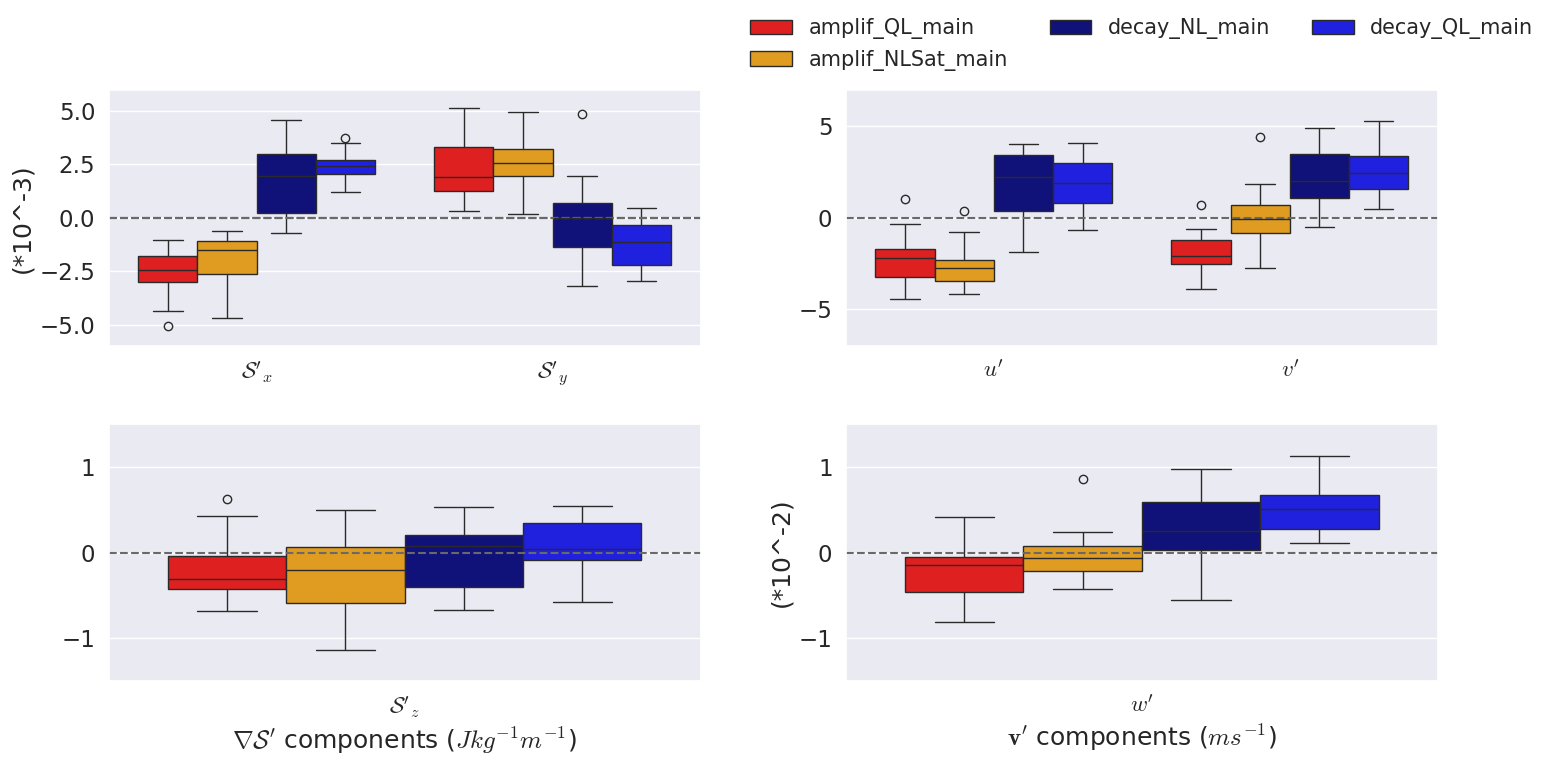

In [231]:
data1_melted = pd.melt(data1, id_vars=['regime_cls'], value_vars=[s for s in data1.columns if 'regime_cls' not in s])
data2_melted = pd.melt(data2, id_vars=['regime_cls'], value_vars=[s for s in data2.columns if 'regime_cls' not in s])
data3_melted = pd.melt(data3, id_vars=['regime_cls'], value_vars=[s for s in data3.columns if 'regime_cls' not in s])
data4_melted = pd.melt(data4, id_vars=['regime_cls'], value_vars=[s for s in data4.columns if 'regime_cls' not in s])

data1_melted['value'] = data1_melted['value']*10**3
data4_melted['value'] = data4_melted['value']*10**2

palette_dict_amplif_posbg = {
    'amplif_NL_main': 'darkred',
    'amplif_QL_main':'red', 
    'amplif_NLSat_main':'orange',
    'decay_QL_main':'blue',
#     'decay_NL_vs':'darkblue',
    'decay_NL_main':'darkblue',
}

sns.set(font_scale=1.5)
fig,ax = plt.subplots(2,2,figsize=(16,8))


sns.boxplot(data = data1_melted, x='variable', y='value', hue='regime_cls', ax=ax[0,0], 
            palette=palette_dict_amplif_posbg, legend=None)
sns.boxplot(data = data2_melted, x='variable', y='value', hue='regime_cls', ax=ax[0,1], 
            palette=palette_dict_amplif_posbg, )
sns.boxplot(data = data3_melted, x='variable', y='value', hue='regime_cls', ax=ax[1,0], 
            palette=palette_dict_amplif_posbg, legend=None)
sns.boxplot(data = data4_melted, x='variable', y='value', hue='regime_cls', ax=ax[1,1], 
            palette=palette_dict_amplif_posbg, legend=None)

sns.move_legend(
    ax[0,1], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    fontsize=15
)

# ax[0,0].set_ylim(-0.006, 0.006)
ax[0,0].set_ylim(-6, 6)
ax[0,0].axhline(-0.002, ls='--', lw=1.5, c='dimgray')
ax[0,0].axhline(0.002, ls='--', lw=1.5, c='dimgray')

ax[0,1].set_ylim(-7, 7)
ax[1,0].set_ylim(-1.5, 1.5)
# ax[1,1].set_ylim(-0.015, 0.015)
ax[1,1].set_ylim(-1.5, 1.5)

for i in range(2):
    for j in range(2):        
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')
        ax[i,j].axhline(0, ls='--', lw=1.5, c='dimgray')

ax[1,0].set_xlabel(r'$\mathbf{\nabla} \mathcal{S}^{\prime}$ components ($J kg^{-1} m^{-1}$)')
ax[1,1].set_xlabel('$\mathbf{v\'}$ components ($m s^{-1}$)')
 
ax[0,0].set_ylabel('(*10^-3)')    
ax[1,1].set_ylabel('(*10^-2)')

fig.align_ylabels()
plt.tight_layout()

## $S'_{Lag1}< 0$ Negative Background

5
5
5
5


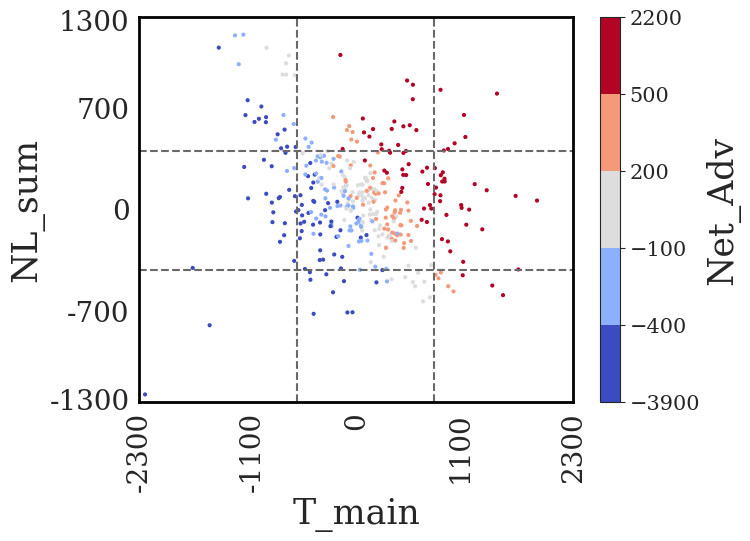

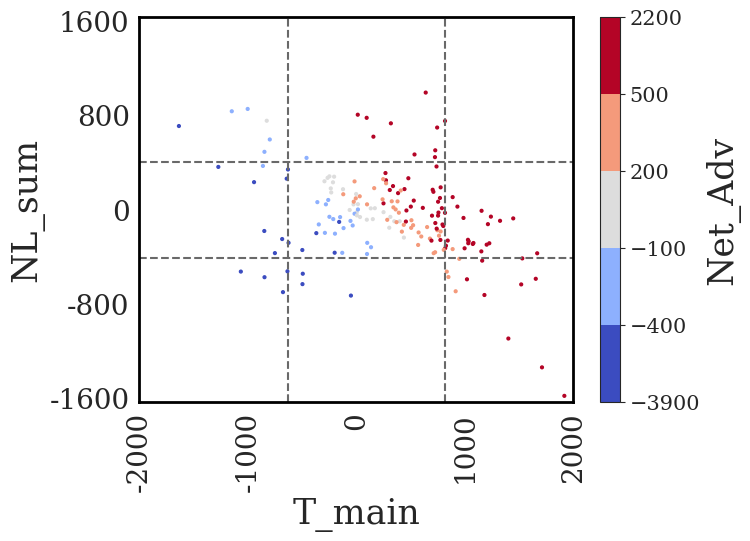

In [203]:
plot_tmain_nlsum(df = df_t2.loc[(df_t2.dse_anom_Lag1 < 0) & (df_t2[dy_s_anom] < 0)]) #& (df_t2.prim_cls.isin([4.2, 2.2]))])
plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plot_tmain_nlsum(df = df_t2.loc[(df_t2.dse_anom_Lag1 < 0) & (df_t2[dy_s_anom] > 0)])# & (df_t2.prim_cls.isin([4.2, 2.2]))])
plt.axhline(df_t2.NL_sum.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axhline(df_t2.NL_sum.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

plt.axvline(df_t2.T_main.quantile(0.1), ls='--',lw=1.5, c='dimgrey')
plt.axvline(df_t2.T_main.quantile(0.9), ls='--',lw=1.5, c='dimgrey')

## Growth of S'<0

In [398]:
conds_negbg_amplif_nlsat = (
    (df_t2['Net_Adv'] < 0) 
    & (df_t2['T_main'] < tmain_q1)
    & (df_t2['NL_sum'] > nl_q9)
)

# QL + NL growth

In [399]:
conds_negbg_amplif_full = (
    (df_t2['Net_Adv'] < net_q1) 
    & (df_t2['NL_sum'] < nl_q1) 
)

In [400]:
df_amplif_negbg2_full1 = df_t2.loc[base_conds_negbg2 & conds_negbg_amplif_full, col_set2].copy()
print(df_amplif_negbg2_full1.shape)

## u's', v's' both -ve
# df_amplif_negbg2_full1\
# .to_csv(dat_dir + 'Apr_negbg2_amplif_full_xyNL_v2.csv')

df_t2.loc[base_conds_negbg2 & conds_negbg_amplif_full, 'regime_cls'] = 'amplif_full'
df_t2.loc[base_conds_negbg2 & conds_negbg_amplif_full, 'combo_cls'] = 'amplif_full_xy'

# df_amplif_negbg2_full1['boxplot_ind'] = 'amplif_full'

(6, 26)


In [401]:
# df_amplif_negbg2_full1

In [402]:
df_amplif_negbg1_full2 = df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_full, col_set].copy()
print(df_amplif_negbg1_full2.shape)

## u's', v's' both -ve
df_amplif_negbg1_full2\
.to_csv(dat_dir + 'Apr_negbg1_amplif_full_xNL_v2.csv')

df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_full, 'regime_cls'] = 'amplif_full'
df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_full, 'combo_cls'] = 'amplif_full_x'

# df_amplif_negbg1_full2['boxplot_ind'] = 'amplif_full'

(9, 15)


In [403]:
# df_amplif_negbg1_full2

## QL growth

In [404]:
conds_negbg_amplif_ql = (
    (df_t2['Net_Adv'] < net_q1) 
    & (df_t2['NL_sum'].between(nl_q1, nl_q9)) 
)

In [405]:
df_t2.loc[base_conds_negbg & conds_negbg_amplif_ql, col_set2].shape

(28, 26)

In [406]:
df_amplif_negbg_ql = df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_ql, col_set2].copy()
print(df_amplif_negbg_ql.shape)

print(df_amplif_negbg_ql.loc[(df_amplif_negbg_ql[nl_us]<0) & (df_amplif_negbg_ql[nl_vs]>0)].shape)
print(df_amplif_negbg_ql.loc[(df_amplif_negbg_ql[nl_us]>0) & (df_amplif_negbg_ql[nl_vs]<0)].shape)
print(df_amplif_negbg_ql.loc[(df_amplif_negbg_ql[nl_us]>0) & (df_amplif_negbg_ql[nl_vs]>0)].shape)
print(df_amplif_negbg_ql.loc[(df_amplif_negbg_ql[nl_us]<0) & (df_amplif_negbg_ql[nl_vs]<0)].shape)

# df_amplif_negbg_ql.loc[(df_amplif_negbg_ql[nl_us]<0) & (df_amplif_negbg_ql[nl_vs]>0)]\
# .to_csv(dat_dir + 'Apr_negbg_amplif_ql_xy_v2.csv')

df_amplif_negbg_ql.loc[(df_amplif_negbg_ql[nl_us]<0) & (df_amplif_negbg_ql[nl_vs]>0), 'boxplot_ind'] = 'amplif_QL'

df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_ql, 'regime_cls'] = 'amplif_QL'
df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_ql & (df_t2[nl_us]<0) & (df_t2[nl_vs]>0), 'combo_cls'] = 'amplif_QL'


(23, 26)
(12, 26)
(4, 26)
(4, 26)
(3, 26)


In [407]:
df_amplif_negbg2_ql = df_t2.loc[base_conds_negbg2 & conds_negbg_amplif_ql, col_set].copy()
df_amplif_negbg2_ql

$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
1981-04-28            167.849966           -595.472589             80.476828   
1982-04-05             67.430766            238.376409             54.218300   
1997-04-02            268.595903           -392.500387            -61.317423   
1997-04-03            263.457698           -418.040072            -99.108621   
2008-04-04            218.496438           -512.283596            -79.569901   

            $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                     
1981-04-28            794.128055           -194.125999   
1982-04-05            971.379270          -1175.527216   
1997-04-02           1281.797775          -1215.956127   
1997-04-03            794.956144           -925.557163   
2008-04-04           1202.223991          -2000.779697   

            ${u̅}$$\mathcal{S}'_x$       T_main      NL_sum  x_contrib_NL  \
date                                                                        
1981-04-28            -1097.235095  -497.233039 -347.145795     19.892165   
1982-04-05            -1067.294924 -1271.442869  360.025475     18.729443   
1997-04-02             -913.616156  -847.774509 -185.221907     37.180344   
1997-04-03             -552.392002  -682.993022 -253.690995     33.750390   
2008-04-04               48.510606  -750.045100 -373.357059     26.963220   

            y_contrib_NL  z_contrib_NL      Net_Adv  $\mathcal{S}'_y$  \
date                                                                    
1981-04-28     70.570399      9.537436  -733.722430          0.001257   
1982-04-05     66.210984     15.059573 -1079.929536          0.000277   
1997-04-02     54.331802      8.487854  -867.449050          0.000876   
1997-04-03     53.553247     12.696363  -797.042000          0.000869   
2008-04-04     63.217577      9.819203 -1104.704663          0.001236   

               dse_anom  dse_anom_Lag1  
date                                    
1981-04-28 -2866.801492    -658.044825  
1982-04-05 -2126.169958    -857.859229  
1997-04-02 -6264.761029   -5293.050095  
1997-04-03 -7022.572919   -6264.761029  
2008-04-04 -4603.203700    -966.834237

## NL growth - not used in manu1

In [408]:
conds_negbg_amplif_nl = (
    (df_t2['Net_Adv'] < 0) 
    & (df_t2[T_main].between(tmain_q1, 0))
    & (df_t2['NL_sum'] < nl_q1) 
)


In [409]:
df_amplif_negbg_nl = df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_nl].copy()
print(df_amplif_negbg_nl.shape)
# df_amplif_negbg_nl # u's' is negative and dominant
# df_amplif_negbg_nl.to_csv(dat_dir + 'Apr_negbg_amplif_nl_xNL_v2.csv')

df_amplif_negbg_nl.loc[:,'boxplot_ind'] = 'amplif_NL'
# df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_nl, 'regime_cls'] = 'amplif_NL'


(8, 67)


## NL saturated growth

In [410]:
df_t2.loc[base_conds_negbg & conds_negbg_amplif_nlsat, col_set2].shape

(27, 26)

In [411]:
df_amplif_negbg_nlsat = df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_nlsat, col_set2].copy() 
# negative BG conditions, northern half hotter
print(df_amplif_negbg_nlsat.shape)
print(df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_vs]>0) & conds2_y_dom(df_amplif_negbg_nlsat, dom_fact=1)].shape)
print(df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_us]>0) & conds2_x_dom(df_amplif_negbg_nlsat, dom_fact=1)].shape)
print(df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_ws]>0) & conds2_z_dom(df_amplif_negbg_nlsat, dom_fact=1)].shape)

# df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_vs]>0) & conds2_y_dom(df_amplif_negbg_nlsat, dom_fact=1)]\
# .to_csv(dat_dir + 'Apr_negbg_amplif_nlsat_yNL_v2.csv')

# df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_vs]>0) & conds2_y_dom(df_amplif_negbg_nlsat, dom_fact=1), 
#                          'boxplot_ind'] = 'amplif_NLSat'

df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_nlsat, 'regime_cls'] = 'amplif_NLSat'

df_t2.loc[base_conds_negbg1 & conds_negbg_amplif_nlsat & (df_t2[nl_vs]>0) & conds2_y_dom(df_t2, dom_fact=1), 
          'combo_cls'] = 'amplif_NLSat_y'


(21, 26)
(13, 26)
(3, 26)
(5, 26)


In [412]:
# df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_vs]>0) & conds2_y_dom(df_amplif_negbg_nlsat, dom_fact=1)]\
# .sort_values(nl_vs)

In [413]:
df_amplif_negbg_nlsat = df_t2.loc[base_conds_negbg2 & conds_negbg_amplif_nlsat, col_set2].copy() 
# negative BG conditions, northern half hotter
print(df_amplif_negbg_nlsat.shape)
print(df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_us]>0) & conds2_x_dom(df_amplif_negbg_nlsat, dom_fact=1)].shape)
print(df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_vs]>0) & conds2_y_dom(df_amplif_negbg_nlsat, dom_fact=1)].shape)
print(df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_ws]>0) & conds2_z_dom(df_amplif_negbg_nlsat, dom_fact=1)].shape)

# df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_vs]>0) & conds2_y_dom(df_amplif_negbg_nlsat, dom_fact=1)]\
# .to_csv(dat_dir + 'Apr_negbg_amplif_nlsat_yNL_v2.csv')

# df_amplif_negbg_nlsat.loc[(df_amplif_negbg_nlsat[nl_vs]>0) & conds2_y_dom(df_amplif_negbg_nlsat, dom_fact=1), 
#                          'boxplot_ind'] = 'amplif_NLSat'

df_t2.loc[base_conds_negbg2 & conds_negbg_amplif_nlsat, 'regime_cls'] = 'amplif_NLSat'

df_t2.loc[base_conds_negbg2 & conds_negbg_amplif_nlsat & 
          (df_t2[nl_us]>0) & conds2_x_dom(df_t2, dom_fact=1), 'combo_cls'] = 'amplif_NLSat_x'

(6, 26)
(5, 26)
(0, 26)
(1, 26)


In [414]:
df_t2.loc[base_conds_negbg2 & conds_negbg_amplif_nlsat, col_set]

$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
1985-04-01           1546.171938          -1216.593320            158.904239   
2002-04-08            716.645743           -104.492539            140.828438   
2006-04-17            187.772232            152.915420            252.847947   
2013-04-02            496.332890             52.606375            284.620162   
2013-04-03            514.819043            144.250033            194.275775   
2013-04-09            634.161100            -50.160329            123.922477   

            $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                     
1985-04-01           2644.615683          -1394.339527   
2002-04-08            937.338484           -478.761920   
2006-04-17            -55.378020           -415.566799   
2013-04-02           1033.388656          -1214.933510   
2013-04-03            545.285891           -624.719339   
2013-04-09           2585.792853          -1285.027671   

            ${u̅}$$\mathcal{S}'_x$       T_main      NL_sum  x_contrib_NL  \
date                                                                        
1985-04-01            -2096.736078  -846.459922  488.482857     52.920837   
2002-04-08            -1283.779484  -825.202920  752.981641     74.497977   
2006-04-17             -326.261855  -797.206675  593.535599     31.636221   
2013-04-02             -965.891148 -1147.436002  833.559427     59.543792   
2013-04-03             -921.486571 -1000.920019  853.344851     60.329542   
2013-04-09            -2935.503304 -1634.738122  707.923248     78.461600   

            y_contrib_NL  z_contrib_NL      Net_Adv  $\mathcal{S}'_y$  \
date                                                                    
1985-04-01     41.640347      5.438816  -165.951701          0.002270   
2002-04-08     10.862386     14.639637   -40.905087          0.000616   
2006-04-17     25.763479     42.600300  -376.845999          0.000187   
2013-04-02      6.311053     34.145155  -399.315151          0.000978   
2013-04-03     16.904073     22.766385  -232.291855          0.000639   
2013-04-09      6.206088     15.332312 -1073.163674          0.000545   

               dse_anom  dse_anom_Lag1  
date                                    
1985-04-01 -1334.206258    -833.989220  
2002-04-08 -1987.786397    -997.730171  
2006-04-17 -3972.969923   -2602.588936  
2013-04-02 -1981.088713    -554.510619  
2013-04-03 -2789.971337   -1981.088713  
2013-04-09 -2052.119116     -90.073709

## Decay of S'<0

## NL sat decay

In [415]:
conds_negbg_decay_nlsat = (
#     (df_t2['Net_Adv'] > net_q9) 
    (df_t2['T_main'] > tmain_q9)
    & (df_t2['NL_sum'] < nl_q1)
)


In [416]:
df_t2.loc[base_conds_negbg & conds_negbg_decay_nlsat, col_set2].shape

(21, 26)

In [417]:
df_decay_negbg2_nlsat = df_t2.loc[base_conds_negbg2 & conds_negbg_decay_nlsat, col_set2].copy()
print(df_decay_negbg2_nlsat.shape)
# df_decay_negbg2_nlsat.to_csv(dat_dir + 'Apr_negbg2_decay_nlsat_xNL_v2.csv')

df_decay_negbg2_nlsat.loc[:,'boxplot_ind'] = 'decay_NLSat'

## clearly u's' is not allowing the decay of -ve s' conditions 
df_t2.loc[base_conds_negbg2 & conds_negbg_decay_nlsat, 'regime_cls'] = 'decay_NLSat'
df_t2.loc[base_conds_negbg2 & conds_negbg_decay_nlsat, 'combo_cls'] = 'decay_NLSat_x'



(13, 26)


In [418]:
df_decay_negbg2_nlsat

$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
1984-04-23          -1473.318512             73.724916            807.667580   
1984-04-24          -1466.912017            333.525882            493.519555   
1987-04-16           -375.079637            155.547568           -218.023521   
1987-04-26           -589.728252           -126.884187            139.629013   
1990-04-05           -847.567937             -6.071186            155.427295   
2011-04-04           -137.672895             98.448450           -382.848466   
2011-04-22           -866.879057            184.137909            -47.197761   
2011-04-23           -954.656507            344.878345             13.489536   
2015-04-13          -2816.440062           1257.045964            459.145868   
2015-04-14          -3729.448162           1475.538312            665.862800   
2015-04-15          -3032.521231           1091.350912            595.569881   
2015-04-16          -2039.971808            987.668837            633.802143   
2021-04-11           -363.684471             85.523540           -252.850151   

            $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                     
1984-04-23           -943.506254           1172.039816   
1984-04-24           -648.952131            865.399094   
1987-04-16           -859.479058            979.607549   
1987-04-26           -611.289237            160.480331   
1990-04-05              1.049769           -875.810652   
2011-04-04           -677.911176           1203.839814   
2011-04-22           -428.419873            517.617156   
2011-04-23           -517.271508            352.367650   
2015-04-13          -1034.172071            558.990804   
2015-04-14          -1080.253019            828.885342   
2015-04-15           -905.632618            724.394861   
2015-04-16          -1228.851299            843.999266   
2021-04-11            -32.415324            368.664722   

            ${u̅}$$\mathcal{S}'_x$       T_main       NL_sum  x_contrib_NL  \
date                                                                         
1984-04-23             1425.740164  1654.273726  -591.926015     62.568974   
1984-04-24             1303.548950  1519.995913  -639.866580     63.946784   
1987-04-16             1040.263870  1160.392360  -437.555590     50.100751   
1987-04-26             1300.104222   849.295317  -576.983425     68.874060   
1990-04-05             1790.719104   915.958222  -698.211828     83.995258   
2011-04-04              423.359078   949.287716  -422.072910     22.242263   
2011-04-22             1091.919787  1181.117069  -729.938909     78.935297   
2011-04-23             1185.124336  1020.220478  -596.288627     72.706685   
2015-04-13             1876.851373  1401.670106 -1100.248230     62.136969   
2015-04-14             2169.049950  1917.682272 -1588.047050     63.524849   
2015-04-15             1892.841490  1711.603733 -1345.600439     64.255927   
2015-04-16             1914.985087  1530.133055  -418.500828     55.714972   
2021-04-11              497.810704   834.060102  -531.011082     51.802613   

            y_contrib_NL  ...      $w'$  $\mathcal{S}'_x$  $\mathcal{S}'_z$  \
date                      ...                                                 
1984-04-23      3.130954  ... -0.008024         -0.003222          0.686742   
1984-04-24     14.539323  ... -0.006274         -0.003163          0.529747   
1987-04-16     20.777054  ... -0.006291         -0.002366         -0.498223   
1987-04-26     14.818739  ... -0.000561         -0.002732         -0.007604   
1990-04-05      0.601664  ...  0.004914         -0.003345          0.128985   
2011-04-04     15.905210  ... -0.006387         -0.000791         -0.756055   
2011-04-22     16.767022  ... -0.003190         -0.002366         -0.675122   
2011-04-23     26.265951  ... -0.002212         -0.002652 

In [419]:
df_decay_negbg1_nlsat = df_t2.loc[base_conds_negbg1 & conds_negbg_decay_nlsat, col_set].copy()
print(df_decay_negbg1_nlsat.shape)
df_decay_negbg1_nlsat.sort_values('y_contrib_NL')

# df_decay_negbg1_nlsat.to_csv(dat_dir + 'Apr_negbg1_decay_nlsat_xNL_v2.csv')

# df_decay_negbg1_nlsat.loc[:,'boxplot_ind'] = 'decay_NLSat'

## clearly u's' is not allowing the decay of -ve s' conditions 
df_t2.loc[base_conds_negbg1 & conds_negbg_decay_nlsat, 'regime_cls'] = 'decay_NLSat'


(8, 15)


In [420]:
df_decay_negbg2_nlsat

$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
1984-04-23          -1473.318512             73.724916            807.667580   
1984-04-24          -1466.912017            333.525882            493.519555   
1987-04-16           -375.079637            155.547568           -218.023521   
1987-04-26           -589.728252           -126.884187            139.629013   
1990-04-05           -847.567937             -6.071186            155.427295   
2011-04-04           -137.672895             98.448450           -382.848466   
2011-04-22           -866.879057            184.137909            -47.197761   
2011-04-23           -954.656507            344.878345             13.489536   
2015-04-13          -2816.440062           1257.045964            459.145868   
2015-04-14          -3729.448162           1475.538312            665.862800   
2015-04-15          -3032.521231           1091.350912            595.569881   
2015-04-16          -2039.971808            987.668837            633.802143   
2021-04-11           -363.684471             85.523540           -252.850151   

            $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                     
1984-04-23           -943.506254           1172.039816   
1984-04-24           -648.952131            865.399094   
1987-04-16           -859.479058            979.607549   
1987-04-26           -611.289237            160.480331   
1990-04-05              1.049769           -875.810652   
2011-04-04           -677.911176           1203.839814   
2011-04-22           -428.419873            517.617156   
2011-04-23           -517.271508            352.367650   
2015-04-13          -1034.172071            558.990804   
2015-04-14          -1080.253019            828.885342   
2015-04-15           -905.632618            724.394861   
2015-04-16          -1228.851299            843.999266   
2021-04-11            -32.415324            368.664722   

            ${u̅}$$\mathcal{S}'_x$       T_main       NL_sum  x_contrib_NL  \
date                                                                         
1984-04-23             1425.740164  1654.273726  -591.926015     62.568974   
1984-04-24             1303.548950  1519.995913  -639.866580     63.946784   
1987-04-16             1040.263870  1160.392360  -437.555590     50.100751   
1987-04-26             1300.104222   849.295317  -576.983425     68.874060   
1990-04-05             1790.719104   915.958222  -698.211828     83.995258   
2011-04-04              423.359078   949.287716  -422.072910     22.242263   
2011-04-22             1091.919787  1181.117069  -729.938909     78.935297   
2011-04-23             1185.124336  1020.220478  -596.288627     72.706685   
2015-04-13             1876.851373  1401.670106 -1100.248230     62.136969   
2015-04-14             2169.049950  1917.682272 -1588.047050     63.524849   
2015-04-15             1892.841490  1711.603733 -1345.600439     64.255927   
2015-04-16             1914.985087  1530.133055  -418.500828     55.714972   
2021-04-11              497.810704   834.060102  -531.011082     51.802613   

            y_contrib_NL  ...      $w'$  $\mathcal{S}'_x$  $\mathcal{S}'_z$  \
date                      ...                                                 
1984-04-23      3.130954  ... -0.008024         -0.003222          0.686742   
1984-04-24     14.539323  ... -0.006274         -0.003163          0.529747   
1987-04-16     20.777054  ... -0.006291         -0.002366         -0.498223   
1987-04-26     14.818739  ... -0.000561         -0.002732         -0.007604   
1990-04-05      0.601664  ...  0.004914         -0.003345          0.128985   
2011-04-04     15.905210  ... -0.006387         -0.000791         -0.756055   
2011-04-22     16.767022  ... -0.003190         -0.002366         -0.675122   
2011-04-23     26.265951  ... -0.002212         -0.002652 

## QL+ NL Decay

In [421]:
conds_negbg_decay_full = (
    (df_t2['Net_Adv'] > net_q9) 
    & (df_t2['T_main']> tmain_q9)
    & (df_t2['NL_sum'] > nl_q9)
)

In [422]:
df_t2.loc[base_conds_negbg & conds_negbg_decay_full, col_set2].shape

(7, 26)

In [423]:
df_decay_full = df_t2.loc[base_conds_negbg1 & conds_negbg_decay_full, col_set2].copy()
print(df_decay_full.shape)
# df_decay_full # w's' is the undisputed dominating term
# df_decay_full.to_csv(dat_dir + 'Apr_negbg_decay_full_yzNL_v2.csv')

df_t2.loc[base_conds_negbg1 & conds_negbg_decay_full, 'regime_cls'] = 'decay_full'
df_t2.loc[base_conds_negbg1 & conds_negbg_decay_full, 'combo_cls'] = 'decay_full'


(7, 26)


In [424]:
df_decay_full

$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
1982-04-07            -61.207418           -329.271894            804.154634   
1982-04-08            -25.425647           -540.059015           1061.783123   
1983-04-20           -130.575012           -502.747016           1427.832381   
1983-04-21            -80.708846           -292.763529           1021.205526   
1991-04-19           -244.951042           -169.529059            818.220515   
2001-04-21            124.640917           -203.385402            899.233607   
2019-04-18            -88.931861           -258.409223            800.308678   

            $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                     
1982-04-07           -777.815557            491.049707   
1982-04-08          -1497.528052           1194.216588   
1983-04-20           -806.002497           1734.825563   
1983-04-21           -944.077973           1432.427605   
1991-04-19          -1073.948105           1239.289850   
2001-04-21          -1018.672412           1527.745087   
2019-04-18           -326.634614            645.416564   

            ${u̅}$$\mathcal{S}'_x$       T_main      NL_sum  x_contrib_NL  \
date                                                                        
1982-04-07             1258.783915   972.018066  413.675322      5.123529   
1982-04-08             1459.628792  1156.317328  496.298461      1.562475   
1983-04-20              562.582387  1491.405454  794.510352      6.335043   
1983-04-21              652.986982  1141.336613  647.733151      5.786917   
1991-04-19              762.070691   927.412437  403.740415     19.871089   
2001-04-21              383.967785   893.040461  820.489122     10.156032   
2019-04-18              723.591066  1042.373017  452.967594      7.749042   

            y_contrib_NL  ...      $v'$      $w'$  $\mathcal{S}'_x$  \
date                      ...                                         
1982-04-07     27.562576  ... -1.635398 -0.002737         -0.002215   
1982-04-08     33.188085  ... -3.629216 -0.007620         -0.002812   
1983-04-20     24.391526  ... -3.221289 -0.011116         -0.001344   
1983-04-21     20.991480  ... -3.647424 -0.009543         -0.001976   
1991-04-19     13.752655  ... -3.735009 -0.008189         -0.001824   
2001-04-21     16.572317  ... -3.580859 -0.010257         -0.001370   
2019-04-18     22.516384  ... -1.304511 -0.004249         -0.001430   

            $\mathcal{S}'_z$    ${u̅}$    ${v̅}$    ${w̅}$  $\mathcal{S}̅_x$  \
date                                                                           
1982-04-07          0.445095  6.573328 -0.568847 -0.000725          0.000124   
1982-04-08          1.055572  6.418075 -0.537822 -0.000692          0.000123   
1983-04-20          1.197808  5.392123 -0.689414 -0.000156         -0.000170   
1983-04-21          0.863198  5.275219 -0.715049 -0.000220         -0.000315   
1991-04-19          0.841972  5.436229 -0.684181 -0.000111         -0.000120   
2001-04-21          0.760955  5.274500 -0.714627 -0.000219         -0.000315   
2019-04-18          1.432105  5.515401 -0.679461 -0.000068         -0.000048   

            $\mathcal{S}̅_y$  $\mathcal{S}̅_z$  
date                                            
1982-04-07         -0.004863          2.012746  
1982-04-08         -0.004748          1.982542  
1983-04-20         -0.003410          1.826553  
1983-04-21         -0.003212          1.781085  
1991-04-19         -0.003479          1.809457  
2001-04-21         -0.003212          1.781656  
2019-04-18         -0.003582          1.848091  

[7 rows x 26 columns]

## QL Decay

In [425]:

conds_negbg_decay_ql = (
    (df_t2['Net_Adv'] > net_q9)
    & (df_t2['T_main']> tmain_q9) # this was addedon 9/10/25
    & (df_t2['NL_sum'].between(nl_q1, nl_q9)) 

)

In [426]:
df_t2.loc[base_conds_negbg & conds_negbg_decay_ql, col_set2].shape

(34, 26)

In [427]:
df_decay_negbg1_ql = df_t2.loc[base_conds_negbg1 & conds_negbg_decay_ql, col_set2].copy()
print(df_decay_negbg1_ql.shape)

print(df_decay_negbg1_ql.loc[(df_decay_negbg1_ql[nl_us]<0) & (df_decay_negbg1_ql[nl_vs]<0)].shape)
print(df_decay_negbg1_ql.loc[(df_decay_negbg1_ql[nl_us]>0) & (df_decay_negbg1_ql[nl_vs]<0)].shape)

print(df_decay_negbg1_ql.loc[(df_decay_negbg1_ql[nl_us]<0) & (df_decay_negbg1_ql[nl_vs]>0)].shape)
print(df_decay_negbg1_ql.loc[(df_decay_negbg1_ql[nl_us]>0) & (df_decay_negbg1_ql[nl_vs]>0)].shape)

df_decay_negbg1_ql.loc[(df_decay_negbg1_ql[nl_us]<0) & (df_decay_negbg1_ql[nl_vs]<0)].sort_values(nl_vs)\
.to_csv(dat_dir + 'Apr_negbg1_decay_ql_xy_z_v2.csv')

# Apr_negbg_decay_ql_xy_z_v2
# Apr_negbg1_amplif_full_xNL_v2

df_decay_negbg1_ql.loc[(df_decay_negbg1_ql[nl_us]<0) & (df_decay_negbg1_ql[nl_vs]<0), 'boxplot_ind'] = 'decay_QL1'

# df_decay_negbg1_ql.loc[(df_decay_negbg1_ql[nl_us]>0) & (df_decay_negbg1_ql[nl_vs]<0)].sort_values(nl_vs)\
# .to_csv(dat_dir + 'Apr_negbg_decay_ql_xy_v2.csv')

df_t2.loc[base_conds_negbg1 & conds_negbg_decay_ql, 'regime_cls'] = 'decay_QL'
df_t2.loc[base_conds_negbg1 & conds_negbg_decay_ql & (df_t2[nl_us]>0) & (df_t2[nl_vs]<0), 'combo_cls'] = 'decay_QL_xy'
df_t2.loc[base_conds_negbg1 & conds_negbg_decay_ql & (df_t2[nl_us]<0) & (df_t2[nl_vs]<0), 'combo_cls'] = 'decay_QL_xy_z'


(21, 26)
(12, 26)
(7, 26)
(1, 26)
(1, 26)


In [428]:
dat_dir

'/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/'

In [429]:
df_decay_negbg1_ql.loc[(df_decay_negbg1_ql[nl_us]<0) & (df_decay_negbg1_ql[nl_vs]<0)].sort_values(nl_vs)

$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
2005-04-11            -96.425665          -1009.601528           1115.412300   
2017-04-10             -9.599508           -789.771107            661.165032   
1996-04-01            -26.996700           -537.482792            358.817749   
1985-04-15           -131.955725           -315.528414            476.242049   
2015-04-09           -138.245701           -213.937460            500.898127   
2015-04-08           -247.938869           -208.298206            453.338376   
1995-04-03           -306.824768           -185.624716             78.615305   
2012-04-15            -47.472987           -170.343844            451.570770   
2019-04-20           -303.352203           -154.093977            710.992829   
1995-04-04            -92.608208            -96.687503            248.752876   
1997-04-05           -185.676940            -94.933784            174.185398   
2004-04-24           -401.066580            -54.708744             94.414313   

            $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                     
2005-04-11           -987.032781           1788.309772   
2017-04-10          -2055.957065           2481.480170   
1996-04-01          -1644.374785           1548.702119   
1985-04-15           -873.448083            810.633671   
2015-04-09           -470.409099            893.632310   
2015-04-08           -378.232825            671.636329   
1995-04-03           -921.870648           1618.115396   
2012-04-15            -85.141900            534.497219   
2019-04-20           -666.795206            743.883263   
1995-04-04          -1285.865216            991.895908   
1997-04-05           -761.648872            348.593153   
2004-04-24           -707.052560           -183.081298   

            ${u̅}$$\mathcal{S}'_x$       T_main      NL_sum  x_contrib_NL  \
date                                                                        
2005-04-11              315.380706  1116.657697    9.385106      4.340684   
2017-04-10              909.831497  1335.354602 -138.205583      0.657259   
1996-04-01             1003.706916   908.034251 -205.661743      2.923945   
1985-04-15             1174.462182  1111.647771   28.757910     14.285156   
2015-04-09              421.535547   844.758758  148.714966     16.205455   
2015-04-08              903.307386  1196.710890   -2.898698     27.258747   
1995-04-03             1021.780481  1718.025229 -413.834179     53.728539   
2012-04-15              446.712151   896.067469  233.753939      7.092003   
2019-04-20              840.232774   917.320831  253.546649     25.962177   
1995-04-04             2209.660546  1915.691238   59.457164     21.141081   
1997-04-05             1579.185418  1166.129698 -106.425325     40.826412   
2004-04-24             2023.356131  1133.222273 -361.361010     72.896062   

            y_contrib_NL  ...      $w'$  $\mathcal{S}'_x$  $\mathcal{S}'_z$  \
date                      ...                                                 
2005-04-11     45.448077  ... -0.010923         -0.000524          0.951030   
2017-04-10     54.074073  ... -0.014860         -0.002120          0.400397   
1996-04-01     58.213408  ... -0.008030         -0.002032          0.234324   
1985-04-15     34.158219  ... -0.004799         -0.002555          0.487382   
2015-04-09     25.078203  ... -0.005959         -0.000945          0.647490   
2015-04-08     22.900597  ... -0.004426         -0.001627          0.639320   
1995-04-03     32.505019  ... -0.008494         -0.001593         -0.180789   
2012-04-15     25.447714  ... -0.003859         -0.000875          0.904932   
2019-04-20     13.188021  ... -0.004996         -0.001934          1.003224   
1995-04-04     22.072324  ... -0.005192         -0.003682          0.187970   
1997-04-05     20.873921  ... -0.001727         -0.

In [430]:
df_decay_negbg2_ql = df_t2.loc[base_conds_negbg2 & conds_negbg_decay_ql, col_set2].copy()
print(df_decay_negbg2_ql.shape)

print(df_decay_negbg2_ql.loc[(df_decay_negbg2_ql[nl_us]<0) & (df_decay_negbg2_ql[nl_vs]>0)].shape)
print(df_decay_negbg2_ql.loc[(df_decay_negbg2_ql[nl_us]<0) & (df_decay_negbg2_ql[nl_vs]<0)].shape)

print(df_decay_negbg2_ql.loc[(df_decay_negbg2_ql[nl_us]>0) & (df_decay_negbg2_ql[nl_vs]<0)].shape)
print(df_decay_negbg2_ql.loc[(df_decay_negbg2_ql[nl_us]>0) & (df_decay_negbg2_ql[nl_vs]>0)].shape)

df_decay_negbg2_ql.loc[(df_decay_negbg2_ql[nl_us]<0) & (df_decay_negbg2_ql[nl_vs]>0)]\
.to_csv(dat_dir + 'Apr_negbg2_decay_ql_xy_v2.csv')

df_decay_negbg2_ql.loc[(df_decay_negbg2_ql[nl_us]<0) & (df_decay_negbg2_ql[nl_vs]>0), 'boxplot_ind'] = 'decay_QL2'

df_t2.loc[base_conds_negbg2 & conds_negbg_decay_ql & (df_t2[nl_us]<0) & (df_t2[nl_vs]>0), 'regime_cls'] = 'decay_QL'



(13, 26)
(11, 26)
(2, 26)
(0, 26)
(0, 26)


In [431]:
df_decay_negbg2_ql.loc[(df_decay_negbg2_ql[nl_us]<0) & (df_decay_negbg2_ql[nl_vs]>0), col_set]

$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
1984-04-10           -686.024987            403.501083            -19.105993   
1984-04-11           -761.410354            743.910006            -81.062730   
1994-04-28           -843.094921            617.708036            -47.343859   
2001-04-01           -656.868102            229.677534             68.401585   
2001-04-02           -655.364760            369.821090             -4.115898   
2001-04-06           -917.292684            448.351776            181.522661   
2002-04-10           -151.972675            232.657557            -93.957006   
2002-04-11           -596.059890            248.521848            -27.408326   
2003-04-07           -241.275412            362.213445            -17.967293   
2008-04-06           -277.971363             98.965971            100.910540   
2008-04-07           -388.888728             36.030511            289.828247   

            $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                     
1984-04-10          -1211.091257           1181.726238   
1984-04-11          -1196.022184           1154.308560   
1994-04-28           -393.778350            229.173041   
2001-04-01          -1566.311888           1186.768113   
2001-04-02          -1102.255332            897.383982   
2001-04-06           -950.663153            706.114789   
2002-04-10           -698.545981            858.920399   
2002-04-11           -804.546477            688.012572   
2003-04-07           -832.358151           1459.548547   
2008-04-06             26.719547            320.506941   
2008-04-07           -143.207311            787.462664   

            ${u̅}$$\mathcal{S}'_x$       T_main      NL_sum  x_contrib_NL  \
date                                                                        
1984-04-10             1231.187405  1201.822385 -301.629897     61.880313   
1984-04-11             1366.703997  1324.990373  -98.563078     47.996626   
1994-04-28             1200.360357  1035.755048 -272.730744     55.902709   
2001-04-01             1532.204186  1152.660411 -358.788982     68.785802   
2001-04-02             1430.922223  1226.050872 -289.659569     63.670810   
2001-04-06             1324.441912  1079.893548 -287.418247     59.288533   
2002-04-10              994.359270  1154.733688  -13.272124     31.754435   
2002-04-11             1783.859308  1667.325403 -374.946368     68.356271   
2003-04-07              261.186657   888.377054  102.970740     38.824205   
2008-04-06             1099.303984  1446.530473  -78.094852     58.171518   
2008-04-07              596.540013  1240.795367  -63.029970     54.409247   

            y_contrib_NL  z_contrib_NL      Net_Adv  $\mathcal{S}'_y$  \
date                                                                    
1984-04-10     36.396303      1.723384   990.587431          0.001524   
1984-04-11     46.893465      5.109909  1327.040040          0.002699   
1994-04-28     40.958084      3.139208   826.052951          0.002899   
2001-04-01     24.051333      7.162866  1032.059781          0.000713   
2001-04-02     35.929317      0.399873  1110.373346          0.001822   
2001-04-06     28.978885     11.732583   879.971796          0.002837   
2002-04-10     48.613406     19.632159   986.240770          0.001639   
2002-04-11     28.500537      3.143192  1121.640031          0.002526   
2003-04-07     58.284634      2.891160  1258.570957          0.002985   
2008-04-06     20.710769     21.117712  1405.587462          0.000012   
2008-04-07      5.041013     40.549740  1325.866195          0.000990   

               dse_anom  dse_anom_Lag1  
date                                    
1984-04-10 -1636.971319   -3134.691454  
1984-04-11  -350.557506   -1636.971319  
1994-04-28   504.901045    -134.688715  
2001-04-01 -2407.770791   -3650.498128  
2001-04-02  -920.1

In [432]:
df_decay_negbg2_ql.loc[(df_decay_negbg2_ql[nl_us]<0) & (df_decay_negbg2_ql[nl_vs]<0)]


$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
1985-04-16            -21.281735           -219.068925            262.651439   
2006-04-19           -193.528293            -94.204117            160.646343   

            $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                     
1985-04-16           -365.618830            523.576526   
2006-04-19           -364.775467           -508.047592   

            ${u̅}$$\mathcal{S}'_x$       T_main      NL_sum  x_contrib_NL  \
date                                                                        
1985-04-16              774.159410   932.117107   22.300779      4.230944   
2006-04-19             2086.045756  1213.222698 -127.086067     43.161789   

            y_contrib_NL  ...      $w'$  $\mathcal{S}'_x$  $\mathcal{S}'_z$  \
date                      ...                                                 
1985-04-16     43.552288  ... -0.003262         -0.001758          0.333173   
2006-04-19     21.009942  ...  0.004022         -0.004492         -0.183944   

              ${u̅}$    ${v̅}$    ${w̅}$  $\mathcal{S}̅_x$  $\mathcal{S}̅_y$  \
date                                                                           
1985-04-16  5.582493 -0.643689 -0.000131         -0.000003         -0.003740   
2006-04-19  5.435973 -0.684050 -0.000111         -0.000120         -0.003479   

            $\mathcal{S}̅_z$  boxplot_ind  
date                                       
1985-04-16          1.839494          NaN  
2006-04-19          1.814816          NaN  

[2 rows x 27 columns]

## NL decay - not used in manu1

In [433]:
conds_negbg_decay_nl = (
    (df_t2['Net_Adv'] > net_q9) 
    & (df_t2['T_main'].between(tmain_q1, tmain_q9))
    & (df_t2['NL_sum'] > nl_q9)
)


In [434]:
df_decay_negbg1_nl = df_t2.loc[base_conds_negbg1 & conds_negbg_decay_nl, col_set2].sort_values('y_contrib_NL').copy()
print(df_decay_negbg1_nl.shape)
print(df_decay_negbg1_nl.loc[(df_decay_negbg1_nl[nl_us]>0) & (df_decay_negbg1_nl[nl_vs]<0)].shape)
print(df_decay_negbg1_nl.loc[(df_decay_negbg1_nl[nl_us]<0) & (df_decay_negbg1_nl[nl_vs]>0)].shape)
print(df_decay_negbg1_nl.loc[(df_decay_negbg1_nl[nl_us]<0) & (df_decay_negbg1_nl[nl_vs]<0)].shape)
print(df_decay_negbg1_nl.loc[(df_decay_negbg1_nl[nl_us]>0) & (df_decay_negbg1_nl[nl_vs]>0)].shape)

# df_decay_negbg1_nl.loc[(df_decay_negbg1_nl[nl_us]>0) & (df_decay_negbg1_nl[nl_vs]>0)] -- don't see any apparent patterns

(8, 26)
(2, 26)
(0, 26)
(3, 26)
(3, 26)


In [435]:
df_decay_negbg2_nl = df_t2.loc[base_conds_negbg2 & conds_negbg_decay_nl, col_set2].sort_values('y_contrib_NL').copy()
print(df_decay_negbg2_nl.shape)
print(df_decay_negbg2_nl.loc[(df_decay_negbg2_nl[nl_us]>0) & (df_decay_negbg2_nl[nl_vs]<0)].shape)
print(df_decay_negbg2_nl.loc[(df_decay_negbg2_nl[nl_us]<0) & (df_decay_negbg2_nl[nl_vs]>0)].shape)
print(df_decay_negbg2_nl.loc[(df_decay_negbg2_nl[nl_us]<0) & (df_decay_negbg2_nl[nl_vs]<0)].shape)
print(df_decay_negbg2_nl.loc[(df_decay_negbg2_nl[nl_us]>0) & (df_decay_negbg2_nl[nl_vs]>0)].shape)

# df_decay_negbg2_nl.loc[(df_decay_negbg2_nl[nl_us]>0) & (df_decay_negbg2_nl[nl_vs]>0)]\
# .to_csv(dat_dir + 'Apr_negbg2_decay_nl_xyz_v2.csv')

df_t2.loc[base_conds_negbg2 & conds_negbg_decay_nl & (df_t2[nl_us]>0) & (df_t2[nl_vs]>0), 'regime_cls'] = 'decay_NL'


(10, 26)
(1, 26)
(2, 26)
(1, 26)
(6, 26)


In [436]:
df_decay_negbg2_nl.loc[(df_decay_negbg2_nl[nl_us]>0) & (df_decay_negbg2_nl[nl_vs]>0)]

$u'$$\mathcal{S}'_x$  $v'$$\mathcal{S}'_y$  $w'$$\mathcal{S}'_z$  \
date                                                                           
2001-04-22            217.973882            118.660461            358.420288   
1993-04-17             13.142725            211.840599            552.850641   
2016-04-13            120.033693            282.516629            590.089919   
1996-04-24            365.603086            286.574725             98.865688   
2000-04-23            375.602321            394.370034             34.304156   
1993-04-18            114.653357            307.089318            195.548451   

            $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
date                                                     
2001-04-22           -873.547143           1289.794667   
1993-04-17           -676.385966           1286.162537   
2016-04-13          -1111.634495           1668.666154   
1996-04-24          -1173.561963            283.340901   
2000-04-23           -559.329004           -681.026118   
1993-04-18           -688.616346            917.973300   

            ${u̅}$$\mathcal{S}'_x$      T_main      NL_sum  x_contrib_NL  \
date                                                                       
2001-04-22              329.164892  745.412416  695.054631     31.360683   
1993-04-17             -513.942295   95.834276  777.833964      1.689657   
2016-04-13               82.883823  639.915483  992.640241     12.092366   
1996-04-24             1708.116799  817.895737  751.043499     48.679349   
2000-04-23             1254.059557   13.704435  804.276511     46.700645   
1993-04-18              -71.446627  157.910327  617.291125     18.573628   

            y_contrib_NL  ...      $v'$      $w'$  $\mathcal{S}'_x$  \
date                      ...                                         
2001-04-22     17.072106  ... -3.003071 -0.008408         -0.001243   
1993-04-17     27.234681  ... -2.145498 -0.008815          0.000771   
2016-04-13     28.461130  ... -3.017101 -0.009915         -0.000492   
1996-04-24     38.156874  ... -4.462574 -0.001479         -0.004012   
2000-04-23     49.034135  ... -2.180360  0.003888         -0.003220   
1993-04-18     49.747891  ... -2.146730 -0.006250         -0.000265   

            $\mathcal{S}'_z$    ${u̅}$    ${v̅}$    ${w̅}$  $\mathcal{S}̅_x$  \
date                                                                           
2001-04-22          0.291603  5.192042 -0.731257 -0.000184         -0.000425   
1993-04-17          0.381149  5.565988 -0.667462 -0.000049         -0.000001   
2016-04-13          0.483852  5.853553 -0.589032 -0.000317          0.000093   
1996-04-24          0.032210  5.041871 -0.766358 -0.000048         -0.000577   
2000-04-23          0.239857  5.105528 -0.746504 -0.000111         -0.000512   
1993-04-18          0.191333  5.516206 -0.679463 -0.000068         -0.000048   

            $\mathcal{S}̅_y$  $\mathcal{S}̅_z$  
date                                            
2001-04-22         -0.003071          1.746948  
1993-04-17         -0.003661          1.835752  
2016-04-13         -0.004157          1.886845  
1996-04-24         -0.002851          1.682537  
2000-04-23         -0.002945          1.707968  
1993-04-18         -0.003581          1.817560  

[6 rows x 26 columns]

In [437]:
# conds_negbg_amplif_ql = (
#     (df_t2['Net_Adv'] < net_q1) 
#     & (df_t2['NL_sum'].between(nl_q1, nl_q9)) 
# )

# conds_negbg_amplif_nl = (
#     (df_t2['Net_Adv'] < 0) 
#     & (df_t2[T_main].between(tmain_q1, 0))
#     & (df_t2['NL_sum'] < nl_q1) 
# )

# conds_negbg_amplif_nlsat = (
#     (df_t2['Net_Adv'] < 0) 
#     & (df_t2['T_main'] < tmain_q1)
#     & (df_t2['NL_sum'] > nl_q9)
# )

# conds_negbg2_amplif_full = (
#     (df_t2['Net_Adv'] < net_q1) 
#     & (df_t2['NL_sum'] < nl_q1) 
# )

# conds_negbg_decay_nl = (
#     (df_t2['Net_Adv'] > net_q9) 
#     & (df_t2['T_main'].between(tmain_q1, tmain_q9))
#     & (df_t2['NL_sum'] > nl_q9)
# )

# conds_negbg_decay_full = (
#     (df_t2['Net_Adv'] > net_q9) 
#     & (df_t2['T_main']> tmain_q9)
#     & (df_t2['NL_sum'] > nl_q9)
# )

# conds_negbg_decay_ql = (
#     (df_t2['Net_Adv'] > net_q9) 
#     & (df_t2['NL_sum'].between(nl_q1, nl_q9)) 

# )

# conds_negbg_decay_nlsat = (
# #     (df_t2['Net_Adv'] > net_q9) 
#     (df_t2['T_main'] > tmain_q9)
#     & (df_t2['NL_sum'] < nl_q1)
# )


In [ ]:
csvs_negbg = [
    'Apr_negbg_amplif_ql_xy_v2.csv', 'Apr_negbg_amplif_nlsat_yNL_v2.csv', 
    'Apr_negbg_decay_ql_xy_z_v2.csv', 'Apr_negbg_decay_ql_xy_v2.csv', 'Apr_negbg_decay_full_yzNL_v2.csv', 
    
    'Apr_negbg2_amplif_full_xyNL_v2.csv', 'Apr_negbg2_decay_nlsat_xNL_v2.csv', 
    'Apr_negbg2_decay_ql_xy_v2.csv', 'Apr_negbg2_decay_nl_xyz_v2.csv'
]

csvs_negbg.sort(key = lambda s: (s.split('_')[2]))

# print(len(csvs_negbg))

for csv in csvs_negbg:
#     if pd.read_csv(dat_dir + csv).shape[0]>6:
        print(csv)
        print(pd.read_csv(dat_dir + csv).shape[0])

# NegBG TransMat

In [447]:
y_var = 'dse_anom_Lag1'
x_var = 'regime_cls'
# x_var = 'combo_cls'

conds = (df_t2.bg_cls_main=="neg") & (~df_t2.regime_cls.isin(["nan", 'decay_NL']))

df_rgm_dist_bg = np.round(100*(df_t2.loc[conds]\
.groupby([x_var, 'bg_cls_main','{}_clss'.format(y_var)])[x_var].count()/\
df_t2.loc[conds]\
.groupby([x_var, 'bg_cls_main'])[x_var].count()))

df_rgm2 = df_rgm_dist_bg[df_rgm_dist_bg.index.get_level_values('{}_clss'.format(y_var)).isin([0,1,2,3,4])]
df_rgm2 = df_rgm2.to_frame().rename({x_var:'values'}, axis=1)

rgm_vals = list(df_rgm2.index.get_level_values(level=x_var).values)
print(rgm_vals)

y_var_cls = '{}_clss'.format(y_var)
globals()[f"negbg_pivoted_df_{x_var}"] = df_rgm2.pivot_table(index=x_var, columns=y_var_cls, values='values')
globals()[f"negbg_pivoted_df_{x_var}"]
# pivoted_df = pivoted_df[~pivoted_df.index.isin(['decay_NL_vs', 'amplif_NL'])]

# pivoted_df_apr_negbg = pivoted_df.copy()

['amplif_NLSat', 'amplif_NLSat', 'amplif_NLSat', 'amplif_NLSat', 'amplif_NLSat', 'amplif_QL', 'amplif_QL', 'amplif_QL', 'amplif_QL', 'amplif_QL', 'amplif_full', 'amplif_full', 'amplif_full', 'amplif_full', 'amplif_full', 'decay_NLSat', 'decay_NLSat', 'decay_NLSat', 'decay_NLSat', 'decay_NLSat', 'decay_QL', 'decay_QL', 'decay_QL', 'decay_QL', 'decay_QL', 'decay_full', 'decay_full', 'decay_full', 'decay_full', 'decay_full']


/tmp/ipykernel_209525/3523494841.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipykernel_209525/3523494841.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


dse_anom_Lag1_clss     0     1     2     3     4
regime_cls                                      
amplif_NLSat        15.0  37.0  26.0  15.0   7.0
amplif_QL           17.0  17.0  26.0  30.0   9.0
amplif_full         33.0  27.0   7.0  20.0  13.0
decay_NLSat         14.0  29.0  24.0  10.0  24.0
decay_QL            34.0  28.0  19.0  16.0   3.0
decay_full          71.0   0.0  29.0   0.0   0.0

In [448]:
negbg_pivoted_df_regime_cls

dse_anom_Lag1_clss     0     1     2     3     4
regime_cls                                      
amplif_NLSat        15.0  37.0  26.0  15.0   7.0
amplif_QL           17.0  17.0  26.0  30.0   9.0
amplif_full         33.0  27.0   7.0  20.0  13.0
decay_NLSat         14.0  29.0  24.0  10.0  24.0
decay_QL            34.0  28.0  19.0  16.0   3.0
decay_full          71.0   0.0  29.0   0.0   0.0

In [452]:
negbg_pivoted_df_regime_cls.iloc[[2,0,1,-1,-3,-2],:].rename(
    index={
        'amplif_NLSat': 'NL Saturated Growth', 
        'amplif_QL': 'QL Growth', 
        'amplif_full': 'QL+NL Growth',
        'decay_NLSat': 'NL Saturated Decay',
        'decay_QL': 'QL Decay', 
        "decay_full": 'QL+NL Decay'})

dse_anom_Lag1_clss      0     1     2     3     4
regime_cls                                       
QL+NL Growth         33.0  27.0   7.0  20.0  13.0
NL Saturated Growth  15.0  37.0  26.0  15.0   7.0
QL Growth            17.0  17.0  26.0  30.0   9.0
QL+NL Decay          71.0   0.0  29.0   0.0   0.0
NL Saturated Decay   14.0  29.0  24.0  10.0  24.0
QL Decay             34.0  28.0  19.0  16.0   3.0

In [451]:
pivoted_df_apr_negbg\
.to_csv("/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/advRegimes_SprmLag1_cross_table_negBG.csv")


NameError: name 'pivoted_df_apr_negbg' is not defined

In [306]:
# Plot the heatmap
# params = {
# #     'legend.fontsize': 10,
# #           'legend.title_fontsize': 10,
# #           'figure.figsize': (15, 5),
#          'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
#          'axes.titlesize':20, # pot title size
#          'xtick.labelsize':20,
#          'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
# #    'lines.markersize': 1,
#         'font.family': 'DejaVu Serif',
# }

# plt.rcParams.update(params)

# fig,ax = plt.subplots(figsize=(16,5))
# sns.heatmap(
#     pivoted_df.iloc[[2,0,1,4,3,5],:].rename(
#     index={
#         'amplif_NLSat_main': 'NL Saturated Growth', 
#         'amplif_QL_main': 'QL Growth', 
#         'amplif_full_main': 'QL+NL Growth',
#         'decay_NLSat_main': 'NL Saturated Decay',
#         'decay_QL2_main': 'QL Decay', 
#         "decay_full_main": 'QL+NL Decay'}), 
#     annot=True, cmap='Reds', vmin=0, vmax=50, ax=ax, linewidths=1, linecolor='k'
# )

# ax.set_xlabel('Decile ($\mathcal{S}\'_{Lag1})$' if 'dse_anom_Lag1' in y_var else '$T\'_{2m,\,Lag1}$' if 
#               't2m_anom_Lag1' in y_var else np.nan)
# plt.ylabel('')
# .ax.set_xticklabels(labels) # , rotation=0, horizontalalignment='right'
# border_thickness = 5
# ax.add_patch(plt.Rectangle((0, 0), pivoted_df.shape[1], pivoted_df.shape[0], 
#                            edgecolor='black', fill=False, lw=border_thickness, 
#                            transform=ax.transData))

# # plt.title('% Occurrence of Advection Regime \nby Decile of $\mathcal{S}\'_{Lag1})$')

# pdf_path = '/home/data/lab_hardik/Manuscript1/Fig_RegimesByNegBGDec_TransMat.pdf'
# # plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF

## NegBG mst Phase Plot

5
5


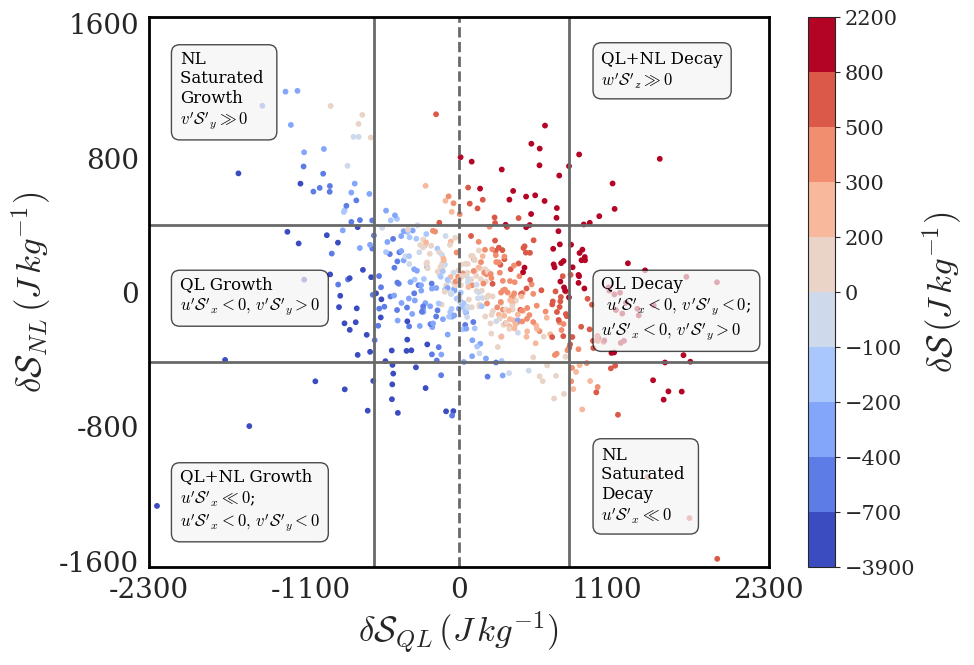

In [305]:
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern font

fontname = 'DeJaVu Serif'
params = {
    'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':25, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':25, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': fontname,
}

plt.rcParams.update(params)


plot_tmain_nlsum(
    df_t2.loc[df_t2.dse_anom_Lag1<0], cbar_lab = '$\delta\mathcal{S} \, (J\,kg^{-1})$', 
    figsize=(10,5*10/7), 
    ptsize=10, 
    ncat_col = 10,
    cbar_fntsz=15
)

# plot_tmain_nlsum(df_t2.loc[df_t2.dse_anom_Lag1<0])

# We want the quantile demarcations to be based on complete april distribution
ax.axhline(df_t2.NL_sum.quantile(0.9), lw=2, ls='-',c='dimgray')
ax.axhline(df_t2.NL_sum.quantile(0.1), lw=2, ls='-',c='dimgray')
ax.axvline(df_t2.T_main.quantile(0.9), lw=2, ls='-',c='dimgray')
ax.axvline(df_t2.T_main.quantile(0.1), lw=2, ls='-',c='dimgray')
# ax.axhline(0, lw=1, c='dimgray', ls='--')
ax.axvline(0, lw=2, c='dimgray', ls='--')

ax.set_xlabel('$\delta\mathcal{S}_{QL}\, (J\,kg^{-1})$')
ax.set_ylabel('$\delta\mathcal{S}_{NL}\, (J\,kg^{-1})$')

# ax.arrow(-800, -700, 1500, 0.9*1300, head_width=120, width = 20, fc='dimgray', ec = 'dimgray')
props = dict(boxstyle='round,pad=0.5', facecolor='whitesmoke', alpha=0.7, edgecolor='black')

annot_size = 12
# ax.text(0.03, 0.94, 'NL Saturated \nDecay\n' + '($u\' \mathcal{S}\'_{x}$)', transform=ax.transAxes, 
#         fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.05, 0.94, 'NL\nSaturated \nGrowth\n$v\'\mathcal{S}\'_{y}\gg0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.05, 0.53, 'QL Growth\n$u\'\mathcal{S}\'_{x}<0,\,v\'\mathcal{S}\'_{y}>0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.05, 0.18, 
        'QL+NL Growth\n$u\'\mathcal{S}\'_{x}\ll0$;\n$u\'\mathcal{S}\'_{x}<0,\,v\'\mathcal{S}\'_{y}<0$', 
        transform=ax.transAxes, fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

# ,\n$w\'\mathcal{S}\'_{z}>0$ v\'\mathcal{S}\'_{y}>0
ax.text(0.73, 0.94, 'QL+NL Decay\n$w\'\mathcal{S}\'_{z}\gg0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

annot_size = 12
ax.text(0.73, 0.53, 'QL Decay \n $u\'\mathcal{S}\'_{x}<0,\,v\'\mathcal{S}\'_{y}<0$;\n$ u\'\mathcal{S}\'_{x}<0,\,v\'\mathcal{S}\'_{y}>0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.text(0.73, 0.22, 'NL\nSaturated \nDecay\n$u\'\mathcal{S}\'_{x}\ll0$', transform=ax.transAxes, 
        fontsize=annot_size, fontname=fontname, verticalalignment='top', c='black', bbox=props)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

pdf_path = '/home/data/lab_hardik/Manuscript1/Fig_Apr_NegBG_regimes_phase_plot.pdf'
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF


In [257]:
df_t2.loc[(df_t2.bg_cls_main == 'neg')].shape


(556, 67)

In [258]:

df_t2.loc[(df_t2.bg_cls_main == 'neg') & (df_t2.regime_cls.str.contains('main'))].shape


(67, 67)

In [259]:
# df_negbg = pd.concat([
#     df_amplif_negbg_ql.loc[df_amplif_negbg_ql.regime_cls == df_amplif_negbg_ql.regime_cls], 
#     df_amplif_negbg_nl.loc[df_amplif_negbg_nl.regime_cls == df_amplif_negbg_nl.regime_cls], 
#     df_amplif_negbg_nlsat.loc[df_amplif_negbg_nlsat.regime_cls == df_amplif_negbg_nlsat.regime_cls], 

#     df_decay_negbg1_ql.loc[df_decay_negbg1_ql.regime_cls == df_decay_negbg1_ql.regime_cls], 
#     df_decay_negbg2_ql.loc[df_decay_negbg2_ql.regime_cls == df_decay_negbg2_ql.regime_cls], 
#     df_decay_negbg2_nlsat.loc[df_decay_negbg2_nlsat.regime_cls == df_decay_negbg2_nlsat.regime_cls]
# ], axis=0)

df_negbg = df_t2.loc[(df_t2.bg_cls_main == 'neg') & (df_t2.regime_cls.str.contains('main'))].copy()
df_negbg.loc[:,'regime_cls'] = df_negbg['regime_cls'].str.replace('_main','')
print(df_negbg.regime_cls.unique())

data1 = df_negbg.loc[:,[dx_s_anom, dy_s_anom] + ['regime_cls']]
data2 = df_negbg.loc[:,[uanom, vanom] + ['regime_cls']]
data3 = df_negbg.loc[:,[dz_s_anom] + ['regime_cls']]
data4 = df_negbg.loc[:,[wanom] + ['regime_cls']]

['decay_full' 'amplif_full' 'amplif_NLSat' 'amplif_QL' 'decay_QL2'
 'decay_NLSat']


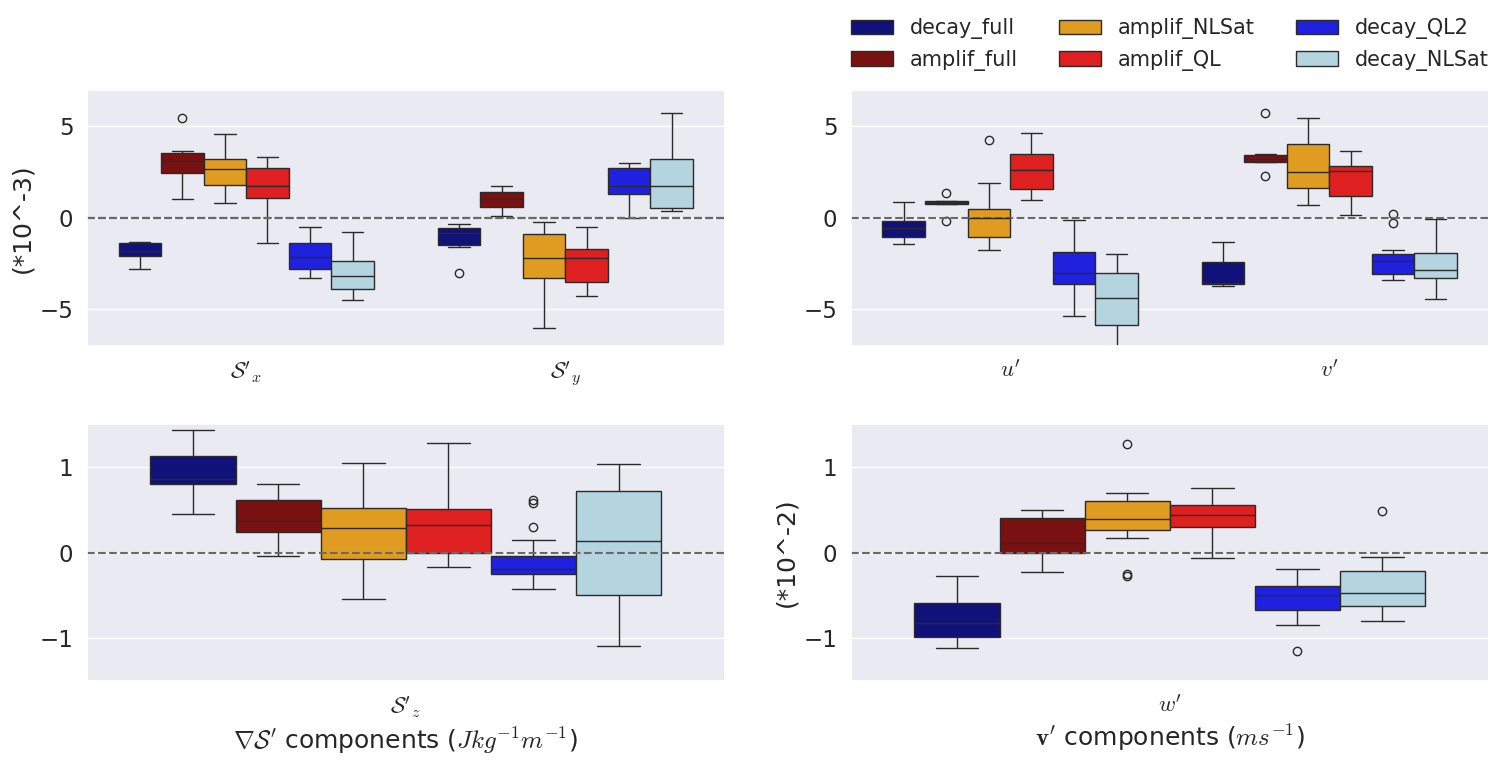

In [260]:
data1_melted = pd.melt(data1, id_vars=['regime_cls'], value_vars=[s for s in data1.columns if 'regime_cls' not in s])
data2_melted = pd.melt(data2, id_vars=['regime_cls'], value_vars=[s for s in data2.columns if 'regime_cls' not in s])
data3_melted = pd.melt(data3, id_vars=['regime_cls'], value_vars=[s for s in data3.columns if 'regime_cls' not in s])
data4_melted = pd.melt(data4, id_vars=['regime_cls'], value_vars=[s for s in data4.columns if 'regime_cls' not in s])

data1_melted['value'] = data1_melted['value']*10**3
data4_melted['value'] = data4_melted['value']*10**2


palette_dict_amplif_negbg = {
    'amplif_QL':'red', 
    'amplif_NLSat':'orange', 
    'amplif_full':'darkred', 
    
    'decay_NLSat':'lightblue', 
    'decay_QL2':'blue', 
    'decay_full':'darkblue', 
    
}

sns.set(font_scale=1.5)
fig,ax = plt.subplots(2,2,figsize=(16,8))


sns.boxplot(data = data1_melted, x='variable', y='value', hue='regime_cls', ax=ax[0,0], 
            palette=palette_dict_amplif_negbg, legend=None)
sns.boxplot(data = data2_melted, x='variable', y='value', hue='regime_cls', ax=ax[0,1], 
            palette=palette_dict_amplif_negbg, )
sns.boxplot(data = data3_melted, x='variable', y='value', hue='regime_cls', ax=ax[1,0], 
            palette=palette_dict_amplif_negbg, legend=None)
sns.boxplot(data = data4_melted, x='variable', y='value', hue='regime_cls', ax=ax[1,1], 
            palette=palette_dict_amplif_negbg, legend=None)

sns.move_legend(
    ax[0,1], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    fontsize=15
)

# ax[0,0].set_ylim(-0.006, 0.006)
ax[0,0].set_ylim(-7, 7)
ax[0,0].axhline(-0.002, ls='--', lw=1.5, c='dimgray')
ax[0,0].axhline(0.002, ls='--', lw=1.5, c='dimgray')

ax[0,1].set_ylim(-7, 7)
ax[1,0].set_ylim(-1.5, 1.5)
# ax[1,1].set_ylim(-0.015, 0.015)
ax[1,1].set_ylim(-1.5, 1.5)

for i in range(2):
    for j in range(2):        
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')
        ax[i,j].axhline(0, ls='--', lw=1.5, c='dimgray')

ax[0,0].set_ylabel('(*10^-3)')    
ax[1,1].set_ylabel('(*10^-2)')
        
ax[1,0].set_xlabel(r'$\mathbf{\nabla} \mathcal{S}^{\prime}$ components ($J kg^{-1} m^{-1}$)')
ax[1,1].set_xlabel('$\mathbf{v\'}$ components ($m s^{-1}$)')


plt.tight_layout()

plt.savefig('/home/data/lab_hardik/Manuscript1/Fig_Apr_NegBG_regimes_boxplts.pdf', bbox_inches='tight')


(225, 68)


NameError: name 'plot_breakdowns' is not defined

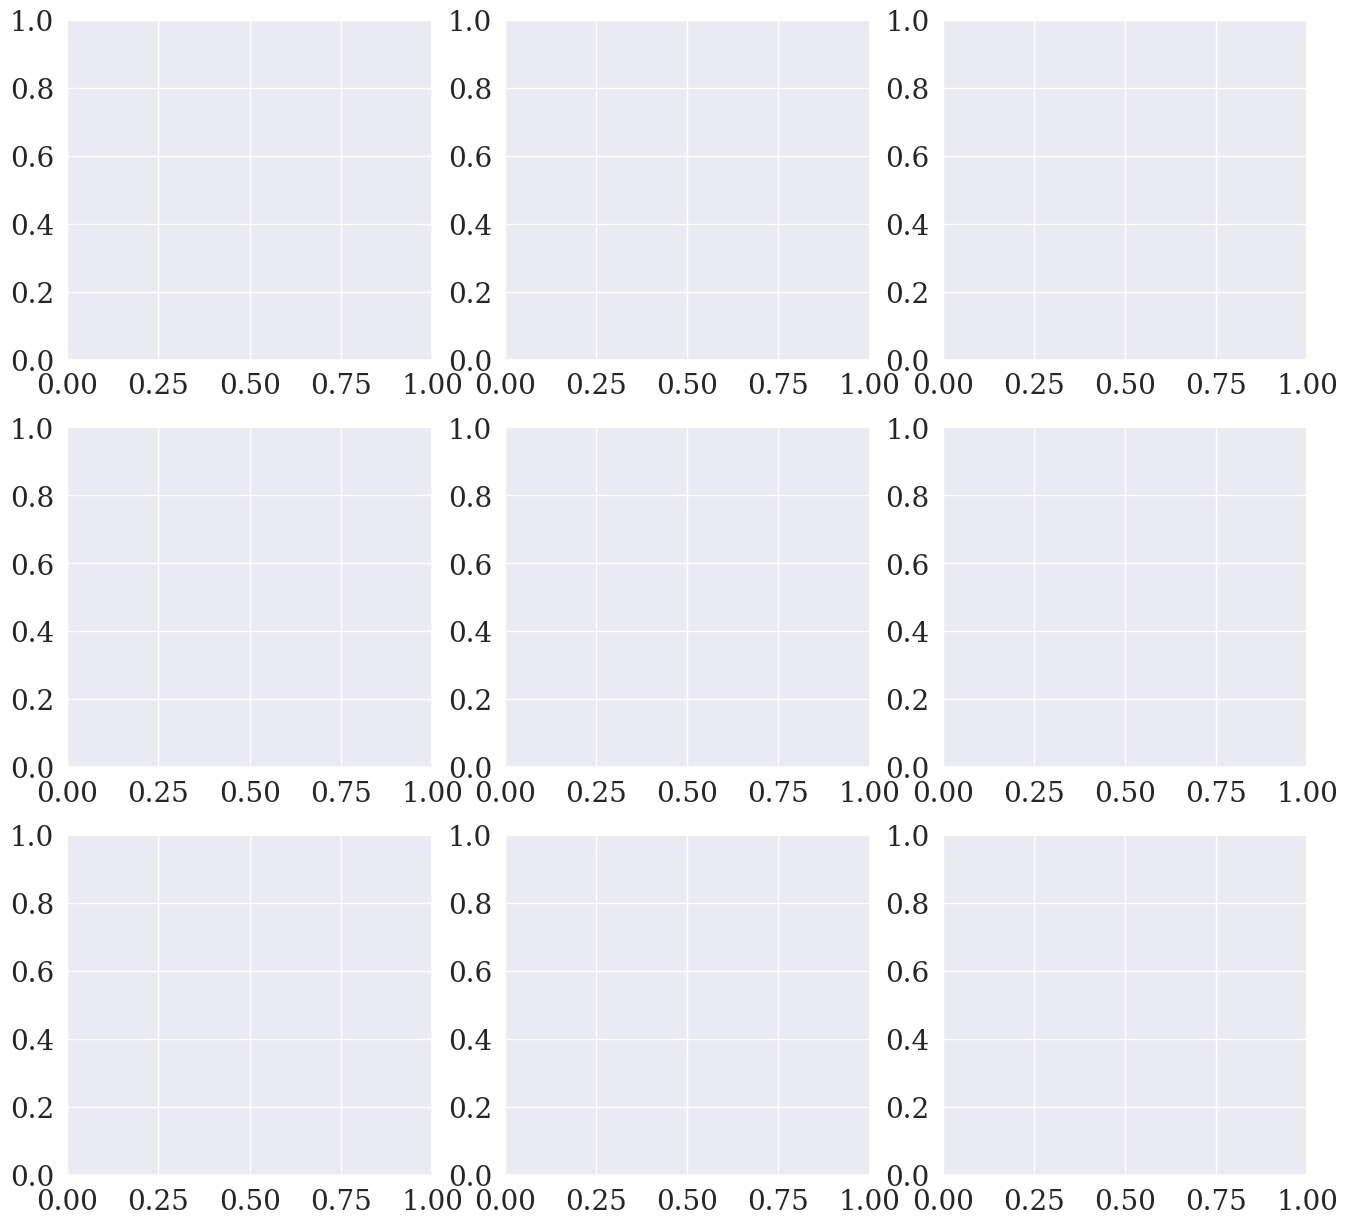

In [277]:
fig,ax = plt.subplots(3,3,figsize=(16,15), squeeze=False)

# df_plt = df_t2.copy()
df_plt = df_t2.loc[base_conds_negbg & (df_t2.Net_Adv<0)].copy()
df_plt.rename({'T_main':tmain_term,'NL_sum': nl_term, 'Net_Adv':netadv_term}, axis=1, inplace=True)
print(df_plt.shape)
plot_breakdowns(df_plt, square_boxes=True, tmain_term=tmain_term, nl_term=nl_term, netadv_term=netadv_term)

# df_plt = df_t2.loc[base_conds_posbg2].copy()
# print(df_plt.shape)

# plot_breakdowns(df_plt, netadv_term=)

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(16,15), squeeze=False)

# df_plt = df_t2.copy()
df_plt = df_t2.loc[base_conds_negbg & (df_t2.Net_Adv>0)].copy()
df_plt.rename({'T_main':tmain_term,'NL_sum': nl_term, 'Net_Adv':netadv_term}, axis=1, inplace=True)
print(df_plt.shape)
plot_breakdowns(df_plt, square_boxes=True, tmain_term=tmain_term, nl_term=nl_term, netadv_term=netadv_term)

# df_plt = df_t2.loc[base_conds_posbg2].copy()
# print(df_plt.shape)

# plot_breakdowns(df_plt, netadv_term=)

In [262]:
# df_decay_negbg2_nl.loc[(df_decay_negbg2_nl[nl_us]>0) & (df_decay_negbg2_nl[nl_vs]>0)]

In [263]:
# df_decay_negbg1_nl

In [264]:
df_t2.columns

Index(['$u'$$\mathcal{S}'_x$', '$v'$$\mathcal{S}'_y$', '$w'$$\mathcal{S}'_z$',
       '$u'$$\mathcal{S}̅_x$', '$v'$$\mathcal{S}̅_y$', '$w'$$\mathcal{S}̅_z$',
       '${u̅}$$\mathcal{S}'_x$', '${v̅}$$\mathcal{S}'_y$',
       '${w̅}$$\mathcal{S}'_z$', '${u̅}$$\mathcal{S}̅_x$',
       '${v̅}$$\mathcal{S}̅_y$', '${w̅}$$\mathcal{S}̅_z$', 'adv_recon',
       'coready_dse_del1', 'year', 'month', 'day', 't2m_anom', 't2m_anom_Lag1',
       'del_t2m_anom', '$u'$', '${u̅}$', '$v'$', '${v̅}$', 'w_down_anom',
       'w_down_clmt', '$\mathcal{S}'_x$', '$\mathcal{S}̅_x$',
       '$\mathcal{S}'_y$', '$\mathcal{S}̅_y$', '$\mathcal{S}'_z$',
       '$\mathcal{S}̅_z$', 'dse_anom', 'dse_clmt', 'dates_roll_clmt', '$w'$',
       '${w̅}$', 'adv_recon_Lag1', 'dse_anom_Lag1', 'adv_recon_2Dave',
       'Net_Adv', 'T0', 'T_main', 'T2', 'lin_sum', 'NL_sum', 'ed_x_y',
       'ed_y_z', 'ed_x_z', 'adv_recon_2Dave_nonmain', 'adv_recon_2', 'w'',
       'w̅', 'x_contrib_NL', 'y_contrib_NL', 'z_contrib_NL',
       'adv_r

In [265]:
df_t2['Net_Adv_dec'] = pd.qcut(df_t2.Net_Adv.abs(), np.linspace(0,1,11), labels = range(10)).astype('int')


In [266]:
print(df_t2.loc[df_t2.Net_Adv_dec.isin([0,9])].shape)

(df_t2.loc[df_t2.Net_Adv_dec.isin([0,9])]\
.groupby('prim_cls')\
['Net_Adv_dec'].count()/\
df_t2.loc[df_t2.Net_Adv_dec.isin([0,9]), 'Net_Adv_dec'].count()).round(2)

(248, 68)


prim_cls
1.0    0.15
2.1    0.12
2.2    0.31
3.0    0.12
4.1    0.08
4.2    0.22
Name: Net_Adv_dec, dtype: float64

In [267]:
df_t2.loc[(df_t2['regime_cls'] != 'nan'), 'regime_cls'].count()

180

In [268]:
(df_t2.loc[(df_t2['regime_cls'] != 'nan') ]\
.groupby(['prim_cls'])['prim_cls'].count()/\
df_t2.loc[(df_t2['regime_cls'] != 'nan'), 'regime_cls'].count()).round(2)

prim_cls
1.0    0.07
2.1    0.06
2.2    0.47
3.0    0.04
4.1    0.07
4.2    0.29
Name: prim_cls, dtype: float64

In [269]:
df_t2.loc[(df_t2['regime_cls'] != 'nan') ]\
.groupby(['prim_cls', 'bg_cls_main'])['bg_cls_main'].count()

prim_cls  bg_cls_main
1.0       neg             3
          pos            10
2.1       neg             3
          pos             7
2.2       neg            55
          pos            29
3.0       neg             6
          pos             1
4.1       neg             7
          pos             6
4.2       neg            28
          pos            25
Name: bg_cls_main, dtype: int64

In [270]:
# df_t2['regime_cls2'] = 
df_t2.loc[(df_t2['regime_cls'] != 'nan'), 'regime_cls'].str.split('_')

date
1980-04-16       [amplif, QL, main]
1981-04-09       [amplif, QL, main]
1981-04-10             [amplif, NL]
1981-04-14    [amplif, NLSat, main]
1981-04-20        [decay, NL, main]
1981-04-22        [decay, NL, main]
1982-04-04        [decay, QL, main]
1982-04-07      [decay, full, main]
1982-04-08      [decay, full, main]
1982-04-24     [amplif, full, main]
1982-04-25     [amplif, full, main]
1982-04-26             [amplif, NL]
1982-04-30             [decay, QL2]
1983-04-03    [amplif, NLSat, main]
1983-04-07             [amplif, NL]
1983-04-08       [amplif, QL, main]
1983-04-09       [amplif, QL, main]
1983-04-17    [amplif, NLSat, main]
1983-04-20      [decay, full, main]
1983-04-21      [decay, full, main]
1984-04-02        [decay, NL, main]
1984-04-10       [decay, QL2, main]
1984-04-11       [decay, QL2, main]
1984-04-12       [decay, QL2, main]
1984-04-20        [decay, QL, main]
1984-04-23     [decay, NLSat, main]
1984-04-24     [decay, NLSat, main]
1984-04-29             

In [271]:
df_t2.loc[(df_t2['regime_cls'] != 'nan')]\
.groupby(['prim_cls', 'regime_cls'])['regime_cls'].count()

prim_cls  regime_cls       
1.0       amplif_NL             1
          amplif_NLSat_main     7
          amplif_QL_main        1
          decay_NLSat_main      1
          decay_NL_main         2
          decay_QL2_main        1
2.1       amplif_NLSat_main     2
          amplif_QL_main        5
          decay_NL_main         1
          decay_QL1             1
          decay_QL2             1
2.2       amplif_NL             9
          amplif_NLSat_main     5
          amplif_QL_main       14
          decay_NLSat_main     12
          decay_NL_vs           1
          decay_QL1            12
          decay_QL2             9
          decay_QL2_main       15
          decay_full_main       7
3.0       amplif_NL             3
          decay_NL_vs           1
          decay_QL1             1
          decay_QL2             2
4.1       amplif_NL             2
          amplif_NLSat_main     2
          amplif_QL_main        1
          amplif_full_main      1
          decay_NL_m

In [272]:
[s for s in df_t1.columns if 't2m' in s]

['t2m_anom', 't2m_anom_Lag1', 'del_t2m_anom']

In [273]:
[s for s in df_mlr0.columns if 't2m' in s]

['t2m_anom', 't2m_anom_Lag1', 'del_t2m_anom']

In [274]:
df_t2['regime_cls_2'] = np.where(
    df_t2['regime_cls'].str.contains('decay_NL1|decay_NL2'), 'decay_NL', df_t2['regime_cls']
)

df_t2['regime_cls_2'].unique()

array(['nan', 'amplif_QL_main', 'amplif_NL', 'amplif_NLSat_main',
       'decay_NL_main', 'decay_QL_main', 'decay_full_main',
       'amplif_full_main', 'decay_QL2', 'decay_QL2_main',
       'decay_NLSat_main', 'decay_QL1', 'decay_NL_vs'], dtype=object)

In [275]:
# df_t2.loc[(df_t2['bg_cls_main']=='pos') & (df_t2['regime_cls'] != 'nan')]\
# .groupby(['regime_cls', 'bg_cls_main','dse_anom_Lag1_clss'])['regime_cls'].count()

In [ ]:
ax.spines['top']

In [ ]:
ax

In [1350]:
pivoted_df.index

Index([], dtype='object', name='regime_cls_2')

In [1283]:
1

1

In [1262]:
pivoted_df.rename(
    index={
        'amplif_NLSat_main': 'NL Saturated Growth', 
        'amplif_QL_main': 'QL Growth', 
        'amplif_full_main': 'QL+NL Growth',
        'decay_NLSat_main': 'NL Saturated Decay',
        'decay_QL2_main': 'QL Decay', 
        "decay_full_main": 'QL+NL Decay'})


dse_anom_Lag1_clss      0     1     2     3     4
regime_cls_2                                     
NL Saturated Growth  23.0  46.0  23.0   0.0   8.0
QL Growth            17.0  33.0   8.0  33.0   8.0
QL+NL Growth         50.0  33.0   0.0  17.0   0.0
NL Saturated Decay   23.0  23.0  15.0   8.0  31.0
QL Decay             25.0  12.0  19.0  25.0  19.0
QL+NL Decay          71.0   0.0  29.0   0.0   0.0

In [872]:
# help(sns.heatmap)

$\delta \mathcal{S}_{QL} = \bar{u}\mathcal{S}'_{x} + v' \overline{\mathcal{S}_{y}} + w'\overline{\mathcal{S}_{z}}$

$\delta \mathcal{S}_{NL} = u' \mathcal{S}'_{x} + v' \mathcal{S}'_{y} + w' \mathcal{S}'_{z}$

In [276]:
df_rgm_dist_bg = np.round(100*(df_t2.loc[(df_t2['bg_cls_main']=='pos') & (df_t2['regime_cls_2'] != 'nan')]\
.groupby(['regime_cls_2', 'bg_cls_main','Net_Adv_clss'])['regime_cls_2'].count()/\
df_t2.loc[(df_t2['bg_cls_main']=='pos') & (df_t2['regime_cls_2'] != 'nan')]\
.groupby(['regime_cls_2', 'bg_cls_main'])['regime_cls_2'].count()))

df_rgm2 = df_rgm_dist_bg.copy()
# [df_rgm_dist_bg.index.get_level_values('Net_Adv_clss').isin([5,6,7,8,9])]

df_rgm2= df_rgm2.to_frame().rename({'regime_cls_2':'values'}, axis=1)
df_rgm2

/tmp/ipykernel_4177943/2264584911.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


values
regime_cls_2 bg_cls_main Net_Adv_clss        
amplif_NL    pos         0                0.0
                         1                0.0
                         2                0.0
                         3                0.0
                         4                0.0
                         5                0.0
                         6                0.0
                         7                0.0
                         8                0.0
                         9              100.0
amplif_NLSat pos         0                0.0
                         1                0.0
                         2                0.0
                         3                0.0
                         4                0.0
                         5               21.0
                         6               14.0
                         7               36.0
                         8               29.0
                         9                0.0
amplif_QL    pos         0                0.0
                         1                0.0
                         2                0.0
                         3                0.0
                         4                0.0
                         5                0.0
                         6                0.0
                         7                0.0
                         8               47.0
                         9               53.0
decay_NL     pos         0               67.0
                         1               12.0
                         2               21.0
                         3                0.0
                         4                0.0
                         5                0.0
                         6                0.0
                         7                0.0
                         8                0.0
                         9                0.0
decay_QL     pos         0              100.0
                         1                0.0
                         2                0.0
                         3                0.0
                         4                0.0
                         5                0.0
                         6                0.0
                         7                0.0
                         8                0.0
                         9                0.0

In [277]:
rgm_vals = list(df_rgm2.index.get_level_values(level='regime_cls_2').values)
rgm_vals_2 = [s.replace('_',' ').split(' ')[0].title() + ' ' + s.replace('_',' ').split(' ')[1] for s in rgm_vals]

# df_rgm2.index.levels[0]
# dict(zip(rgm_vals,rgm_vals_2))

df_rgm2.index = df_rgm2.index.set_levels(df_rgm2.index.levels[0].map(dict(zip(rgm_vals,rgm_vals_2))), level='regime_cls_2')

In [278]:
# df_rgm2

/tmp/ipykernel_4177943/3831466246.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


Text(0.5, 1.0, '% Occurrence of each Advection Regime \nby Decile of $\\delta \\mathcal{S}$')

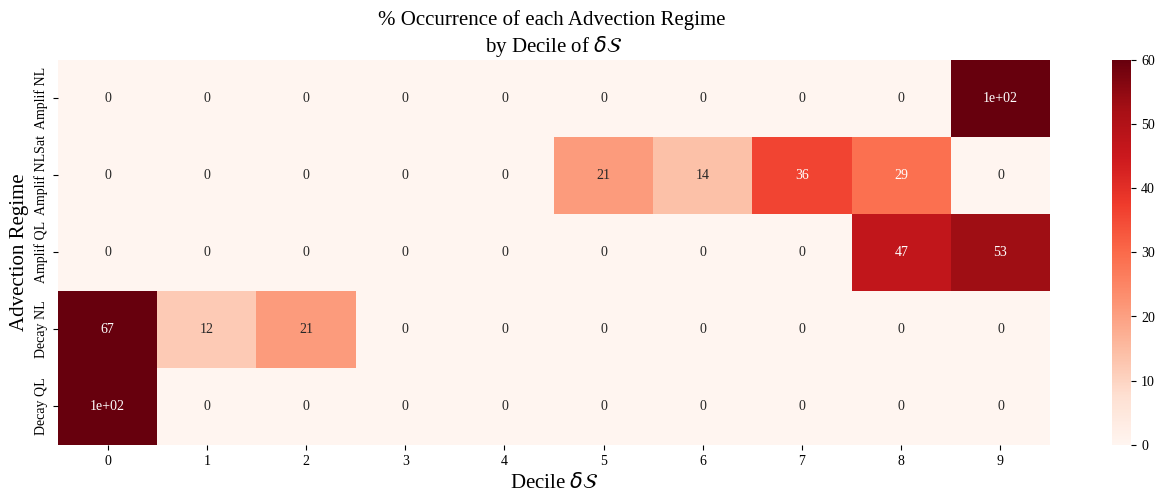

In [280]:
pivoted_df = df_rgm2.pivot_table(index='regime_cls_2', columns='Net_Adv_clss', values='values')

# Plot the heatmap
plt.figure(figsize=(16,5))
sns.heatmap(pivoted_df, annot=True, cmap='Reds', vmin=0, vmax=60)
plt.xlabel('Decile $\delta \mathcal{S}$')
plt.ylabel('Advection Regime')
plt.title('% Occurrence of each Advection Regime \nby Decile of $\delta \mathcal{S}$')

In [1037]:
dat_dir

'/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/'

In [1044]:
tst1 = xr.open_dataset('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/' + 'RD_DSE_Flx_NI_{}_{}_rolling.nc'.format(1980, 1994))

In [1045]:
tst2 = xr.open_dataset('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/' + 'RD_DSE_Flx_NI_1980_1994.nc')

In [1059]:

np.round(tst1['uAnom_gradx_dseAnom'][100,10,10,8:20].values, 2)


array([0.02, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [1060]:
np.round(tst2['uAnom_gradx_dseAnom'][100,10,10,8:20].values, 2)

array([0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [1054]:
((tst2['uAnom_gradx_dseAnom'][100,10,10,10] + tst2['uAnom_gradx_dseAnom'][100,10,10,9])/2)\
.values

array(0.00876931)

## Old

## posbg1

# s'>0 & dy(s') > 0

## Amplification

In [199]:
'Apr_posbg_amplif_nlsat_.csv'


df_amplif_nlsat = df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nlsat, col_set2].copy() # positive BG conditions, northern half hotter
print(df_amplif_nlsat.shape)

# is there a z-component driven regime? 
print(df_amplif_nlsat.loc[conds2_z_dom(df_amplif_nlsat)].shape)
# only 2 rows, so no

# y-comp driven regime
df_amplif_nlsat_vs = df_amplif_nlsat.loc[conds2_y_dom(df_amplif_nlsat)].sort_values('y_contrib_NL')
print(df_amplif_nlsat_vs.shape)
# df_amplif_nlsat_vs.sort_values(nl_vs)

# v's' < 0 always
# u's' also mostly < 0
# df_amplif_nlsat_vs.to_csv(dat_dir + 'Apr_posbg_amplif_nlsat_yNL.csv')

# x-comp driven regime
df_amplif_nlsat_us = df_amplif_nlsat.loc[(df_amplif_nlsat[nl_us]<0) & conds2_x_dom(df_amplif_nlsat)].sort_values('x_contrib_NL')
print(df_amplif_nlsat_us.shape)
df_amplif_nlsat_us.sort_values(nl_us)

# u's' < 0 always
# v's' ~> 0; -210 < v's' < 700
df_amplif_nlsat_us.to_csv(dat_dir + 'Apr_posbg_amplif_nlsat_xNL.csv')

# df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nlsat & conds2_y_dom(df_t2),'regime_cls'] = 'amplif_NLsat_y'
df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nlsat & conds2_x_dom(df_t2),'regime_cls'] = 'amplif_NLsat_x'


# df_amplif_nlsat_vs['boxplot_ind'] = 'amplif_NLsat_y'
df_amplif_nlsat_us['boxplot_ind'] = 'amplif_NLsat_x'


(14, 26)
(1, 26)
(3, 26)
(10, 26)


In [200]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [201]:
df_amplif_nlsat_us[col_set2]

u'$s'_{x}$  v'$s'_{y}$  w'$s'_{z}$  v'${s̅_{y}}$  w'${s̅_{z}}$   u̅$s'_{x}$       T_main      NL_sum  x_contrib_NL  y_contrib_NL  z_contrib_NL     Net_Adv    dy(s')     dse_anom  dse_anom_Lag1        u'        v'        w'    dx(s')    dz(s')        u̅        v̅        w̅    dx(s̅)    dy(s̅)    dz(s̅)
date                                                                                                                                                                                                                                                                                                                       
2022-04-09  -488.757464 -166.817203 -279.427798     42.260155    651.248785   667.593257  1361.102197 -935.002465     52.273388     17.841365     29.885247  320.181973  0.004563  4729.616477    4410.254046 -2.963993  0.040166 -0.003898 -0.001011 -0.971154  6.305443 -0.542356 -0.000644  0.000119 -0.004624  1.924380
2021-04-12  -384.738356  -89.489592 -242.080636     35.681738    194.631175   665.679891   895.992804 -716.308585     53.711259     12.493162     33.795579  154.120428  0.002201   973.438209     469.510827 -3.868530  0.009236  0.000587 -0.001216 -1.121841  5.980699 -0.566829 -0.000301  0.000156 -0.004292  1.901212
1981-04-14  -394.515277 -183.240656  138.320327    147.285353   -323.928760  1023.044442   846.401035 -439.435605     55.094031     25.589545     19.316424  192.419142  0.002412  4740.310863    5097.048318 -0.768425  0.451229  0.004103 -0.002253 -0.051279  5.737524 -0.625081 -0.000330  0.000020 -0.004016  1.846010
2022-04-10  -455.298713 -155.646386 -178.433498    -70.388279    639.182994   608.682971  1177.477686 -789.378596     57.678117     19.717584     22.604299  263.174423  0.004930  4751.907375    4729.616477 -3.544237 -0.161041 -0.004527 -0.000916 -0.631971  6.202065 -0.583694 -0.000403  0.000133 -0.004506  1.901407
2004-04-25 -1095.200115  480.695387  113.364105   -694.192021   -224.006872  2041.941343  1123.742451 -501.140623     64.833144     28.455981      6.710875  744.793207  0.000182   864.253021      71.133662 -2.432644 -2.752055  0.001055 -0.004682  0.497545  4.991924 -0.771040  0.000094 -0.000646 -0.002782  1.654220
2002-04-13  -584.261411 -237.010369   57.855835    258.216544    106.003663   871.218025  1235.438232 -763.415946     66.459226     26.959723      6.581051  426.961571  0.003130  2752.517856    2355.416024 -4.143593  0.759483  0.000602 -0.001517  0.236410  5.853379 -0.589156 -0.000334  0.000093 -0.004157  1.877586
1987-04-27  -899.299744  360.154982   87.320448   -678.270231    337.556762  1203.773941   863.060472 -451.824313     66.774304     26.742027      6.483669  462.722506  0.002298  1469.465803     295.585186 -3.208550 -2.656876 -0.003073 -0.002771 -0.096663  4.910406 -0.789824  0.000508 -0.000759 -0.002657  1.609620
2003-04-30  -924.954843  208.940236  125.554351   -362.811351     39.895529  1626.568410  1303.652588 -590.460257     73.441205     16.589807      9.968987  640.533136  0.000370  1923.965476     695.694170 -2.280385 -1.850665  0.000247 -0.003784  0.098352  4.916976 -0.758176  0.000944 -0.000750 -0.002553  1.583191
2005-04-19  -406.609241   42.158847  -86.390218   -288.229589    319.565403   912.280484   943.616299 -450.840612     75.979245      7.877827     16.142928  438.954184  0.000997  1179.284108     504.066550 -2.562870 -0.777349 -0.001948 -0.001803 -0.481315  5.436166 -0.684193 -0.000147 -0.000120 -0.003479  1.802366
2002-04-12  -889.465370   64.569452   49.036248   -363.991261    423.780808  1558.682468  1618.472015 -775.859670     88.674212      6.437176      4.888612  757.813880  0.003225  2355.416024    1135.230207 -3.684797 -0.837845 -0.001896 -0.002768 -0.121771  5.979575 -0.566465 -0.000300  0.000156 -0.004291  1.893684

In [202]:
# conds_posbg_amplif_nlsat


In [203]:
dat_dir

'/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/'

In [649]:
'Apr_posbg_amplif_nl_.csv'

df_amplif_nl = df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nl, col_set2].copy() # positive BG conditions, northern half hotter
print(df_amplif_nl.shape)

df_amplif_nl_ws = df_amplif_nl.loc[conds2_z_dom(df_amplif_nl), col_set2].sort_values('z_contrib_NL')
print(df_amplif_nl_ws.shape)
# df_amplif_nl_ws.to_csv(dat_dir + 'Apr_posbg_amplif_nl_zNL.csv')

df_amplif_nl_us = df_amplif_nl.loc[conds2_x_dom(df_amplif_nl), col_set2].sort_values('x_contrib_NL')
print(df_amplif_nl_us.shape)
# df_amplif_nl_us.to_csv(dat_dir + 'Apr_posbg_amplif_nl_xNL.csv')

df_amplif_nl_vs = df_amplif_nl.loc[conds2_y_dom(df_amplif_nl),col_set2].sort_values('y_contrib_NL')
print(df_amplif_nl_vs.shape)
df_amplif_nl_vs.to_csv(dat_dir + 'Apr_posbg_amplif_nl_yNL.csv')


# df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nl & conds2_z_dom(df_t2) ,'regime_cls'] = 'amplif_NL_z'
df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nl & conds2_y_dom(df_t2),'regime_cls'] = 'amplif_NLy'
# df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_nl & conds2_x_dom(df_t2),'regime_cls'] = 'amplif_NL_x'

df_amplif_nl_vs['boxplot_ind'] = 'amplif_NLy'
# df_amplif_nl_us['boxplot_ind'] = 'amplif_NL_x'
# df_amplif_nl_ws['boxplot_ind'] = 'amplif_NL_z'


(11, 26)
(2, 26)
(1, 26)
(8, 26)


In [165]:
df_amplif_nl_vs

u'$s'_{x}$   v'$s'_{y}$  w'$s'_{z}$  v'${s̅_{y}}$  w'${s̅_{z}}$   u̅$s'_{x}$      T_main       NL_sum  x_contrib_NL  y_contrib_NL  z_contrib_NL      Net_Adv    dy(s')     dse_anom        u'        v'        w'    dx(s')    dz(s')        u̅        v̅        w̅    dx(s̅)    dy(s̅)    dz(s̅)  boxplot_ind
date                                                                                                                                                                                                                                                                                                                      
2015-04-18  372.160252   410.019688   44.729339  -1134.311231    601.861314   942.310903  409.860986   826.909279     45.006177     49.584604      5.409220  1134.233387  0.000763  3150.749178  1.313495 -3.516998 -0.001329 -0.002451  0.046895  5.515782 -0.679618 -0.000073 -0.000048 -0.003582  1.797610  amplif_NL_y
1981-04-10  -76.845895   480.251919  396.708654  -1552.876139   1490.536493   422.021601  359.681955   800.114678      8.056760     50.351086     41.592154  1113.280118  0.001815  4234.000272 -1.829043 -3.978793 -0.007892 -0.001070  0.420272  6.201563 -0.583562 -0.000403  0.000133 -0.004506  1.909776  amplif_NL_y
1996-04-14 -660.625905  1096.932735  156.974071  -1310.745779    939.403259   711.272385  339.929865   593.280901     34.505856     57.295064      8.199080  1209.578373  0.003385  2159.346502 -5.808922 -3.859891 -0.005530 -0.001251 -0.090494  5.737122 -0.624809 -0.000330  0.000020 -0.004017  1.869973  amplif_NL_y
1981-04-18  217.890864   385.019618   58.022223  -1178.176839   -436.876631  1748.234721  133.181250   660.932705     32.967178     58.253982      8.778840   630.874116  0.001437  3506.276261  0.528186 -3.631740  0.002464 -0.003925 -0.093593  5.516772 -0.679919 -0.000073 -0.000048 -0.003581  1.794029  amplif_NL_y
1996-04-25  351.636869   538.421498   27.791382  -1118.114467    184.972585  1655.114251  721.972370   917.849749     38.310940     58.661180      3.027879  1741.664230  0.001045  2607.846446  0.893805 -4.491830 -0.000566 -0.003968 -0.004196  4.992311 -0.771053  0.000093 -0.000646 -0.002781  1.646168  amplif_NL_y
2018-04-30  155.194512   304.666537  -14.832682   -556.172940   -304.528355   992.070826  131.369531   445.028367     32.693609     64.181706      3.124685   497.638602  0.001093  2934.732340  1.658368 -2.851721  0.004135 -0.002429 -0.319549  4.917252 -0.758081  0.000944 -0.000749 -0.002552  1.574240  amplif_NL_y
1998-04-01 -398.493169  1010.525809  -48.351672  -1552.298547    178.693867  1741.734233  368.129553   563.680968     27.343296     69.338971      3.317733  1123.651394  0.001838  4360.530984 -1.267276 -3.604760  0.001407 -0.003919  0.281266  6.485634 -0.503514 -0.001270  0.000082 -0.005146  2.154826  amplif_NL_y
2007-04-10  -77.443745   597.625697  105.550829   -888.106210    974.564239   520.362881  606.820910   625.732781      9.920796     76.557799     13.521405  1305.715531  0.003632  2167.761969 -2.184261 -2.314077 -0.003677 -0.001184 -0.040755  6.201222 -0.583459 -0.000403  0.000133 -0.004506  1.920609  amplif_NL_y
1981-04-12 -134.230947   617.538487   32.190835  -1413.355702    620.589863   799.302730    6.536891   515.498374     17.122162     78.771656      4.106182   376.382845  0.002332  5163.747709 -1.404559 -3.645325 -0.003662 -0.001882 -0.052470  5.980216 -0.566536 -0.000300  0.000156 -0.004291  1.872818  amplif_NL_y
2017-04-12   72.427924  1002.462166  -71.116486  -1944.513938   1342.102680   887.744252  285.332995  1003.773604      6.320027     87.474382      6.205591  1182.114991  0.002455  3780.791809 -0.774883 -5.207784 -0.003290 -0.002126 -0.334564  5.980475 -0.566730 -0.000300  0.000156 -0.004291  1.885530  amplif_NL_y
2007-04-11   19.197623   402.985670  -11.963251   -480.940535    681.941663   203.780575  404.781703   410.220042      4.421922     92.822499      2.755579   856.593514  0.004826  2844.080834 -2.656182 -1.220267 -0.004318 -0.000654 

In [ ]:
# conds_posbg_amplif_nl

In [ ]:
df_t2.loc[base_conds_posbg1].shape

In [205]:
df_amplif_ql = df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_ql, col_set2].copy() 
print(df_amplif_ql.shape)
df_amplif_ql.to_csv(dat_dir + 'Apr_posbg_amplif_ql.csv')


(24, 26)


In [171]:
# df_amplif_ql

In [ ]:
'Apr_posbg1_amplif_ql_.csv'
'Apr_posbg1_amplif_full_.csv'

df_amplif_ql_nl = df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_ql_nl, col_set2].copy() # positive BG conditions, northern half hotter
print(df_amplif_ql_nl.shape)


df_amplif_ql_medTmain = \
df_amplif_ql_nl.loc[(df_amplif_ql_nl.NL_sum.abs() < 300) & (df_amplif_ql_nl[T_main].between(0, 950)), col_set2]\
.sort_values(T_main)
print(df_amplif_ql_medTmain.shape)
df_amplif_ql_medTmain.to_csv(dat_dir + 'Apr_posbg_amplif_ql_med.csv')
## lower limit above could ve been 250 acc to the color limits chosen but there is no point looking at such small fluxes

df_amplif_ql_lrgTmain = \
df_amplif_ql_nl.loc[(df_amplif_ql_nl.NL_sum.abs() < 300) & (df_amplif_ql_nl[T_main] > 950), col_set2]\
.sort_values(T_main)
print(df_amplif_ql_lrgTmain.shape)
df_amplif_ql_lrgTmain.to_csv(dat_dir + 'Apr_posbg_amplif_ql_lrg.csv')

df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_ql_nl & (df_t2.NL_sum.abs() < 300) 
          & (df_t2[T_main] > 950), 'regime_cls'] = 'amplif_QL_lrg'
df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_ql_nl & (df_t2.NL_sum.abs() < 300) 
          & (df_t2[T_main].between(0, 950)), 'regime_cls'] = 'amplif_QL_med'


##############################################################
df_amplif_full = df_amplif_ql_nl.loc[(df_amplif_ql_nl.NL_sum > 300) & (df_amplif_ql_nl.Net_Adv > 850), col_set2].copy()
print(df_amplif_full.shape)

df_amplif_full_xNL = df_amplif_full.loc[conds2_x_dom(df_amplif_full), col_set2].copy()
print(df_amplif_full_xNL.shape)
df_amplif_full_xNL.to_csv(dat_dir + 'Apr_posbg_amplif_full_xNL.csv')

df_amplif_full_zNL = df_amplif_full.loc[conds2_z_dom(df_amplif_full), col_set2].copy()
print(df_amplif_full_zNL.shape)
df_amplif_full_zNL.to_csv(dat_dir + 'Apr_posbg_amplif_full_zNL.csv')



df_amplif_full_yNL = df_amplif_full.loc[conds2_y_dom(df_amplif_full), col_set2].copy()
print(df_amplif_full_yNL.shape)
# df_amplif_full_yNL.to_csv(dat_dir + 'Apr_posbg_amplif_full_yNL.csv')

df_amplif_full_yNL_negus = \
df_amplif_full_yNL.loc[(df_amplif_full_yNL[nl_us] <= 0), col_set2].sort_values('y_contrib_NL')
print(df_amplif_full_yNL_negus.shape)
df_amplif_full_yNL_negus.to_csv(dat_dir + 'Apr_posbg_amplif_full_yNL_negus.csv')

df_amplif_full_yNL_posus = \
df_amplif_full_yNL.loc[(df_amplif_full_yNL[nl_us] > 0), col_set2].sort_values('NL_sum')
print(df_amplif_full_yNL_posus.shape)
df_amplif_full_yNL_posus.to_csv(dat_dir + 'Apr_posbg_amplif_full_yNL_posus.csv')


# both xNL and yNL are relevant but let's not bother since both are of same sign
# Turns out there's no point segregating the two Tmain magnitudes since there aren't enough points on the upper side
df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_ql_nl & (df_t2.NL_sum > 300) 
          & (df_t2[nl_us] <= 0), 'regime_cls'] = 'amplif_QL_NL_negus'
df_t2.loc[base_conds_posbg1 & conds_posbg_amplif_ql_nl & (df_t2.NL_sum > 300) 
          & (df_t2[nl_us] > 0), 'regime_cls'] = 'amplif_QL_NL_posus'


df_amplif_full_yNL['boxplot_ind'] = 'amplif_full_yNL'
df_amplif_full_yNL_posus['boxplot_ind'] = 'amplif_full_yNL_posus'
df_amplif_full_yNL_negus['boxplot_ind'] = 'amplif_full_yNL_negus'
df_amplif_ql_medTmain['boxplot_ind'] = 'amplif_QL_med'
df_amplif_ql_lrgTmain['boxplot_ind'] = 'amplif_QL_lrg'


In [ ]:
# df_t2.loc[df_t2['regime_cls'].str.contains('amplif_QL_NL')].Net_Adv


In [ ]:
# conds_posbg_amplif_ql_nl

### 3. Amplification (full fledged) of +ve BG; in phase QL-NL; Tmain > 0, NL > -300
### -300 < NL < 300 means QL regime and NL > 300 means full fledged 

In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

# plot_breakdowns(df_amplif_ql_nl)
plot_breakdowns(df_amplif_full)

In [ ]:
lst = [s for s in var_lst_fund if 'd' in s and 'z' not in s]
lst.sort(key = lambda s: s[1])
lst

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
lst1 = [s for s in var_lst_fund if 'd' in s and 'z' not in s]
lst1.sort(key = lambda s: s[1])
lst2 = [s for s in var_lst_fund if 'd' not in s and 'w' not in s]
lst2.sort(key = lambda s: s[0])

df_amplif_ql_lrgTmain[lst1].boxplot(ax=ax[0])
df_amplif_ql_lrgTmain[lst2].boxplot(ax=ax[1])

ax[0].set_ylim(-0.006, 0.006)
ax[1].set_ylim(-7, 7)


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_ql_medTmain[lst1].boxplot(ax=ax[0])
df_amplif_ql_medTmain[lst2].boxplot(ax=ax[1])
ax[0].set_ylim(-0.006, 0.006)
ax[1].set_ylim(-7, 7)


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_full_yNL[lst1].boxplot(ax=ax[0])
df_amplif_full_yNL[lst2].boxplot(ax=ax[1])
ax[0].set_ylim(-0.006, 0.006)
ax[1].set_ylim(-7, 7)


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_full_yNL_posus[var_lst_fund_gradh].boxplot(ax=ax[0])
df_amplif_full_yNL_posus[var_lst_fund_velh].boxplot(ax=ax[1])


In [ ]:
df_t2['boxplot_ind'] = 'net'
df_t2[var_lst_fund_gradh + ['boxplot_ind']]


In [ ]:
df_amplif_full_yNL.shape
# [var_lst_fund_gradh]

In [ ]:
# df_amplif_full_yNL_posus

In [ ]:
import seaborn as sns

In [ ]:
df_amplif = pd.concat([df_amplif_full_yNL, df_amplif_ql_lrgTmain, df_amplif_nlsat_us], axis=0)
print(df_amplif.boxplot_ind.unique())

data1 = df_amplif.loc[:,[s for s in var_lst_fund if 'd' in s and 'z' not in s] + ['boxplot_ind']]
data2 = df_amplif.loc[:,[s for s in var_lst_fund if 'd' not in s and 'w' not in s] + ['boxplot_ind']]
data3 = df_amplif.loc[:,[s for s in var_lst_fund if 'd' in s and 'z' in s] + ['boxplot_ind']]
data4 = df_amplif.loc[:,[s for s in var_lst_fund if 'd' not in s and 'w' in s] + ['boxplot_ind']]


data1_melted = pd.melt(data1, id_vars=['boxplot_ind'], value_vars=[s for s in data1.columns if 'boxplot_ind' not in s])
data2_melted = pd.melt(data2, id_vars=['boxplot_ind'], value_vars=[s for s in data2.columns if 'boxplot_ind' not in s])
data3_melted = pd.melt(data3, id_vars=['boxplot_ind'], value_vars=[s for s in data3.columns if 'boxplot_ind' not in s])
data4_melted = pd.melt(data4, id_vars=['boxplot_ind'], value_vars=[s for s in data4.columns if 'boxplot_ind' not in s])


palette_dict_amplif_posbg = {
    'amplif_full_yNL':'green', 
    'amplif_QL_lrg':'lightgrey',
    'amplif_NLsat_x':'orange',
}

fig,ax = plt.subplots(2,2,figsize=(16,5))
sns.boxplot(data = data1_melted, x='variable', y='value', hue='boxplot_ind', ax=ax[0,0], 
            palette=palette_dict_amplif_posbg, legend=None)
sns.boxplot(data = data2_melted, x='variable', y='value', hue='boxplot_ind', ax=ax[0,1], 
            palette=palette_dict_amplif_posbg, legend=None)
sns.boxplot(data = data3_melted, x='variable', y='value', hue='boxplot_ind', ax=ax[1,0], 
            palette=palette_dict_amplif_posbg, legend=None)
sns.boxplot(data = data4_melted, x='variable', y='value', hue='boxplot_ind', ax=ax[1,1], 
            palette=palette_dict_amplif_posbg)

ax[0,0].set_ylim(-0.006, 0.006)
ax[0,0].axhline(-0.002, ls='--', lw=1.5, c='dimgray')
ax[0,0].axhline(0.002, ls='--', lw=1.5, c='dimgray')

ax[0,1].set_ylim(-7, 7)
ax[1,0].set_ylim(-3, 3)
ax[1,1].set_ylim(-0.02, 0.02)

for i in range(2):
    for j in range(2):        
        ax[i,j].set_xlabel('')
        ax[i,j].axhline(0, ls='--', lw=1.5, c='dimgray')
        

plt.tight_layout()

### 1. NLSat - Amplification (by Tmain, suppressed by NL) of +ve BG; NL_sat - oop QL-NL; 
### Net Adv > 0, Tmain > 0, NL < 0

In [ ]:
print(df_amplif_nlsat_vs.shape)
print(df_amplif_nlsat_us.shape)

In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)
plot_breakdowns(df_amplif_nlsat)

In [ ]:
# df_amplif_nlsat_vs[col_set2].sort_values(name_dict_final['v\'_s\''])

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [ ]:
# df_amplif_nlsat_us[col_set2].sort_values(name_dict_final['v\'_s\''])

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_nlsat_vs[lst1].boxplot(ax=ax[0])
df_amplif_nlsat_vs[lst2].boxplot(ax=ax[1])
ax[0].set_ylim(-0.006, 0.006)
ax[1].set_ylim(-7, 7)


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_nlsat_us[lst1].boxplot(ax=ax[0])
df_amplif_nlsat_us[lst2].boxplot(ax=ax[1])
ax[0].set_ylim(-0.006, 0.006)
ax[1].set_ylim(-7, 7)


In [ ]:
'Apr_posbg_amplif_nlsat_.csv'

### 2. Amplification (by NL) of +ve BG; Net Adv > 0, Tmain < 0, NL > 0

In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_amplif_nl)

- Check if ubar.s' is not able to compensate v'sbar due to diminished dx(s'), or equal heating zonally

In [ ]:
# df_amplif_nl[col_set2]

In [ ]:
# df_amplif_nl_vs

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_nl_vs[lst1].boxplot(ax=ax[0])
df_amplif_nl_vs[lst2].boxplot(ax=ax[1])
ax[0].set_ylim(-0.006, 0.006)
ax[1].set_ylim(-7, 7)


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_nl_us[lst1].boxplot(ax=ax[0])
df_amplif_nl_us[lst2].boxplot(ax=ax[1])
ax[0].set_ylim(-0.006, 0.006)
ax[1].set_ylim(-7, 7)


In [ ]:
# df_t2.loc[df_t2.index.isin(df_amplif_nl_vs.index), var_lst_fund[:8]] 

In [ ]:
# df_t2.loc[df_t2.index.isin(df_amplif_nl_us.index), var_lst_fund[:8]] 

## Decay

In [ ]:
'Apr_posbg_decay_nlsat_.csv'

df_decay_nlsat = df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nlsat, col_set2].copy() 
print(df_decay_nlsat.shape)

df_decay_nlsat_yNL = \
df_decay_nlsat.loc[conds2_y_dom(df_decay_nlsat)].sort_values(['y_contrib_NL'])
print(df_decay_nlsat_yNL.shape)
df_decay_nlsat_yNL.to_csv(dat_dir + 'Apr_posbg_decay_nlsat_yNL.csv')

df_decay_nlsat_xNL = \
df_decay_nlsat.loc[conds2_x_dom(df_decay_nlsat)].sort_values(['x_contrib_NL'])
print(df_decay_nlsat_xNL.shape)
df_decay_nlsat_xNL.to_csv(dat_dir + 'Apr_posbg_decay_nlsat_xNL.csv')

df_decay_nlsat_zNL = \
df_decay_nlsat.loc[conds2_z_dom(df_decay_nlsat)].sort_values(['z_contrib_NL'])
print(df_decay_nlsat_zNL.shape)
df_decay_nlsat_zNL.to_csv(dat_dir + 'Apr_posbg_decay_nlsat_zNL.csv')


df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nlsat & conds2_y_dom(df_t2), 'regime_cls'] = 'decay_NLsat_y'
df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nlsat & conds2_x_dom(df_t2), 'regime_cls'] = 'decay_NLsat_x'
df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nlsat & conds2_z_dom(df_t2), 'regime_cls'] = 'decay_NLsat_z'



In [650]:
'Apr_posbg_decay_nl_.csv'

df_decay_nl = df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nl, col_set2].sort_values('y_contrib_NL').copy() # positive BG conditions, northern half hotter
print(df_decay_nl.shape)

df_posbg_decay_nl_yNL = df_decay_nl.loc[conds2_y_dom(df_decay_nl)]
print(df_posbg_decay_nl_yNL.shape)
df_posbg_decay_nl_yNL.to_csv(dat_dir + 'Apr_posbg_decay_nl_yNL.csv')

df_posbg_decay_nl_xNL = df_decay_nl.loc[conds2_x_dom(df_decay_nl), col_set2]
df_posbg_decay_nl_xNL.to_csv(dat_dir + 'Apr_posbg_decay_nl_xNL.csv')
print(df_posbg_decay_nl_xNL.shape)

df_posbg_decay_nl_zNL = df_decay_nl.loc[conds2_z_dom(df_decay_nl), col_set2]
print(df_posbg_decay_nl_zNL.shape)
# df_posbg_decay_nl_zNL.to_csv(dat_dir + 'Apr_posbg_decay_nl_zNL.csv')

df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nl & conds2_y_dom(df_t2), 'regime_cls'] = 'decay_NL_y'
df_t2.loc[base_conds_posbg1 & conds_posbg_decay_nl & conds2_x_dom(df_t2), 'regime_cls'] = 'decay_NL_x'


(15, 26)
(10, 26)
(5, 26)
(0, 26)


In [ ]:
'Apr_posbg_decay_full_.csv'

df_decay_ql_nl = df_t2.loc[base_conds_posbg1 & conds_posbg_decay_ql_nl, col_set2].copy() # positive BG conditions, northern half hotter
print(df_decay_ql_nl.shape)

df_decay_ql = df_decay_ql_nl.loc[df_decay_ql_nl['NL_sum'].abs() < 300].copy()
print(df_decay_ql.shape)
# df_decay_ql.to_csv(dat_dir + 'Apr_posbg_decay_ql.csv')

df_decay_full = df_decay_ql_nl.loc[df_decay_ql_nl['NL_sum'] < -300].copy()
print(df_decay_full.shape)

df_t2.loc[base_conds_posbg1 & conds_posbg_decay_ql_nl & (df_t2.NL_sum.abs() < 300), 'regime_cls'] = 'decay_QL'
df_t2.loc[base_conds_posbg1 & conds_posbg_decay_ql_nl & (df_t2.NL_sum < -300) & conds2_x_dom(df_t2), 'regime_cls'] = 'decay_QL_NL_x'
df_t2.loc[base_conds_posbg1 & conds_posbg_decay_ql_nl & (df_t2.NL_sum < -300) & conds2_y_dom(df_t2), 'regime_cls'] = 'decay_QL_NL_y'

df_posbg_decay_full_xNL = df_decay_full.loc[conds2_x_dom(df_decay_full)]
print(df_posbg_decay_full_xNL.shape)
df_posbg_decay_full_xNL.to_csv(dat_dir + 'Apr_posbg_decay_full_xNL.csv')

df_posbg_decay_full_yNL = \
df_decay_full.loc[conds2_y_dom(df_decay_full)]
print(df_posbg_decay_full_yNL.shape)
df_posbg_decay_full_yNL.to_csv(dat_dir + 'Apr_posbg_decay_full_yNL.csv')

df_posbg_decay_full_xNL['boxplot_ind'] = 'decay_full_xNL'
df_posbg_decay_full_yNL['boxplot_ind'] = 'decay_full_yNL'
df_decay_ql['boxplot_ind'] = 'decay_ql'



In [ ]:
df_decay = pd.concat([df_posbg_decay_full_yNL, df_posbg_decay_full_xNL, df_decay_ql], axis=0)
print(df_decay.boxplot_ind.unique())

In [ ]:
data1 = df_decay.loc[:,[s for s in var_lst_fund if 'd' in s and 'z' not in s] + ['boxplot_ind']]
data2 = df_decay.loc[:,[s for s in var_lst_fund if 'd' not in s and 'w' not in s] + ['boxplot_ind']]
data3 = df_decay.loc[:,[s for s in var_lst_fund if 'd' in s and 'z' in s] + ['boxplot_ind']]
data4 = df_decay.loc[:,[s for s in var_lst_fund if 'd' not in s and 'w' in s] + ['boxplot_ind']]


data1_melted = pd.melt(data1, id_vars=['boxplot_ind'], value_vars=[s for s in data1.columns if 'boxplot_ind' not in s])
data2_melted = pd.melt(data2, id_vars=['boxplot_ind'], value_vars=[s for s in data2.columns if 'boxplot_ind' not in s])
data3_melted = pd.melt(data3, id_vars=['boxplot_ind'], value_vars=[s for s in data3.columns if 'boxplot_ind' not in s])
data4_melted = pd.melt(data4, id_vars=['boxplot_ind'], value_vars=[s for s in data4.columns if 'boxplot_ind' not in s])


palette_dict_decay_posbg = {
    'decay_full_yNL':'green', 
    'decay_ql':'lightgrey',
    'decay_full_xNL':'orange',
}

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(16,5))
sns.boxplot(data = data1_melted, x='variable', y='value', hue='boxplot_ind', ax=ax[0,0], 
            palette=palette_dict_decay_posbg, legend=None)
sns.boxplot(data = data2_melted, x='variable', y='value', hue='boxplot_ind', ax=ax[0,1], 
            palette=palette_dict_decay_posbg, legend=None)
sns.boxplot(data = data3_melted, x='variable', y='value', hue='boxplot_ind', ax=ax[1,0], 
            palette=palette_dict_decay_posbg, legend=None)
sns.boxplot(data = data4_melted, x='variable', y='value', hue='boxplot_ind', ax=ax[1,1], 
            palette=palette_dict_decay_posbg)

ax[0,0].set_ylim(-0.006, 0.006)
ax[0,0].axhline(-0.002, ls='--', lw=1.5, c='dimgray')
ax[0,0].axhline(0.002, ls='--', lw=1.5, c='dimgray')

ax[0,1].set_ylim(-7, 7)
ax[1,0].set_ylim(-3, 3)
ax[1,1].set_ylim(-0.02, 0.02)

for i in range(2):
    for j in range(2):        
        ax[i,j].set_xlabel('')
        ax[i,j].axhline(0, ls='--', lw=1.5, c='dimgray')
        

plt.tight_layout()

### 1. Decay (NL sat) of +ve BG; out of phase QL-NL; Net Adv <0, Tmain < 0, NL > 0
### decay by Tmain, suppressed by NL 

In [ ]:
# we here now


In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow, 3, figsize=(16,4*nrow), squeeze=False)
print(df_decay_nlsat.shape)

plot_breakdowns(df_decay_nlsat)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_decay_nlsat_yNL[[s for s in var_lst_fund if 'd' in s and 'z' not in s]].boxplot(ax=ax[0])
df_decay_nlsat_yNL[[s for s in var_lst_fund if 'd' not in s and 'w' not in s]].boxplot(ax=ax[1])


### 2. Decay (by NL) of +ve BG; out of phase QL-NL; Net Adv <0, Tmain > 0, NL < 0

In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_decay_nl)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_posbg_decay_nl_yNL[var_lst_fund_gradh].boxplot(ax=ax[0])
df_posbg_decay_nl_yNL[var_lst_fund_velh].boxplot(ax=ax[1])


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_posbg_decay_nl_xNL[var_lst_fund_gradh].boxplot(ax=ax[0])
df_posbg_decay_nl_xNL[var_lst_fund_velh].boxplot(ax=ax[1])


In [ ]:
# df_plt.loc[df_plt.y_contrib_NL > df_plt.x_contrib_NL, col_set].sort_values(T_main)

### 3. Decay (full fledged) of +ve BG; in phase, QL+NL; Net Adv <0, Tmain < 0, NL < 0

In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_decay_ql)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_decay_ql[[s for s in var_lst_fund if 'd' in s and 'z' not in s]].boxplot(ax=ax[0])
df_decay_ql[[s for s in var_lst_fund if 'd' not in s and 'w' not in s]].boxplot(ax=ax[1])


In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_decay_full)

In [ ]:
# df_t2.plot.scatter(x=dz_s_anom, y=vanom)

In [ ]:
# df_decay_ql.plot.scatter(x=dz_s_anom, y=wanom)

In [ ]:
# pd.concat(
#     [df_decay_ql[var_lst_fund[:6] + col_set][wanom].describe(),
#     df_decay_ql[var_lst_fund[:6] + col_set][vanom].describe(),
#     df_decay_ql[var_lst_fund[:6] + col_set][dy_s_anom].describe(), 
#     df_decay_ql[var_lst_fund[:6] + col_set][dz_s_anom].describe(), 

#     ], axis=1

# )


In [ ]:
# df_decay_full[col_set].sort_values('x_contrib_NL')


In [ ]:
df_t2.loc[(df_t2.dse_anom > 0) & (df_t2.Net_Adv.abs() < 500) & (df_t2.NL_sum.abs()<300), 'regime_cls'] = 'Neutral'

In [ ]:
df_t2.groupby(['bg_cls','regime_cls'])['regime_cls'].count()

In [ ]:
df_t2.shape

## posbg2

## s' > 0, dy(s') < 0

In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_t2.loc[(df_t2.dse_anom > 0) & (df_t2[dy_s_anom] < 0) ])

In [ ]:
plot_tmain_nlsum(df_t2.loc[(df_t2.dse_anom > 0) & (df_t2[dy_s_anom] < 0) ])
plt.ylim(-1500,1500)
# plt.xlim(-2500,2100)


## Regime defs

In [ ]:
'Apr_posbg2_amplif_nlsat_.csv'

df_amplif_nlsat = df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nlsat, col_set2].copy() 
# positive BG conditions, southern half hotter
print(df_amplif_nlsat.shape)
df_amplif_nlsat.sort_values('y_contrib_NL')

df_amplif_nlsat_vs = df_amplif_nlsat.loc[conds2_y_dom(df_amplif_nlsat)].sort_values('y_contrib_NL')
print(df_amplif_nlsat_vs.shape)

# df_amplif_nlsat_vs.sort_values(nl_vs)
# v's' < 0 always
# u's' neutral
df_amplif_nlsat_vs.to_csv(dat_dir + 'Apr_posbg2_amplif_nlsat_yNL.csv')

df_amplif_nlsat_us = df_amplif_nlsat.loc[conds2_x_dom(df_amplif_nlsat)]\
.sort_values('y_contrib_NL')
print(df_amplif_nlsat_us.shape)

# df_amplif_nlsat_us.sort_values(nl_us)
# u's' < 0 always
# v's' ~> 0; -300 < v's' < 100
df_amplif_nlsat_us.to_csv(dat_dir + 'Apr_posbg2_amplif_nlsat_xNL.csv')


df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nlsat & conds2_y_dom(df_t2),'regime_cls'] = 'amplif_NLsat_y'
df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nlsat & conds2_x_dom(df_t2),'regime_cls'] = 'amplif_NLsat_x'


In [ ]:
'Apr_posbg_amplif_nl_.csv'

df_amplif_nl = df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nl, col_set2].copy() 
# positive BG conditions, southern half hotter
print(df_amplif_nl.shape)

# df_amplif_nl\
# .sort_values('y_contrib_NL')
# # .mean(axis=0)
# # .sort_values(dx_s_anom)

# df_plt.loc[df_plt[nl_us] > 0].sort_values('x_contrib_NL') 
# df_plt.sort_values('y_contrib_NL') 

# u's' > 0 for small v's'
# u's' < 0 for large v's'

df_amplif_nl_ws = df_amplif_nl.loc[conds2_z_dom(df_amplif_nl)].sort_values('z_contrib_NL')

print(df_amplif_nl_ws.shape)
df_amplif_nl_ws.to_csv(dat_dir + 'Apr_posbg2_amplif_nl_zNL.csv')

df_amplif_nl_us = df_amplif_nl.loc[conds2_x_dom(df_amplif_nl)].sort_values('x_contrib_NL')

print(df_amplif_nl_us.shape)
df_amplif_nl_us.to_csv(dat_dir + 'Apr_posbg2_amplif_nl_xNL.csv')

df_amplif_nl_vs = df_amplif_nl.loc[conds2_y_dom(df_amplif_nl)].sort_values('y_contrib_NL')

print(df_amplif_nl_vs.shape)
df_amplif_nl_vs.to_csv(dat_dir + 'Apr_posbg2_amplif_nl_yNL.csv')

df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nl & conds2_z_dom(df_t2),'regime_cls'] = 'amplif_NL_z'
df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nl & conds2_y_dom(df_t2),'regime_cls'] = 'amplif_NL_y'
df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_nl & conds2_x_dom(df_t2),'regime_cls'] = 'amplif_NL_x'


In [ ]:
'Apr_posbg_amplif_ql_.csv'

df_amplif_ql_nl = df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_ql_nl, col_set2].copy() # positive BG conditions, northern half hotter
print(df_amplif_ql_nl.shape)

df_amplif_ql_medTmain = \
df_amplif_ql_nl.loc[(df_amplif_ql_nl.NL_sum.abs() < 300) & (df_amplif_ql_nl[T_main].between(0, 950))].sort_values(T_main)
print(df_amplif_ql_medTmain.shape)

df_amplif_ql_medTmain.to_csv(dat_dir + 'Apr_posbg2_amplif_ql_med.csv')
## lower limit above could ve been 250 acc to the color limits chosen but there is no point looking at such small fluxes

df_amplif_ql_lrgTmain = \
df_amplif_ql_nl.loc[(df_amplif_ql_nl.NL_sum.abs() < 300) & (df_amplif_ql_nl[T_main] > 950)].sort_values(T_main)
print(df_amplif_ql_lrgTmain.shape)

df_amplif_ql_lrgTmain.to_csv(dat_dir + 'Apr_posbg2_amplif_ql_lrg.csv')

df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_ql_nl 
          & (df_t2.NL_sum.abs() < 300) & (df_t2[T_main] > 950), 'regime_cls'] = 'amplif_QL_lrg'
df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_ql_nl 
          & (df_t2.NL_sum.abs() < 300) & (df_t2[T_main].between(0, 950)), 'regime_cls'] = 'amplif_QL_med'


'Apr_posbg_amplif_full_.csv'

df_amplif_full_xNL = \
df_amplif_ql_nl.loc[(df_amplif_ql_nl.NL_sum > 300) & conds2_x_dom(df_amplif_ql_nl), col_set2]\
.sort_values('x_contrib_NL')

print(df_amplif_full_xNL.shape)
df_amplif_full_xNL.to_csv(dat_dir + 'Apr_posbg2_amplif_full_xNL.csv')

df_amplif_full_zNL = \
df_amplif_ql_nl.loc[(df_amplif_ql_nl.NL_sum > 300) & conds2_z_dom(df_amplif_ql_nl), col_set2]\
.sort_values('z_contrib_NL')

print(df_amplif_full_zNL.shape)
df_amplif_full_zNL.to_csv(dat_dir + 'Apr_posbg2_amplif_full_zNL.csv')

df_amplif_full_yNL_negus = \
df_amplif_ql_nl.loc[(df_amplif_ql_nl.NL_sum > 300) & conds2_y_dom(df_amplif_ql_nl)
           & (df_amplif_ql_nl[nl_us] <= 0)
           , col_set2]\
.sort_values('y_contrib_NL')

print(df_amplif_full_yNL_negus.shape)
df_amplif_full_yNL_negus.to_csv(dat_dir + 'Apr_posbg2_amplif_full_yNL_negus.csv')

# yNL

df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_ql_nl & conds2_y_dom(df_amplif_ql_nl)
          & (df_t2.NL_sum > 300) & (df_t2[nl_us] <= 0), 'regime_cls'] = 'amplif_QL_NL_negus'
df_t2.loc[base_conds_posbg2 & conds_posbg_amplif_ql_nl & conds2_y_dom(df_amplif_ql_nl)
          & (df_t2.NL_sum > 300) & (df_t2[nl_us] > 0), 'regime_cls'] = 'amplif_QL_NL_posus'

df_amplif_full_yNL_negus.dse_anom.median()

df_amplif_full_yNL_posus = \
df_amplif_ql_nl.loc[(df_amplif_ql_nl.NL_sum > 300) & conds2_y_dom(df_amplif_ql_nl)
           & (df_amplif_ql_nl[nl_us] > 0)
#            & (df_amplif_ql_nl['y_contrib_NL'])
           , col_set + [s for s in var_lst_fund if s not in col_set]].sort_values('NL_sum')

print(df_amplif_full_yNL_posus.shape)

df_amplif_full_yNL_posus.to_csv(dat_dir + 'Apr_posbg2_amplif_full_yNL_posus.csv')

# both xNL and yNL are relevant but let's noth bother since both are of same sign

df_amplif_full_yNL_posus.dse_anom.median()

In [ ]:
pd.to_datetime("1987-4-22", format="%Y-%m-%d")

In [ ]:
df_t2.loc[df_t2.index == pd.to_datetime("1987-4-22", format="%Y-%m-%d")]

In [ ]:
df_amplif_full_yNL_negus

In [ ]:
df_amplif_full_yNL_posus

In [ ]:
dat_dir

## 1. 

### Amplification (by Tmain, suppressed by NL) of +ve BG; NL_sat - oop QL-NL; 
### Net Adv > 0, Tmain > 0, NL < 0

In [ ]:
conds_posbg_amplif_nlsat

In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_amplif_nlsat)

In [ ]:

fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_nlsat_vs[[s for s in var_lst_fund if 'd' in s and 'z' not in s]].boxplot(ax=ax[0])
df_amplif_nlsat_vs[[s for s in var_lst_fund if 'd' not in s and 'w' not in s]].boxplot(ax=ax[1])

fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_nlsat_us[[s for s in var_lst_fund if 'd' in s and 'z' not in s]].boxplot(ax=ax[0])
df_amplif_nlsat_us[[s for s in var_lst_fund if 'd' not in s and 'w' not in s]].boxplot(ax=ax[1])



## 2.

### Amplification (by NL) of +ve BG; Net Adv > 0, Tmain < 0, NL > 0

-- below is mostly v's' driven

In [ ]:
# df_plt.loc[df_plt.Net_Adv >= df_plt.Net_Adv.quantile(0.9), col_arr].plot.scatter(x=y_main, y = nl_vs)
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_amplif_nl)

- Check if ubar.s' is not able to compensate v'sbar due to diminished dx(s'), or equal heating zonally

In [ ]:
# df_t2.loc[df_t2.index.isin(df_amplif_nl_vs.index), var_lst_fund[:8]] 

## 3.

### Amplification (full fledged) of +ve BG; in phase QL-NL; Tmain > 0, NL > -300
### -300 < NL < 300 means QL regime and NL > 300 means full fledged 

In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_plt)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_t2[[s for s in var_lst_fund if 'd' in s and 'z' not in s]].boxplot(ax=ax[0])
df_t2[[s for s in var_lst_fund if 'd' not in s and 'w' not in s]].boxplot(ax=ax[1])


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_ql_medTmain[[s for s in var_lst_fund if 'd' in s and 'z' not in s]].boxplot(ax=ax[0])
df_amplif_ql_medTmain[[s for s in var_lst_fund if 'd' not in s and 'w' not in s]].boxplot(ax=ax[1])


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_ql_lrgTmain[[s for s in var_lst_fund if 'd' in s and 'z' not in s]].boxplot(ax=ax[0])
df_amplif_ql_lrgTmain[[s for s in var_lst_fund if 'd' not in s and 'w' not in s]].boxplot(ax=ax[1])


In [ ]:
# df_amplif_ql_medTmain.sort_values(u'u\u0305' + '_s\'')

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_full_yNL_negus[var_lst_fund_gradh].boxplot(ax=ax[0])
df_amplif_full_yNL_negus[var_lst_fund_velh].boxplot(ax=ax[1])


In [ ]:
# df_amplif_full_yNL_negus

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_amplif_full_yNL_posus[var_lst_fund_gradh].boxplot(ax=ax[0])
df_amplif_full_yNL_posus[var_lst_fund_velh].boxplot(ax=ax[1])


In [ ]:
# df_amplif_full_yNL_posus

In [ ]:
# Turns out there's no point segregating the two Tmain magnitudes since there aren't enough points on the upper side

df_amplif_full_yNL = \
df_plt.loc[(df_plt.NL_sum > 300)
           & (df_plt.y_contrib_NL > df_plt.x_contrib_NL) 
           & (df_plt.y_contrib_NL > 50)
           , col_set].sort_values(['y_contrib_NL'])
print(df_amplif_full_yNL.shape)

# df_amplif_full_yNL.to_csv(dat_dir + 'Apr_posbg_amplif_full_yNL.csv')


In [ ]:
# df_plt.loc[(df_plt.NL_sum > 200)
#            & (df_plt.y_contrib_NL < df_plt.x_contrib_NL) 
#            , col_set].sort_values(['x_contrib_NL'])

#  both x and z components seem important; not very consistent set

## 4. 


### Decay (NL sat) of +ve BG; out of phase QL-NL; Net Adv <0, Tmain < 0, NL > 0
### decay by Tmain, suppressed by NL 

In [ ]:
# we here now

In [ ]:
df_decay_nl = df_t2.loc[base_conds_posbg2 & conds_posbg_decay_nl].copy() 
# positive BG conditions, southern half hotter
print(df_decay_nl.shape)

df_t2.loc[base_conds_posbg2 & conds_posbg_decay_nl & conds2_y_dom(df_decay_nl), 'regime_cls'] = 'decay_NL_y'
df_t2.loc[base_conds_posbg2 & conds_posbg_decay_nl & conds2_x_dom(df_decay_nl), 'regime_cls'] = 'decay_NL_x'

df_plt[col_set].sort_values('y_contrib_NL')

df_posbg2_decay_nl_yNL = df_decay_nl.loc[conds2_y_dom(df_decay_nl), col_set2]
print(df_posbg2_decay_nl_yNL.shape)
df_posbg2_decay_nl_yNL.to_csv(dat_dir + 'Apr_posbg2_decay_nl_yNL.csv')
df_posbg2_decay_nl_xNL = df_decay_nl.loc[conds2_x_dom(df_decay_nl), col_set2]
df_posbg2_decay_nl_xNL.to_csv(dat_dir + 'Apr_posbg2_decay_nl_xNL.csv')
print(df_posbg2_decay_nl_xNL.shape)


In [ ]:
df_decay_ql_nl = df_t2.loc[base_conds_posbg2 & conds_posbg_decay_ql_nl].copy() 
# positive BG conditions, southern half hotter
print(df_decay_ql_nl.shape)

df_decay_ql = df_decay_ql_nl.loc[df_decay_ql_nl['NL_sum'].abs() < 300].copy()
print(df_decay_ql.shape)

df_decay_full = df_decay_ql_nl.loc[df_decay_ql_nl['NL_sum'] < -300].copy()
print(df_decay_full.shape)

# df_t2.loc[base_conds_posbg2 & conds_posbg_decay_ql_nl & (df_t2.NL_sum.abs() < 300), 'regime_cls'] = 'decay_QL'
# df_t2.loc[base_conds_posbg2 & conds_posbg_decay_ql_nl & (df_t2.NL_sum < -300) & (df_t2.x_contrib_NL > df_t2.y_contrib_NL), 'regime_cls'] = 'decay_QL_NL_x'
# df_t2.loc[base_conds_posbg2 & conds_posbg_decay_ql_nl & (df_t2.NL_sum < -300) & (df_t2.x_contrib_NL < df_t2.y_contrib_NL), 'regime_cls'] = 'decay_QL_NL_y'

In [ ]:
df_decay_nlsat = df_t2.loc[base_conds_posbg2 & conds_posbg_decay_nlsat].copy() # positive BG conditions, northern half hotter
print(df_decay_nlsat.shape)

df_decay_nlsat_yNL = \
df_decay_nlsat.loc[conds2_y_dom(df_decay_nlsat), col_set2].sort_values(['y_contrib_NL'])

print(df_decay_nlsat_yNL.shape)
df_decay_nlsat_yNL.to_csv(dat_dir + 'Apr_posbg2_decay_nlsat_yNL.csv')

df_decay_nlsat_xNL = \
df_decay_nlsat.loc[conds2_x_dom(df_decay_nlsat), col_set2].sort_values(['x_contrib_NL'])
print(df_decay_nlsat_xNL.shape)
df_decay_nlsat_yNL.to_csv(dat_dir + 'Apr_posbg2_decay_nlsat_xNL.csv')

df_decay_nlsat_zNL = \
df_decay_nlsat.loc[conds2_z_dom(df_decay_nlsat), col_set2].sort_values(['z_contrib_NL'])
print(df_decay_nlsat_zNL.shape)
df_decay_nlsat_zNL.to_csv(dat_dir + 'Apr_posbg2_decay_nlsat_zNL.csv')

df_t2.loc[base_conds_posbg2 & conds_posbg_decay_nlsat & conds2_y_dom(df_t2), 'regime_cls'] = 'decay_NLsat_y'

df_t2.loc[base_conds_posbg2 & conds_posbg_decay_nlsat & conds2_x_dom(df_t2), 'regime_cls'] = 'decay_NLsat_x'

df_t2.loc[base_conds_posbg2 & conds_posbg_decay_nlsat & conds2_z_dom(df_t2), 'regime_cls'] = 'decay_NLsat_z'


In [ ]:
# df_plt.loc[df_plt.Net_Adv >= df_plt.Net_Adv.quantile(0.9), col_arr].plot.scatter(x=y_main, y = nl_vs)
nrow = 4
fig,ax = plt.subplots(nrow, 3, figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_decay_nlsat)

In [ ]:

# df_plt.sort_values('z_contrib_NL')

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_decay_nlsat_yNL[[s for s in var_lst_fund if 'd' in s and 'z' not in s]].boxplot(ax=ax[0])
df_decay_nlsat_yNL[[s for s in var_lst_fund if 'd' not in s and 'w' not in s]].boxplot(ax=ax[1])


In [ ]:
'Apr_posbg_decay_nlsat_.csv'

## 5. 


### Decay (by NL) of +ve BG; out of phase QL-NL; Net Adv <0, Tmain > 0, NL < 0

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_posbg_decay_nl_yNL[var_lst_fund_gradh].boxplot(ax=ax[0])
df_posbg_decay_nl_yNL[var_lst_fund_velh].boxplot(ax=ax[1])


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_posbg_decay_nl_xNL[var_lst_fund_gradh].boxplot(ax=ax[0])
df_posbg_decay_nl_xNL[var_lst_fund_velh].boxplot(ax=ax[1])


In [ ]:
# df_plt.loc[df_plt.y_contrib_NL > df_plt.x_contrib_NL, col_set].sort_values(T_main)

In [ ]:
df_t2[name_dict_final['v\'_' + u's\u0305']].quantile(np.linspace(0,1,11))

In [ ]:
'Apr_posbg_decay_nl_.csv'

In [ ]:
# df_plt.loc[df_plt.Net_Adv >= df_plt.Net_Adv.quantile(0.9), col_arr].plot.scatter(x=y_main, y = nl_vs)
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_decay_nl)

## 6. 


### Decay (full fledged) of +ve BG; in phase, QL+NL; Net Adv <0, Tmain < 0, NL < 0

In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_decay_ql)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
df_decay_ql[[s for s in var_lst_fund if 'd' in s and 'z' not in s]].boxplot(ax=ax[0])
df_decay_ql[[s for s in var_lst_fund if 'd' not in s and 'w' not in s]].boxplot(ax=ax[1])


In [ ]:
pd.concat(
    [df_decay_ql[var_lst_fund[:6] + col_set][wanom].describe(),
    df_decay_ql[var_lst_fund[:6] + col_set][vanom].describe(),
    df_decay_ql[var_lst_fund[:6] + col_set][dy_s_anom].describe(), 
    df_decay_ql[var_lst_fund[:6] + col_set][dz_s_anom].describe(), 

    ], axis=1

)


In [ ]:

# df_decay_ql.to_csv(dat_dir + 'Apr_posbg_decay_ql.csv')


In [ ]:
nrow = 4
fig,ax = plt.subplots(nrow,3,figsize=(16,4*nrow), squeeze=False)

plot_breakdowns(df_decay_full)

In [ ]:
# df_decay_full[col_set].sort_values('x_contrib_NL')


In [ ]:
df_posbg_decay_full_xNL = df_decay_full.loc[df_decay_full.x_contrib_NL > df_decay_full.y_contrib_NL]

# df_posbg_decay_full_xNL.to_csv(dat_dir + 'Apr_posbg_decay_full_xNL.csv')


In [ ]:
df_posbg_decay_full_xNL

In [ ]:
df_posbg_decay_full_yNL = \
df_decay_full.loc[df_decay_full.x_contrib_NL < df_decay_full.y_contrib_NL]

# df_posbg_decay_full_yNL.to_csv(dat_dir + 'Apr_posbg_decay_full_yNL.csv')


In [ ]:
df_posbg_decay_full_yNL

In [ ]:
'Apr_posbg_decay_full_.csv'

In [ ]:
# df_t2.loc[(df_t2.dse_anom > 0) & (df_t2.Net_Adv.abs() < 500) & (df_t2.NL_sum.abs()<300), 'regime_cls'] = 'Neutral'

In [ ]:
df_t2.groupby(['bg_cls','regime_cls'])['regime_cls'].count()

In [ ]:
df_t2.shape